In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import math
import matplotlib.ticker as ticker

In [ ]:
data_out = pd.read_csv('/content/drive/MyDrive/TFG_Vanesa_Gómez_Martínez/BPtRoster.csv')

In [ ]:
data_out.head()

RecID  PtID BCaseControlStatus
0      6   199               Case
1      8   194               Case
2      9    56            Control
3     10   201               Case
4     11   107            Control

Eliminamos RecID, ya que el identificador de cada paciente es PtID

In [ ]:
data_out.drop(['RecID'], axis=1, inplace=True)


In [ ]:
data_out.head()

PtID BCaseControlStatus
0   199               Case
1   194               Case
2    56            Control
3   201               Case
4   107            Control

De esta manera, nos quedamos con el ID correspondiente para cada paciente

A continuación, reemplazo a los pacientes Caso por un 1, y a los pacientes Control por un 0, consiguiendo así una variable binaria:

In [ ]:


data_out['BCaseControlStatus']=data_out['BCaseControlStatus'].replace(['Case'], 1).replace(['Control'], 0)


In [ ]:

data_out.head()

PtID  BCaseControlStatus
0   199                   1
1   194                   1
2    56                   0
3   201                   1
4   107                   0

In [ ]:
data_out.isnull().values.any()

False

In [ ]:
data_out.shape

(203, 2)

Además, no existe ningún valor NaN, por lo que no existen valores perdidos en los pacientes caso y control.

A continuación, uniremos los dos dataframes por su PtID y así crear un único dataframe:

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/TFG_Vanesa_Gómez_Martínez/BMoCA.csv', sep=';')

In [ ]:
data1.head()

RecID  PtID  MoCANotDone  MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  \
0      9   199          NaN                     7.0        5.0         3.0   
1     19    56          NaN                    18.0        4.0         2.0   
2     14   201          NaN                     7.0        5.0         3.0   
3     15   107          NaN                    24.0        4.0         3.0   
4     18    47          NaN                     0.0        2.0         2.0   

   MoCAAtt1  MoCAAtt2  MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  \
0       2.0       1.0       3.0        2.0        0.0      2.0         2.0   
1       1.0       1.0       3.0        1.0        1.0      2.0         1.0   
2       2.0       1.0       3.0        1.0        1.0      2.0         3.0   
3       1.0       1.0       2.0        0.0        0.0      1.0         2.0   
4       1.0       0.0       0.0        1.0        0.0      0.0         0.0   

   MoCAOrient  MoCATotal MoCAPtEff MoCANotDoneReas  
0         6.0       26.0      Good             NaN  
1         4.0       21.0      Good             NaN  
2         6.0       27.0      Good             NaN  
3         5.0       20.0      Good             NaN  
4         6.0       13.0      Good             NaN

In [ ]:
data1.drop(['RecID'], axis=1, inplace=True)


In [ ]:
data1.head()

PtID  MoCANotDone  MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  MoCAAtt1  \
0   199          NaN                     7.0        5.0         3.0       2.0   
1    56          NaN                    18.0        4.0         2.0       1.0   
2   201          NaN                     7.0        5.0         3.0       2.0   
3   107          NaN                    24.0        4.0         3.0       1.0   
4    47          NaN                     0.0        2.0         2.0       1.0   

   MoCAAtt2  MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  \
0       1.0       3.0        2.0        0.0      2.0         2.0         6.0   
1       1.0       3.0        1.0        1.0      2.0         1.0         4.0   
2       1.0       3.0        1.0        1.0      2.0         3.0         6.0   
3       1.0       2.0        0.0        0.0      1.0         2.0         5.0   
4       0.0       0.0        1.0        0.0      0.0         0.0         6.0   

   MoCATotal MoCAPtEff MoCANotDoneReas  
0       26.0      Good             NaN  
1       21.0      Good             NaN  
2       27.0      Good             NaN  
3       20.0      Good             NaN  
4       13.0      Good             NaN

A continuación, compilamos las dos bases de datos por el identificador del paciente:

In [ ]:
data = data_out.merge(data1, on='PtID')


In [ ]:
data.head()

PtID  BCaseControlStatus  MoCANotDone  MoCACompDaysFromEnroll  MoCAVisEx  \
0   199                   1          NaN                     7.0        5.0   
1    56                   0          NaN                    18.0        4.0   
2   201                   1          NaN                     7.0        5.0   
3   107                   0          NaN                    24.0        4.0   
4    47                   1          NaN                     0.0        2.0   

   MoCANaming  MoCAAtt1  MoCAAtt2  MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  \
0         3.0       2.0       1.0       3.0        2.0        0.0      2.0   
1         2.0       1.0       1.0       3.0        1.0        1.0      2.0   
2         3.0       2.0       1.0       3.0        1.0        1.0      2.0   
3         3.0       1.0       1.0       2.0        0.0        0.0      1.0   
4         2.0       1.0       0.0       0.0        1.0        0.0      0.0   

   MoCADelRec  MoCAOrient  MoCATotal MoCAPtEff MoCANotDoneReas  
0         2.0         6.0       26.0      Good             NaN  
1         1.0         4.0       21.0      Good             NaN  
2         3.0         6.0       27.0      Good             NaN  
3         2.0         5.0       20.0      Good             NaN  
4         0.0         6.0       13.0      Good             NaN

In [ ]:
print(data.shape)

(201, 17)


A continuación, eliminaremos el PtID, ya que ya no lo necesitamos y no nos aporta ningún tipo de información:

In [ ]:
data.drop(['PtID'], axis=1, inplace=True)
# data.drop(['MoCACompDaysFromEnroll'], axis=1, inplace=True)


In [ ]:
data.head()

BCaseControlStatus  MoCANotDone  MoCACompDaysFromEnroll  MoCAVisEx  \
0                   1          NaN                     7.0        5.0   
1                   0          NaN                    18.0        4.0   
2                   1          NaN                     7.0        5.0   
3                   0          NaN                    24.0        4.0   
4                   1          NaN                     0.0        2.0   

   MoCANaming  MoCAAtt1  MoCAAtt2  MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  \
0         3.0       2.0       1.0       3.0        2.0        0.0      2.0   
1         2.0       1.0       1.0       3.0        1.0        1.0      2.0   
2         3.0       2.0       1.0       3.0        1.0        1.0      2.0   
3         3.0       1.0       1.0       2.0        0.0        0.0      1.0   
4         2.0       1.0       0.0       0.0        1.0        0.0      0.0   

   MoCADelRec  MoCAOrient  MoCATotal MoCAPtEff MoCANotDoneReas  
0         2.0         6.0       26.0      Good             NaN  
1         1.0         4.0       21.0      Good             NaN  
2         3.0         6.0       27.0      Good             NaN  
3         2.0         5.0       20.0      Good             NaN  
4         0.0         6.0       13.0      Good             NaN

In [ ]:
data.columns

Index(['BCaseControlStatus', 'MoCANotDone', 'MoCACompDaysFromEnroll',
       'MoCAVisEx', 'MoCANaming', 'MoCAAtt1', 'MoCAAtt2', 'MoCAAtt3',
       'MoCALang1', 'MoCALang2', 'MoCAAbs', 'MoCADelRec', 'MoCAOrient',
       'MoCATotal', 'MoCAPtEff', 'MoCANotDoneReas'],
      dtype='object')

Ya tenemos ambos dataframes unidos por PtID, así a continuación podemos empezar a tratar los datos

# ***GRÁFICAS TFG CÓDIGO***

In [ ]:
data['MoCAPtEff']=data['MoCAPtEff'].replace(['Good'], 'G').replace(['Questionable'], 'Q').replace(['Poor'],'P')

In [ ]:
# print(high.shape,high2.shape)
list_num_features=['MoCAVisEx', 'MoCANaming', 'MoCAAtt1', 'MoCAAtt2',
       'MoCAAtt3', 'MoCALang1', 'MoCALang2', 'MoCAAbs', 'MoCADelRec',
       'MoCAOrient', 'MoCATotal']
list_cat_features=['MoCAPtEff']

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
for column_name in list_num_features:
  high=data[data.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
  high2=data[data.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  plt.hist([high, high2], bins=30, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  plt.rcParams["figure.figsize"] = (4, 3)
  # plt.show()
  plt.savefig("{}.pdf".format(column_name))
  plt.close()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
n_samples=data.shape[0]
flag_normalize=True
width=0.35
for column_name in list_cat_features:
  high=data[data.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
  high2=data[data.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  # plt.hist([high, high2], bins=80, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  # plt.show()
  x_unique1, probs1, y_pos1 = get_unique_categories_and_probs(high, n_samples, flag_normalize)
  x_unique2, probs2, y_pos2 = get_unique_categories_and_probs(high2, n_samples, flag_normalize)
  plt.bar(y_pos1 - width/2, probs1, width, label='class1', color='#0070FF')
  plt.bar(y_pos2 + width/2, probs2, width, label='class2', color='#FF8E07')
  # plt.legend(loc='upper left')
  plt.xticks(y_pos1, x_unique1, rotation='horizontal')
  plt.rcParams["figure.figsize"] = (4, 3)
  # plt.set_xticklabels([fmt_cat(i) for i in x_unique1], rotation='vertical')
  plt.tight_layout()
  plt.savefig("{}.pdf".format(column_name))
  plt.close()



In [ ]:
from collections import Counter
def get_unique_categories_and_probs(x, n_samples, flag_normalize):
    counter_samples = Counter(x)
    dict_counter_samples = dict(counter_samples)

    x_unique = np.array(list(dict_counter_samples.keys()))
    counts_categories = np.array(list(dict_counter_samples.values()))

    y_pos = np.arange(len(x_unique))

    if flag_normalize:
        probs = np.array(counts_categories) / n_samples
    else:
        probs = np.array(counts_categories)

    return x_unique, probs, y_pos

# ***Visualización de datos***

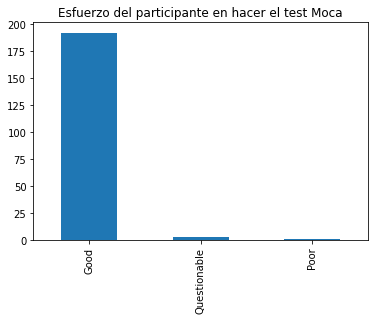

In [ ]:
data['MoCAPtEff'].value_counts().plot.bar(title="Esfuerzo del participante en hacer el test Moca")

Vemos que la mayoría de las personas obtienen una buena puntuación en el test Mocca, obteniendo un desbalanceo en las otras dos clases.
Lo más adecuado será juntar la categoría Questionable con Poor y crear así una variable binaria de bueno y no bueno




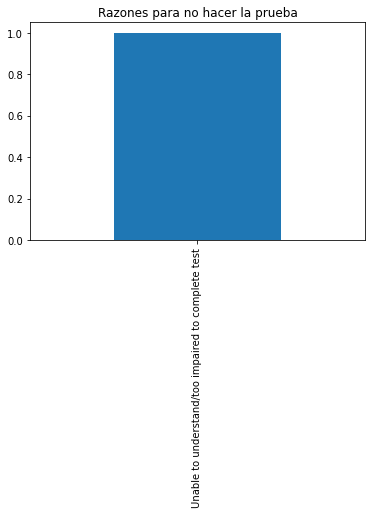

In [ ]:
data['MoCANotDoneReas'].value_counts().plot.bar(title="Razones para no hacer la prueba")

Vemos que solo una única persona no es capa de realizar la prueba por incapacidad de entenderla.

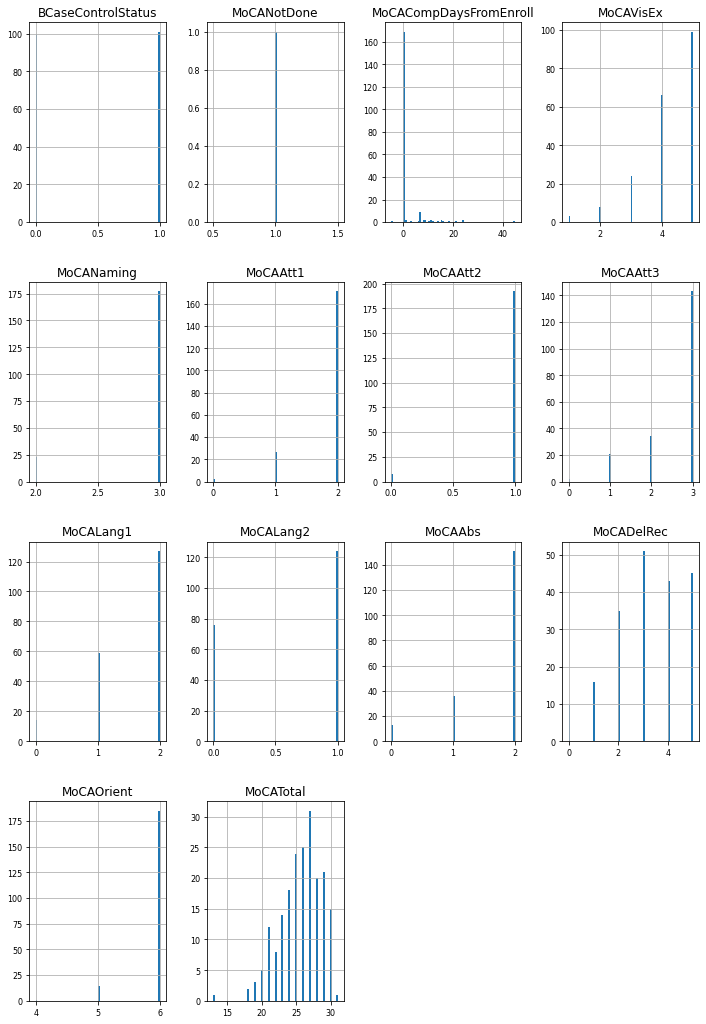

In [ ]:
# Histogram
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

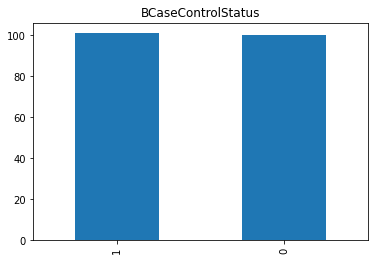

In [ ]:
data['BCaseControlStatus'].value_counts().plot.bar(title="BCaseControlStatus")

Vemos que el número de pacientes control y caso están balanceados

MoCAPtEff


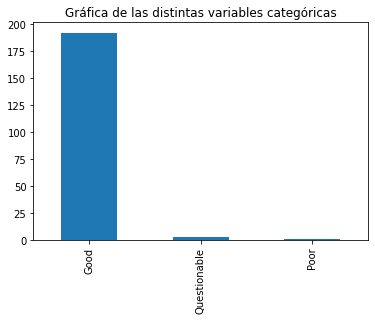

MoCANotDoneReas


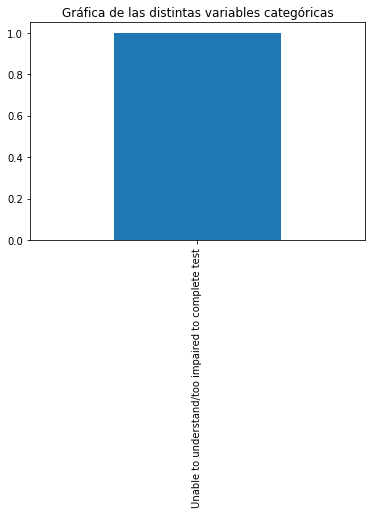

In [ ]:
for i in data:
  if data[i].dtypes=='object':
    data[i].value_counts().plot.bar(title='Gráfica de las distintas variables categóricas')
    print(i)
    plt.show()

La última variable nos dice las razones por las que el participante no hizo el text, por lo que seguramente la eliminemos

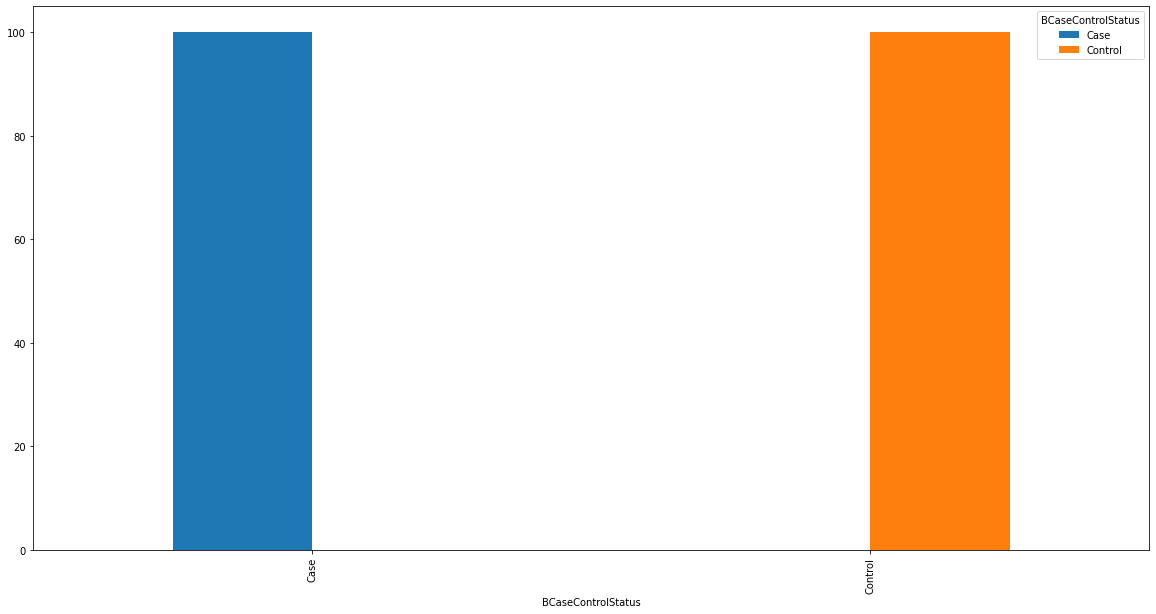

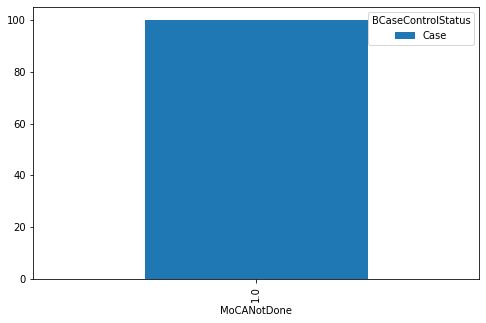

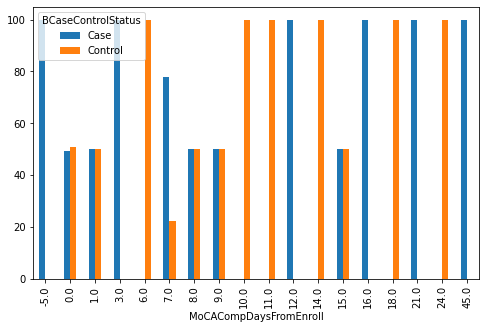

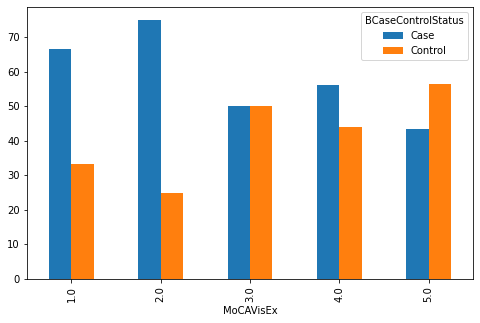

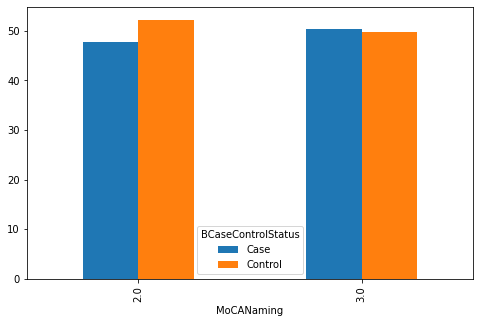

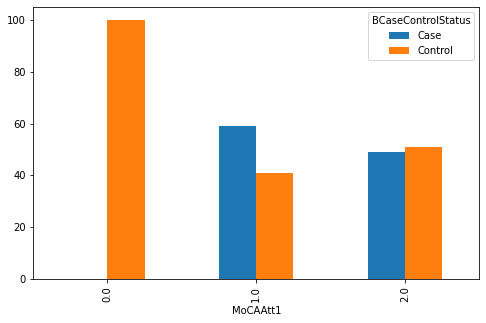

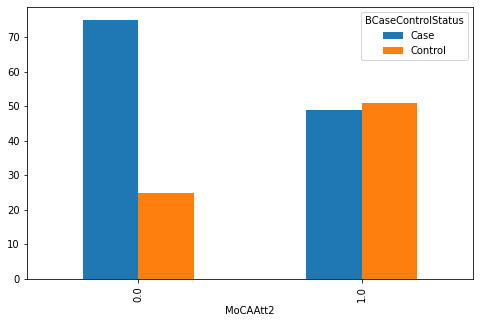

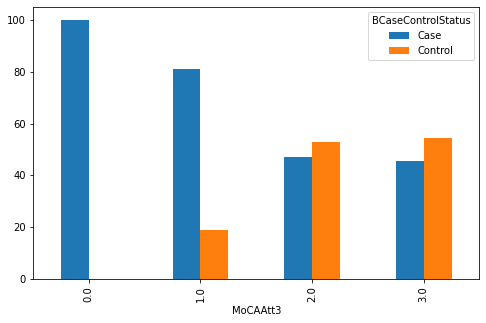

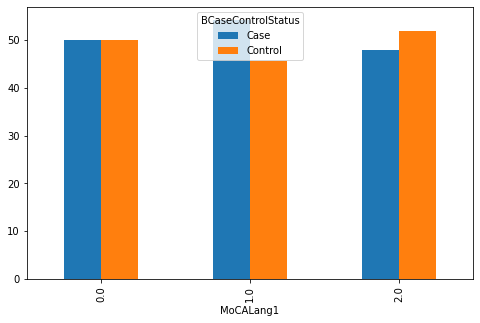

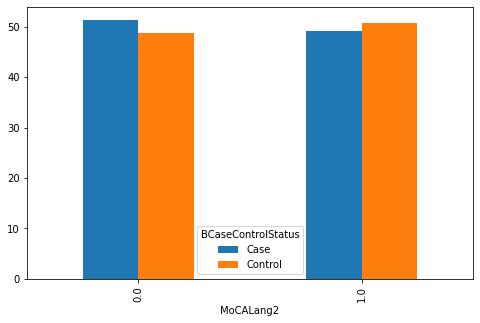

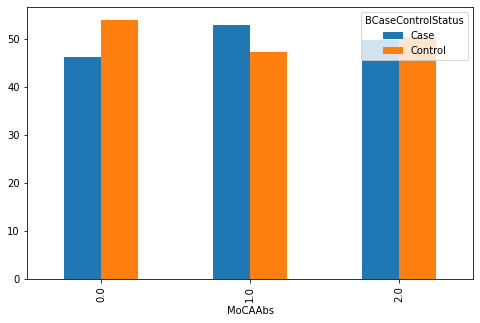

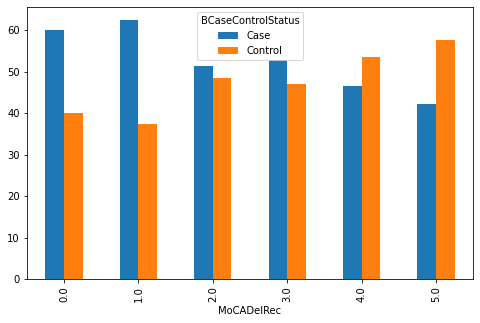

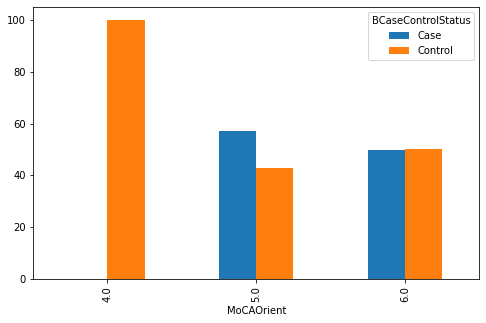

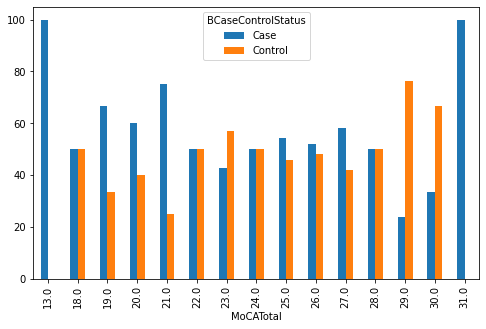

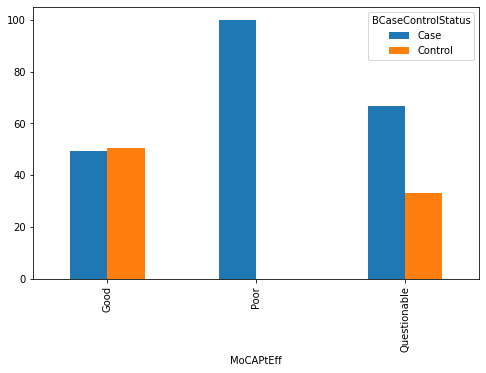

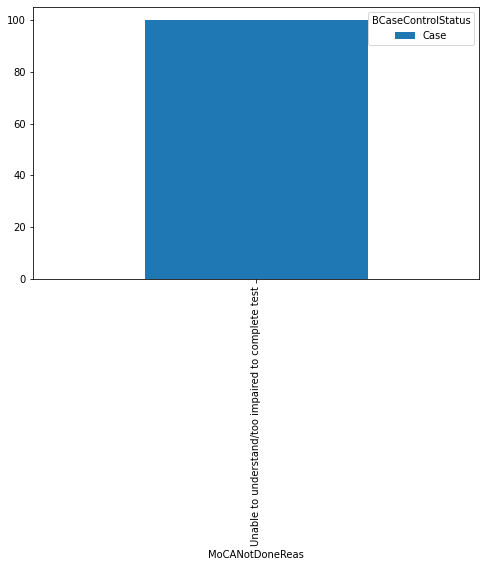

In [ ]:
for i in data:
  # if data[i].dtypes!='object':
  plot=pd.crosstab(index=data[i], columns=data['BCaseControlStatus']).apply(lambda r : r/r.sum()*100, axis=1).plot(kind='bar')
  plt.rcParams["figure.figsize"] = (8, 5)

# ***Preprocesado de datos***

# ***Valores perdidos***

In [ ]:
(data == 0).sum(axis=0)

BCaseControlStatus        100
MoCANotDone                 0
MoCACompDaysFromEnroll    169
MoCAVisEx                   0
MoCANaming                  0
MoCAAtt1                    2
MoCAAtt2                    8
MoCAAtt3                    2
MoCALang1                  14
MoCALang2                  76
MoCAAbs                    13
MoCADelRec                 10
MoCAOrient                  0
MoCATotal                   0
MoCAPtEff                   0
MoCANotDoneReas             0
dtype: int64

Los ceros que aparecen pueden tener sentido, ya que han podido obtener una puntuación de 0 en las distintas pruebas realizadas.

In [ ]:
data.isna().sum()

BCaseControlStatus          0
MoCANotDone               200
MoCACompDaysFromEnroll      1
MoCAVisEx                   1
MoCANaming                  1
MoCAAtt1                    1
MoCAAtt2                    1
MoCAAtt3                    1
MoCALang1                   1
MoCALang2                   1
MoCAAbs                     1
MoCADelRec                  1
MoCAOrient                  1
MoCATotal                   1
MoCAPtEff                   5
MoCANotDoneReas           200
dtype: int64

La variable de MoCANotDone es un "check", por tanto todos los valores nulos es no se han chequeado, y por tanto, corresponden a un 0.


In [ ]:
# data['MoCANotDone']=data['MoCANotDone'].replace(np.nan, 0)

También vamos a agrupar la variable categórica MoCAPtEff en 1 y 0 creando una variable binaria:

In [ ]:
data['MoCAPtEff']=data['MoCAPtEff'].replace(['Good'], 1).replace(['Questionable'], 0).replace(['Poor'],0)

In [ ]:
!pip install missingno




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno

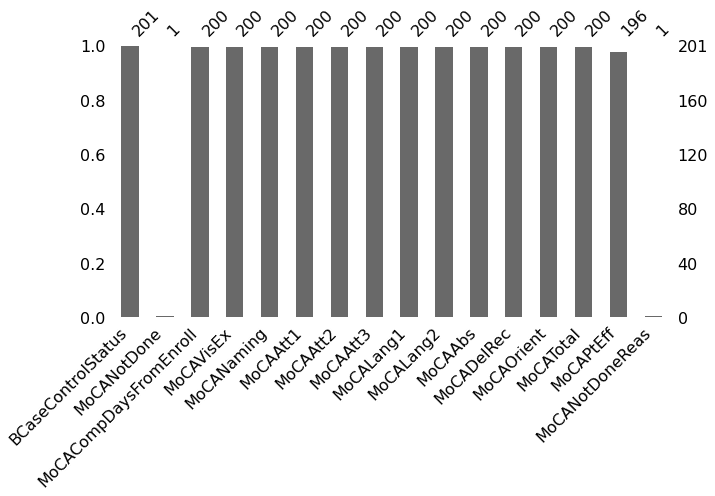

In [ ]:
msno.bar(data, figsize=(10,5))

Vemos que para la variable MoCaNotDoneReas prácticamente todos los pacientes presentan valores nulos, ya que como hemos visto en la gráfica anterior, solo un único paciente no fue capaz de completar el test, por lo que lo más adecuado sería eliminar esa variable de nuestro dataframe.
 

In [ ]:
data.drop(['MoCANotDoneReas'], axis=1, inplace=True)
data.drop(['MoCANotDone'], axis=1, inplace=True)
data.drop(['MoCACompDaysFromEnroll'], axis=1, inplace=True)

    

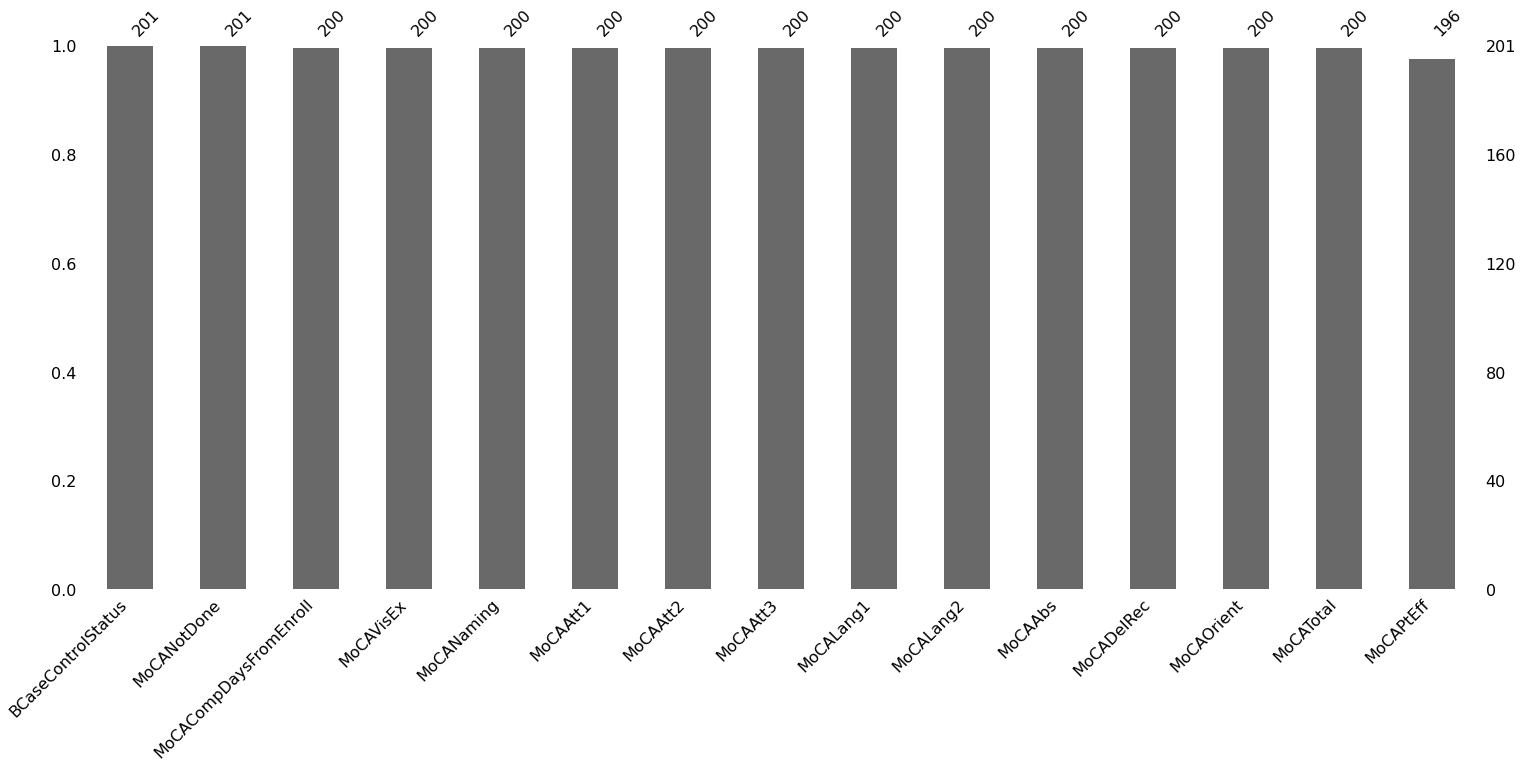

In [ ]:
msno.bar(data)

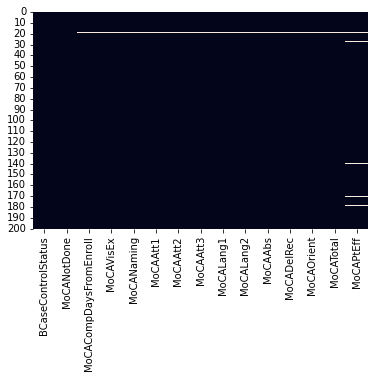

In [ ]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(data.isnull(), cbar=False)

A partir de esta gráfica, podemos ver que hay un pacientes el cuales, en todas sus variables presentan valores NaN, este paciente seguramente sea él que no pudo realizar el examen por no entenderlo, por lo que una posibilidad sería eliminar el registro de ese  paciente, ya que no estaríamos perdiendo información del resto de variables pues todas presentan valores perdidos.
Con el resto de valores NaN, existentes por ejemplo en la última variable, podríamos imputarlos por su media.

In [ ]:
# data = data.dropna(subset=["MoCAVisEx"])

Esa última variable para imputar los valores perdidos por la moda se hará una vez hayamos dividido en entrenamiento y test

# ***Outliers***

Para ver si la base de datos presenta o no outliers, me ayudaré a partir de la visualización de los diagramas de cajas:

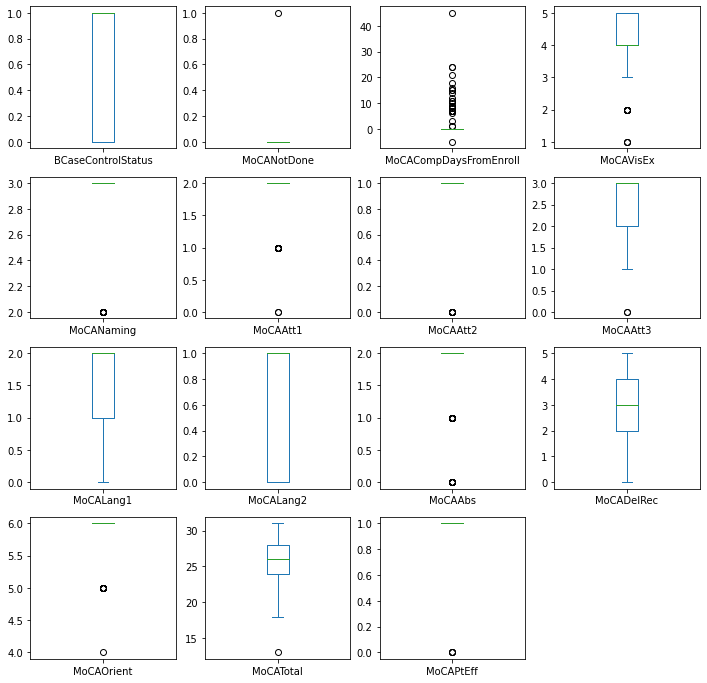

In [ ]:
data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

A la vista de los resultados, podemos concluir que los valores atípicos que aparece podrían ser realmente puntuaciones obtenidas por los pacientes, y sernos de utilidad a la hora del diseño del modelo.

In [ ]:
data.shape

(201, 14)

# ***Matriz de correlación***

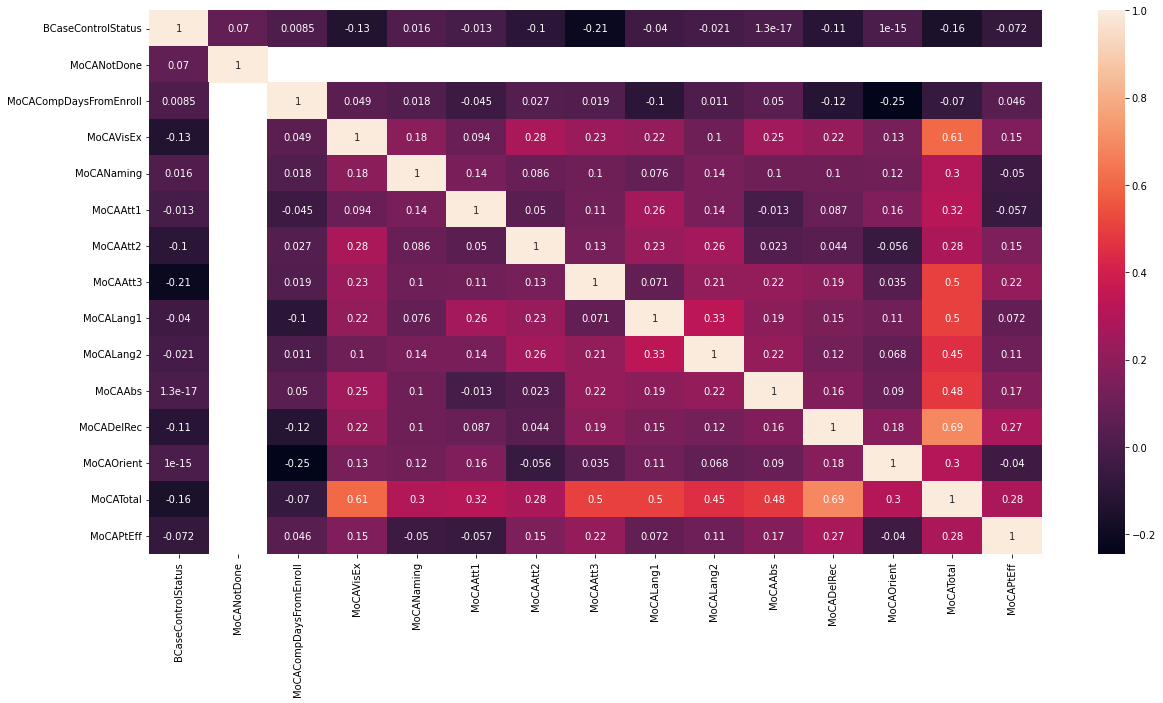

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# ***Validación cruzada***

In [ ]:
from statistics import mode
# data["MoCACompDaysFromEnroll"].replace(np.nan, mode(data["MoCACompDaysFromEnroll"]), inplace=True)
data["MoCAVisEx"].replace(np.nan, mode(data["MoCAVisEx"]), inplace=True)
data["MoCANaming"].replace(np.nan, mode(data["MoCANaming"]), inplace=True)
data["MoCAAtt1"].replace(np.nan, mode(data["MoCAAtt1"]), inplace=True)
data["MoCAAtt2"].replace(np.nan, mode(data["MoCAAtt2"]), inplace=True)
data["MoCAAtt3"].replace(np.nan, mode(data["MoCAAtt3"]), inplace=True)
data["MoCALang1"].replace(np.nan, mode(data["MoCALang1"]), inplace=True)
data["MoCALang2"].replace(np.nan, mode(data["MoCALang2"]), inplace=True)
data["MoCAAbs"].replace(np.nan, mode(data["MoCAAbs"]), inplace=True)
data["MoCADelRec"].replace(np.nan, mode(data["MoCADelRec"]), inplace=True)
data["MoCAOrient"].replace(np.nan, mode(data["MoCAOrient"]), inplace=True)
data["MoCATotal"].replace(np.nan, mode(data["MoCATotal"]), inplace=True)
data["MoCAPtEff"].replace(np.nan, mode(data["MoCAPtEff"]), inplace=True)


In [ ]:
data.isna().sum()

BCaseControlStatus    0
MoCAVisEx             0
MoCANaming            0
MoCAAtt1              0
MoCAAtt2              0
MoCAAtt3              0
MoCALang1             0
MoCALang2             0
MoCAAbs               0
MoCADelRec            0
MoCAOrient            0
MoCATotal             0
MoCAPtEff             0
dtype: int64

In [ ]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 12), (201,))

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

def regresion_logistica(X_train, X_test, Y_train, Y_test,semilla):
  logreg= LogisticRegression(solver='liblinear',random_state=semilla)
  parameters = {"C":[1e-8,1e-7,1e-6,1e-5,1e-4,1,10,20, 30,40,50,100],"penalty":["l1"]}# l1 lasso l2 ridge
  valor_C=np.array([1e-8,1e-4,1,10,20,30,40,50,100])
  log_regression=GridSearchCV(logreg, parameters, scoring='accuracy', cv=5, return_train_score=True)

  log_regression.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
  roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

    # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))

# 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  log_regression.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  regre_clasif = log_regression.best_estimator_
  modelo_regresion = regre_clasif.fit(X_train, Y_train)

  y_output_regresion = modelo_regresion.predict(X_test)
  print(accuracy_score(Y_test, y_output_regresion))
  print(confusion_matrix(Y_test, y_output_regresion))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_regresion).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_regresion)
  Accuracy = accuracy_score(Y_test, y_output_regresion)
  Precision=precision_score(Y_test, y_output_regresion)
  f1=f1_score(Y_test, y_output_regresion)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_regresion)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)




In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_train, X_test, Y_train, Y_test,semilla):

  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,13), 'min_samples_leaf': range(5,50)}
  profundidad_grid = np.array(range(1,13))

  # X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)
  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=semilla), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  # perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  # perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  # plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  # plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  # plt.xlabel('Profundidad',fontsize=14)
  # plt.ylabel('ROC-AUC',fontsize=14)
  # plt.legend()
  # plt.show()

  print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_arbol_clasif.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  Arbol_clasif_all = grid_arbol_clasif.best_estimator_
  modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)

  y_output_arbol = modelo_arbol_clasif.predict(X_test)
  print(accuracy_score(Y_test, y_output_arbol))
  print(confusion_matrix(Y_test, y_output_arbol))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_arbol)
  Accuracy = accuracy_score(Y_test, y_output_arbol)
  Precision=precision_score(Y_test, y_output_arbol)
  f1=f1_score(Y_test, y_output_arbol)
  print("Sensibilidad, Accuracy, Especifididad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [ ]:
def knn (X_train,X_test,Y_train,Y_test):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_knn.fit(X_train, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel('roc_auc',fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_knn.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  kNN_clasif_all = grid_knn.best_estimator_
  modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)

  y_output_knn2 = modelo_knn_clasif2.predict(X_test)
  print(accuracy_score(Y_test, y_output_knn2))
  print(confusion_matrix(Y_test, y_output_knn2))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
  Especificidad = tn / (tn + fp)

  Recall= recall_score(Y_test, y_output_knn2)
  Accuracy = accuracy_score(Y_test, y_output_knn2)
  Precision=precision_score(Y_test, y_output_knn2)
  f1=f1_score(Y_test, y_output_knn2)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],
           'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [ ]:
def svc (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [ ]:
def svc_lineal (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['linear'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [ ]:
from sklearn.neural_network import MLPClassifier

# 1. Extracción de las dos características de interés para realizar el diseño
def MLP(X_train,X_test,Y_train,Y_test,semilla):

  # 4. Configuración del MLP
  param_grid = {'hidden_layer_sizes': range(2,152,10)}
  neuronas_ocultas_grid = np.array(range(2,152,10))

  grid_MLP = GridSearchCV(MLPClassifier(max_iter = 10000, random_state=semilla, activation='tanh'), param_grid = param_grid, scoring = 'accuracy', cv=5, return_train_score=True)
  grid_MLP.fit(X_train, Y_train)


  acc_MLP_train = np.array(grid_MLP.cv_results_['mean_train_score'])
  acc_MLP_val = np.array(grid_MLP.cv_results_['mean_test_score'])
    # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_MLP.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_MLP.best_score_))
        
  # 2. Consulta de los valores de los hiper-parámetros 
  grid_MLP.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  MLP_classif = grid_MLP.best_estimator_
  modelo_MLP = MLP_classif.fit(X_train, Y_train)

  y_output_mlp = modelo_MLP.predict(X_test)
  print(accuracy_score(Y_test, y_output_mlp))
  print(confusion_matrix(Y_test, y_output_mlp))

  Recall= recall_score(Y_test, y_output_mlp)
  Accuracy = accuracy_score(Y_test, y_output_mlp)
  Precision=precision_score(Y_test, y_output_mlp)
  f1=f1_score(Y_test, y_output_mlp)
  print("Sensibilidad, Accuracy, precision, f1-score",Recall, Accuracy,Precision,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_mlp)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Precision, f1, roc_auc)      


In [ ]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []

#LISTAS PARA STANDARD SCALER
recall_reg_std = []
accuracy_reg_std = []
precision_reg_std=[]
f1_reg_std=[]
roc_reg_std= []

recall_arbol_std = []
accuracy_arbol_std = []
precision_arbol_std=[]
f1_arbol_std=[]
roc_arbol_std= []

recall_knn_std = []
accuracy_knn_std = []
precision_knn_std=[]
f1_knn_std=[]
roc_knn_std= []

recall_svc_std = []
accuracy_svc_std = []
precision_svc_std=[]
f1_svc_std=[]
roc_svc_std= []

recall_svc_lin_std = []
accuracy_svc_lin_std = []
precision_svc_lin_std=[]
f1_svc_lin_std=[]
roc_svc_lin_std= []

#LISTAS PARA MIN-MAX

recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

recall_mlp_lin_scaler = []
accuracy_mlp_lin_scaler = []
precision_mlp_lin_scaler=[]
f1_mlp_lin_scaler=[]
roc_mlp_lin_scaler= []

for i in range(0, 5):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y, test_size=0.2, random_state=i)
  print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

  list_x_train.append(X_train)
  list_y_train.append(Y_train)
  list_y_test.append(Y_test)
  list_x_test.append(X_test)

  


(160, 12) (160,) (41, 12) (41,)
(160, 12) (160,) (41, 12) (41,)
(160, 12) (160,) (41, 12) (41,)
(160, 12) (160,) (41, 12) (41,)
(160, 12) (160,) (41, 12) (41,)


In [ ]:
X

MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  MoCAAtt3  MoCALang1  \
0          5.0         3.0       2.0       1.0       3.0        2.0   
1          4.0         2.0       1.0       1.0       3.0        1.0   
2          5.0         3.0       2.0       1.0       3.0        1.0   
3          4.0         3.0       1.0       1.0       2.0        0.0   
4          2.0         2.0       1.0       0.0       0.0        1.0   
..         ...         ...       ...       ...       ...        ...   
196        2.0         2.0       2.0       0.0       3.0        1.0   
197        3.0         2.0       2.0       1.0       2.0        1.0   
198        4.0         3.0       2.0       1.0       3.0        1.0   
199        5.0         3.0       2.0       1.0       3.0        2.0   
200        5.0         3.0       2.0       1.0       2.0        2.0   

     MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  MoCATotal MoCAPtEff  
0          0.0      2.0         2.0         6.0       26.0         G  
1          1.0      2.0         1.0         4.0       21.0         G  
2          1.0      2.0         3.0         6.0       27.0         G  
3          0.0      1.0         2.0         5.0       20.0         G  
4          0.0      0.0         0.0         6.0       13.0         G  
..         ...      ...         ...         ...        ...       ...  
196        0.0      2.0         3.0         6.0       22.0         G  
197        1.0      0.0         4.0         6.0       23.0         G  
198        1.0      2.0         2.0         6.0       25.0         G  
199        1.0      2.0         3.0         6.0       28.0         G  
200        0.0      2.0         4.0         6.0       27.0         G  

[201 rows x 12 columns]

# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
X_train_0.isna().sum()

MoCAVisEx     0
MoCANaming    0
MoCAAtt1      0
MoCAAtt2      0
MoCAAtt3      0
MoCALang1     0
MoCALang2     0
MoCAAbs       0
MoCADelRec    0
MoCAOrient    0
MoCATotal     0
MoCAPtEff     0
dtype: int64

In [ ]:
X_train_0 = X_train_0.to_numpy()
X_test_0= X_test_0.to_numpy()

X_train_numerical0=X_train_0[:,[0,1,2,4,5,7,8,9,10]]
X_train_categorical0=X_train_0[:,[3,6,11]]
X_test_numerical0=X_test_0[:,[0,1,2,4,5,7,8,9,10]]
X_test_categorical0=X_test_0[:,[3,6,11]]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical0)
X_std_train_numerical = std_all.transform(X_train_numerical0) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical0)

In [ ]:
#Concatenamos para standard scaler

X_train_std_all0=np.c_[X_std_train_numerical,X_train_categorical0]
X_test_std_all0=np.c_[X_std_test_numerical,X_test_categorical0]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_std_all0.shape

(160, 12)

In [ ]:
X_train_scaler_all0.shape

(160, 12)

A continuación, aplicacmos los modelos:

In [ ]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.43902439024390244
[[11  9]
 [14  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3333333333333333 0.43902439024390244 0.55 0.37837837837837834


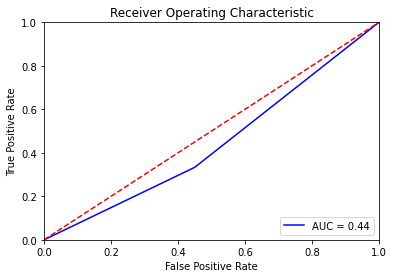

{'max_depth': 1, 'min_samples_leaf': 48}
Mejor ROC-AUC en validación cruzada: 0.594
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 48}
0.43902439024390244
[[10 10]
 [13  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.38095238095238093 0.43902439024390244 0.5 0.41025641025641024


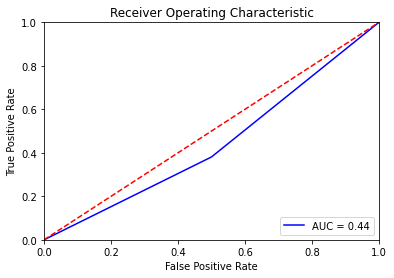

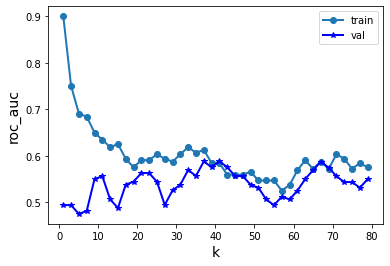

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
Valor correspondiente para el hiperparámetro: {'n_neighbors': 41}
0.4634146341463415
[[14  6]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.4634146341463415 0.7 0.31249999999999994


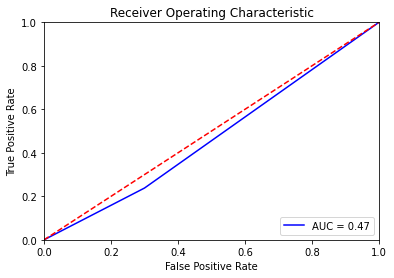

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.4146341463414634
[[12  8]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.4146341463414634 0.6 0.2941176470588235


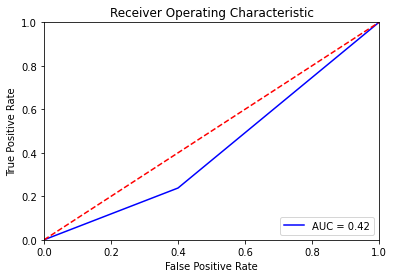

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.3902439024390244
[[ 9 11]
 [14  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3333333333333333 0.3902439024390244 0.45 0.358974358974359


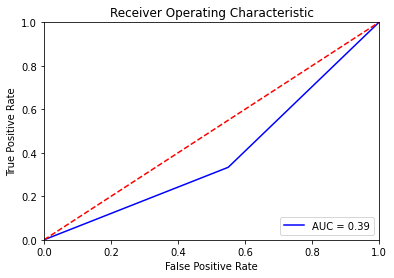

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [ ]:
X_train_1.isna().sum()

MoCAVisEx     0
MoCANaming    0
MoCAAtt1      0
MoCAAtt2      0
MoCAAtt3      0
MoCALang1     0
MoCALang2     0
MoCAAbs       0
MoCADelRec    0
MoCAOrient    0
MoCATotal     0
MoCAPtEff     0
dtype: int64

In [ ]:
X_train_1 = X_train_1.to_numpy()
X_test_1= X_test_1.to_numpy()

X_train_numerical1=X_train_1[:,[0,1,2,4,5,7,8,9,10]]
X_train_categorical1=X_train_1[:,[3,6,11]]
X_test_numerical1=X_test_1[:,[0,1,2,4,5,7,8,9,10]]
X_test_categorical1=X_test_1[:,[3,6,11]]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical1)
X_std_train_numerical = std_all.transform(X_train_numerical1) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical1)

In [ ]:
X_train_std_all1=np.c_[X_std_train_numerical,X_train_categorical1]
X_test_std_all1=np.c_[X_std_test_numerical,X_test_categorical1]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


In [ ]:
X_train_std_all1.shape

(160, 12)

A continuación, aplicacmos los modelos:

In [ ]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Valor correspondiente para el hiperparámetro: {'C': 40, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.6097560975609756
[[14  6]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.6097560975609756 0.7 0.5789473684210527


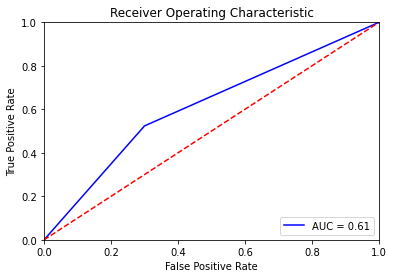

{'max_depth': 1, 'min_samples_leaf': 49}
Mejor ROC-AUC en validación cruzada: 0.563
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 49}
0.5609756097560976
[[10 10]
 [ 8 13]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6190476190476191 0.5609756097560976 0.5 0.5909090909090909


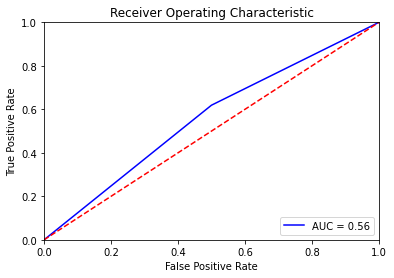

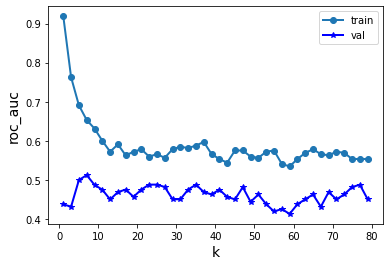

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}
0.43902439024390244
[[ 9 11]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.43902439024390244 0.45 0.4390243902439024


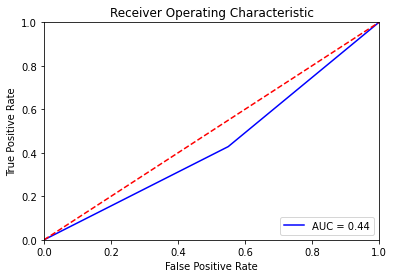

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.494
0.5121951219512195
[[17  3]
 [17  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.19047619047619047 0.5121951219512195 0.85 0.2857142857142857


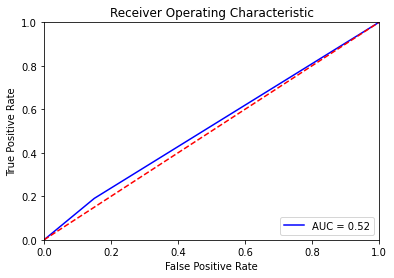

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.5121951219512195
[[17  3]
 [17  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.19047619047619047 0.5121951219512195 0.85 0.2857142857142857


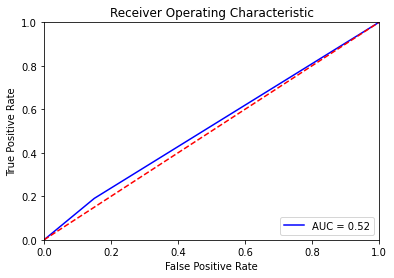

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
X_train_2.isna().sum()

MoCAVisEx     0
MoCANaming    0
MoCAAtt1      0
MoCAAtt2      0
MoCAAtt3      0
MoCALang1     0
MoCALang2     0
MoCAAbs       0
MoCADelRec    0
MoCAOrient    0
MoCATotal     0
MoCAPtEff     0
dtype: int64

In [ ]:
X_train_2 = X_train_2.to_numpy()
X_test_2= X_test_2.to_numpy()

X_train_numerical2=X_train_2[:,[0,1,2,4,5,7,8,9,10]]
X_train_categorical2=X_train_2[:,[3,6,11]]
X_test_numerical2=X_test_2[:,[0,1,2,4,5,7,8,9,10]]
X_test_categorical2=X_test_2[:,[3,6,11]]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical2)
X_std_train_numerical = std_all.transform(X_train_numerical2) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical2)

In [ ]:
X_train_std_all2=np.c_[X_std_train_numerical,X_train_categorical2]
X_test_std_all2=np.c_[X_std_test_numerical,X_test_categorical2]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


A continuación, aplicacmos los modelos:

In [ ]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.4878048780487805
[[14  6]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.4878048780487805 0.7 0.36363636363636365


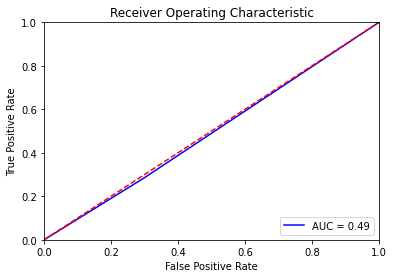

{'max_depth': 1, 'min_samples_leaf': 47}
Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 47}
0.3902439024390244
[[10 10]
 [15  6]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.2857142857142857 0.3902439024390244 0.5 0.3243243243243243


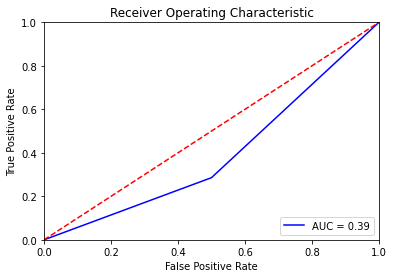

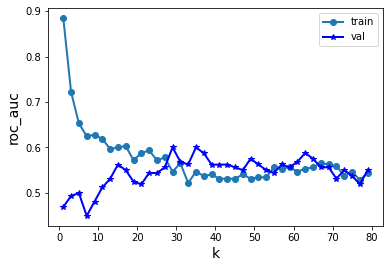

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
Valor correspondiente para el hiperparámetro: {'n_neighbors': 35}
0.3902439024390244
[[12  8]
 [17  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.19047619047619047 0.3902439024390244 0.6 0.24242424242424246


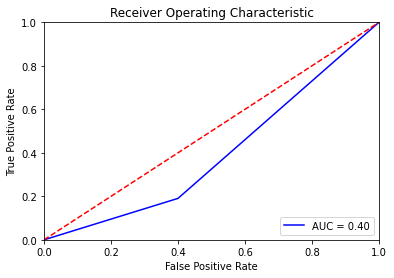

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4634146341463415
[[17  3]
 [19  2]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.09523809523809523 0.4634146341463415 0.85 0.15384615384615385


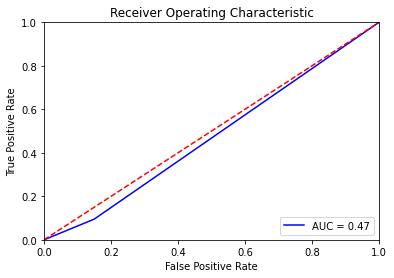

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.4634146341463415
[[17  3]
 [19  2]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.09523809523809523 0.4634146341463415 0.85 0.15384615384615385


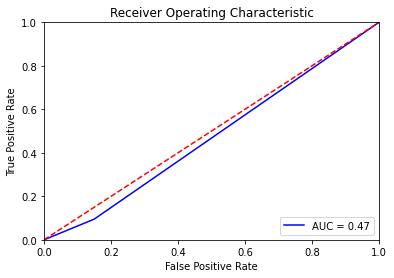

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
X_train_3.isna().sum()

MoCAVisEx     0
MoCANaming    0
MoCAAtt1      0
MoCAAtt2      0
MoCAAtt3      0
MoCALang1     0
MoCALang2     0
MoCAAbs       0
MoCADelRec    0
MoCAOrient    0
MoCATotal     0
MoCAPtEff     0
dtype: int64

In [ ]:
X_train_3 = X_train_3.to_numpy()
X_test_3= X_test_3.to_numpy()


X_train_numerical3=X_train_3[:,[0,1,2,4,5,7,8,9,10]]
X_train_categorical3=X_train_3[:,[3,6,11]]
X_test_numerical3=X_test_3[:,[0,1,2,4,5,7,8,9,10]]
X_test_categorical3=X_test_3[:,[3,6,11]]

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical3)
X_std_train_numerical = std_all.transform(X_train_numerical3) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical3)

In [ ]:
X_train_std_all3=np.c_[X_std_train_numerical,X_train_categorical3]
X_test_std_all3=np.c_[X_std_test_numerical,X_test_categorical3]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


A continuación, aplicacmos los modelos:

In [ ]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.6341463414634146
[[12  8]
 [ 7 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6666666666666666 0.6341463414634146 0.6 0.6511627906976744


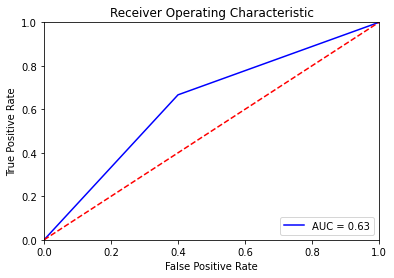

{'max_depth': 1, 'min_samples_leaf': 47}
Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 47}
0.6097560975609756
[[ 7 13]
 [ 3 18]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.8571428571428571 0.6097560975609756 0.35 0.6923076923076923


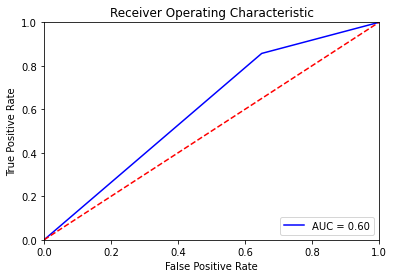

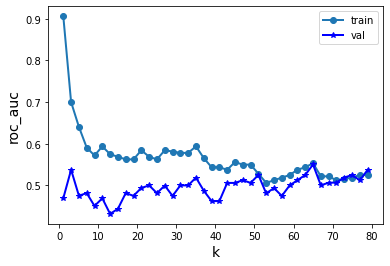

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
Valor correspondiente para el hiperparámetro: {'n_neighbors': 65}
0.5365853658536586
[[16  4]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.5365853658536586 0.8 0.3870967741935483


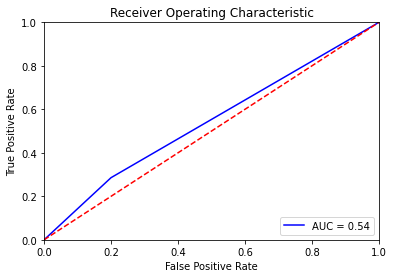

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.4878048780487805
[[16  4]
 [17  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.19047619047619047 0.4878048780487805 0.8 0.27586206896551724


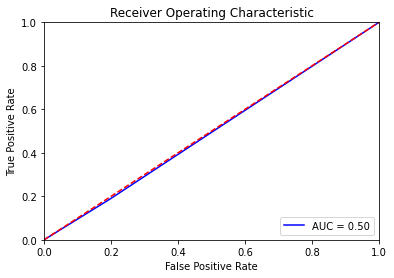

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.4878048780487805
[[16  4]
 [17  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.19047619047619047 0.4878048780487805 0.8 0.27586206896551724


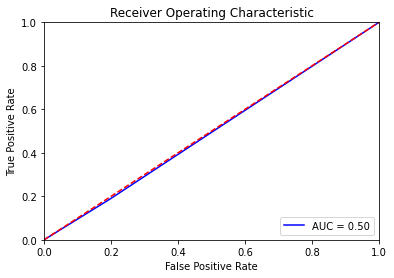

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
X_train_4.isna().sum()

MoCAVisEx     0
MoCANaming    0
MoCAAtt1      0
MoCAAtt2      0
MoCAAtt3      0
MoCALang1     0
MoCALang2     0
MoCAAbs       0
MoCADelRec    0
MoCAOrient    0
MoCATotal     0
MoCAPtEff     0
dtype: int64

In [ ]:
X_train_4 = X_train_4.to_numpy()
X_test_4= X_test_4.to_numpy()



X_train_numerical4=X_train_4[:,[0,1,2,4,5,7,8,9,10]]
X_train_categorical4=X_train_4[:,[3,6,11]]
X_test_numerical4=X_test_4[:,[0,1,2,4,5,7,8,9,10]]
X_test_categorical4=X_test_4[:,[3,6,11]]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical4)
X_std_train_numerical = std_all.transform(X_train_numerical4) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical4)

In [ ]:
X_train_std_all4=np.c_[X_std_train_numerical,X_train_categorical4]
X_test_std_all4=np.c_[X_std_test_numerical,X_test_categorical4]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


A continuación, aplicacmos los modelos:

In [ ]:
# #CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Valor correspondiente para el hiperparámetro: {'C': 100, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.5365853658536586
[[11  9]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.5365853658536586 0.55 0.5365853658536585


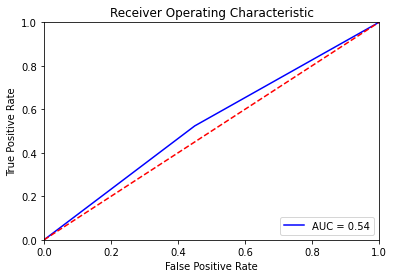

{'max_depth': 4, 'min_samples_leaf': 10}
Mejor ROC-AUC en validación cruzada: 0.613
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 10}
0.4634146341463415
[[ 5 15]
 [ 7 14]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6666666666666666 0.4634146341463415 0.25 0.56


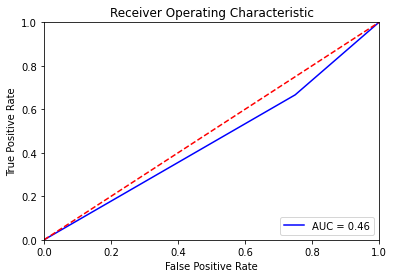

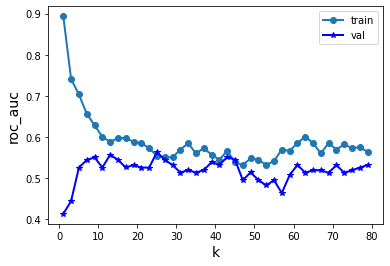

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.563
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}
0.36585365853658536
[[10 10]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.36585365853658536 0.5 0.2777777777777778


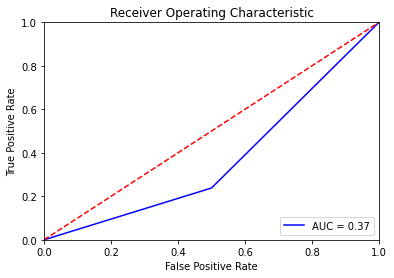

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.4878048780487805
[[14  6]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.4878048780487805 0.7 0.36363636363636365


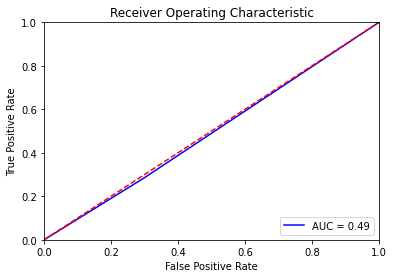

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.4634146341463415
[[13  7]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.4634146341463415 0.65 0.35294117647058826


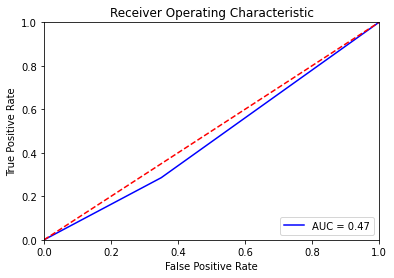

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.541463  0.073008
1          DT  0.492683  0.080746
2         KNN  0.439024  0.059744
3  Radial SVM  0.458537  0.060535
4  Linear SVM  0.463415  0.040813

In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

model      mean       std
0       LASSO  0.543333  0.071732
1          DT  0.490952  0.078255
2         KNN  0.443095  0.060686
3  Radial SVM  0.463571  0.060109
4  Linear SVM  0.469524  0.043145

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("Moca_acc"))
plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
X

MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  MoCAAtt3  MoCALang1  \
0          5.0         3.0       2.0       1.0       3.0        2.0   
1          4.0         2.0       1.0       1.0       3.0        1.0   
2          5.0         3.0       2.0       1.0       3.0        1.0   
3          4.0         3.0       1.0       1.0       2.0        0.0   
4          2.0         2.0       1.0       0.0       0.0        1.0   
..         ...         ...       ...       ...       ...        ...   
196        2.0         2.0       2.0       0.0       3.0        1.0   
197        3.0         2.0       2.0       1.0       2.0        1.0   
198        4.0         3.0       2.0       1.0       3.0        1.0   
199        5.0         3.0       2.0       1.0       3.0        2.0   
200        5.0         3.0       2.0       1.0       2.0        2.0   

     MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  MoCATotal  MoCAPtEff  
0          0.0      2.0         2.0         6.0       26.0          1  
1          1.0      2.0         1.0         4.0       21.0          1  
2          1.0      2.0         3.0         6.0       27.0          1  
3          0.0      1.0         2.0         5.0       20.0          1  
4          0.0      0.0         0.0         6.0       13.0          1  
..         ...      ...         ...         ...        ...        ...  
196        0.0      2.0         3.0         6.0       22.0          1  
197        1.0      0.0         4.0         6.0       23.0          1  
198        1.0      2.0         2.0         6.0       25.0          1  
199        1.0      2.0         3.0         6.0       28.0          1  
200        0.0      2.0         4.0         6.0       27.0          1  

[201 rows x 12 columns]

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

model      mean       std
0       LASSO  0.466667  0.139321
1          DT  0.561905  0.205149
2         KNN  0.276190  0.081927
3  Radial SVM  0.257143  0.098054
4  Linear SVM  0.219048  0.083027

In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


model  mean       std
0       LASSO  0.62  0.067823
1          DT  0.42  0.102956
2         KNN  0.61  0.128062
3  Radial SVM  0.67  0.074833
4  Linear SVM  0.72  0.153623

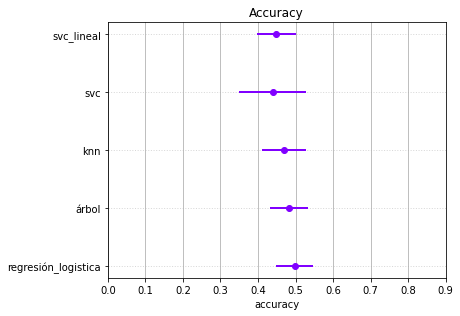

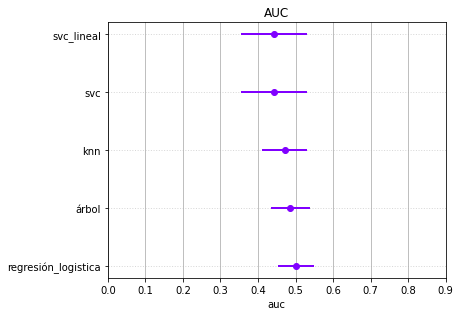

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_std, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_std, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)


# ***VALIDACIÓN CRUZADA Y FEATURE SELECTION***

# ***PRIMERA PARTICIÓN***

NO HACE FALTA EJECUTAR LAS PARTICIONES DE NUEVO, YA ESTÁN EJECUTADAS ARRIBA

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:

X_train_0

MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  MoCAAtt3  MoCALang1  \
26         4.0         3.0       2.0       1.0       3.0        2.0   
1          4.0         2.0       1.0       1.0       3.0        1.0   
162        5.0         3.0       2.0       1.0       3.0        2.0   
25         3.0         3.0       2.0       1.0       3.0        2.0   
94         3.0         3.0       2.0       1.0       3.0        2.0   
..         ...         ...       ...       ...       ...        ...   
53         5.0         3.0       2.0       1.0       3.0        2.0   
115        5.0         3.0       2.0       1.0       3.0        2.0   
178        4.0         3.0       1.0       1.0       3.0        1.0   
99         4.0         3.0       2.0       1.0       3.0        1.0   
119        3.0         3.0       2.0       1.0       3.0        2.0   

     MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  MoCATotal  MoCAPtEff  
26         0.0      2.0         3.0         6.0       26.0        1.0  
1          1.0      2.0         1.0         4.0       21.0        1.0  
162        1.0      2.0         5.0         6.0       30.0        1.0  
25         1.0      1.0         1.0         6.0       23.0        1.0  
94         1.0      2.0         3.0         5.0       25.0        1.0  
..         ...      ...         ...         ...        ...        ...  
53         1.0      2.0         4.0         6.0       29.0        1.0  
115        1.0      1.0         3.0         6.0       27.0        1.0  
178        1.0      2.0         5.0         6.0       27.0        1.0  
99         0.0      2.0         2.0         6.0       25.0        1.0  
119        1.0      2.0         5.0         6.0       28.0        1.0  

[160 rows x 12 columns]

In [ ]:
X_train_0 = X_train_0.to_numpy()
X_test_0= X_test_0.to_numpy()

X_train_numerical0=X_train_0[:,[0,1,2,3,5,6,8,9,10,11]]
X_train_categorical0=X_train_0[:,[4,7]]
X_test_numerical0=X_test_0[:,[0,1,2,3,5,6,8,9,10,11]]
X_test_categorical0=X_test_0[:,[4,7]]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_scaler_all0.shape

(160, 12)

A continuación, hacemos selección de características:

# ***Métodos *embedded****

Ranking de Características:
1. Característica 9 (0.218943)
2. Característica 7 (0.135543)
3. Característica 1 (0.106985)
4. Característica 4 (0.104403)
5. Característica 0 (0.096657)
6. Característica 5 (0.074469)
7. Característica 11 (0.061910)
8. Característica 6 (0.061831)
9. Característica 3 (0.052876)
10. Característica 2 (0.037181)
11. Característica 8 (0.030283)
12. Característica 10 (0.011884)
13. Característica 12 (0.007035)


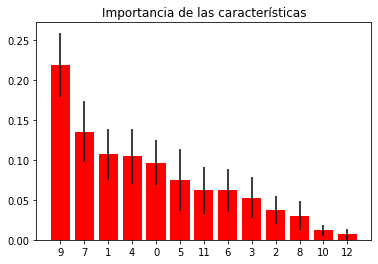

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all0, Y_train_0)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all0.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all0.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all0.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all0.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
* MoCALang2	
* MoCADelRec

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from functools import partial
bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=0), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all0, Y_train_0)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
lista_chi=[ [] for i in range(X.shape[1])]


In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

In [ ]:
lista_chi

[[0.008258112189141631],
 [0.045302708218112775],
 [0.0],
 [0.0378438833420085],
 [0.04534449802552731],
 [0.03486687668853117],
 [0.04709221211699166],
 [0.0],
 [0.01446910734508644],
 [0.0],
 [0.0],
 [0.0]]

# ***Boostrap***

In [ ]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv('df_var_importance_boostrap_{}.csv'.format(generic_name))


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [ ]:
data2=data.rename(columns={"BCaseControlStatus":"label"})

In [ ]:
data2

label  MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  \
0        1                     7.0        5.0         3.0       2.0       1.0   
1        0                    18.0        4.0         2.0       1.0       1.0   
2        1                     7.0        5.0         3.0       2.0       1.0   
3        0                    24.0        4.0         3.0       1.0       1.0   
4        1                     0.0        2.0         2.0       1.0       0.0   
..     ...                     ...        ...         ...       ...       ...   
196      1                     0.0        2.0         2.0       2.0       0.0   
197      0                     0.0        3.0         2.0       2.0       1.0   
198      0                     0.0        4.0         3.0       2.0       1.0   
199      0                     0.0        5.0         3.0       2.0       1.0   
200      0                     0.0        5.0         3.0       2.0       1.0   

     MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  \
0         3.0        2.0        0.0      2.0         2.0         6.0   
1         3.0        1.0        1.0      2.0         1.0         4.0   
2         3.0        1.0        1.0      2.0         3.0         6.0   
3         2.0        0.0        0.0      1.0         2.0         5.0   
4         0.0        1.0        0.0      0.0         0.0         6.0   
..        ...        ...        ...      ...         ...         ...   
196       3.0        1.0        0.0      2.0         3.0         6.0   
197       2.0        1.0        1.0      0.0         4.0         6.0   
198       3.0        1.0        1.0      2.0         2.0         6.0   
199       3.0        2.0        1.0      2.0         3.0         6.0   
200       2.0        2.0        0.0      2.0         4.0         6.0   

     MoCATotal  MoCAPtEff  
0         26.0        1.0  
1         21.0        1.0  
2         27.0        1.0  
3         20.0        1.0  
4         13.0        1.0  
..         ...        ...  
196       22.0        1.0  
197       23.0        1.0  
198       25.0        1.0  
199       28.0        1.0  
200       27.0        1.0  

[201 rows x 14 columns]

In [ ]:
X

MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  \
0                       7.0        5.0         3.0       2.0       1.0   
1                      18.0        4.0         2.0       1.0       1.0   
2                       7.0        5.0         3.0       2.0       1.0   
3                      24.0        4.0         3.0       1.0       1.0   
4                       0.0        2.0         2.0       1.0       0.0   
..                      ...        ...         ...       ...       ...   
196                     0.0        2.0         2.0       2.0       0.0   
197                     0.0        3.0         2.0       2.0       1.0   
198                     0.0        4.0         3.0       2.0       1.0   
199                     0.0        5.0         3.0       2.0       1.0   
200                     0.0        5.0         3.0       2.0       1.0   

     MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  \
0         3.0        2.0        0.0      2.0         2.0         6.0   
1         3.0        1.0        1.0      2.0         1.0         4.0   
2         3.0        1.0        1.0      2.0         3.0         6.0   
3         2.0        0.0        0.0      1.0         2.0         5.0   
4         0.0        1.0        0.0      0.0         0.0         6.0   
..        ...        ...        ...      ...         ...         ...   
196       3.0        1.0        0.0      2.0         3.0         6.0   
197       2.0        1.0        1.0      0.0         4.0         6.0   
198       3.0        1.0        1.0      2.0         2.0         6.0   
199       3.0        2.0        1.0      2.0         3.0         6.0   
200       2.0        2.0        0.0      2.0         4.0         6.0   

     MoCATotal  MoCAPtEff  
0         26.0        1.0  
1         21.0        1.0  
2         27.0        1.0  
3         20.0        1.0  
4         13.0        1.0  
..         ...        ...  
196       22.0        1.0  
197       23.0        1.0  
198       25.0        1.0  
199       28.0        1.0  
200       27.0        1.0  

[201 rows x 13 columns]

In [ ]:
compute_boostrap(data2,X.columns, 'label', 'importance_bootstrap', flag_save_importance=True)




Se han truncado las últimas 5000 líneas del flujo de salida.
189        5.0      0
119        3.0      1
24         5.0      1

[160 rows x 2 columns]
     MoCAVisEx  label
96         4.0      0
63         3.0      1
169        5.0      0
197        3.0      0
68         5.0      0
..         ...    ...
111        5.0      1
95         5.0      0
21         5.0      0
31         5.0      1
94         3.0      1

[160 rows x 2 columns]
     MoCAVisEx  label
68         5.0      0
121        3.0      0
90         5.0      0
7          4.0      1
120        5.0      1
..         ...    ...
141        4.0      1
38         2.0      1
136        5.0      0
109        4.0      0
117        4.0      1

[160 rows x 2 columns]
     MoCAVisEx  label
104        5.0      0
126        4.0      0
96         4.0      0
101        4.0      1
130        4.0      1
..         ...    ...
35         5.0      1
52         5.0      1
39         5.0      0
167        4.0      0
112        4.0      1

[160 row

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('MoCACompDaysFromEnroll', 0.08402158913402726)
('MoCAVisEx', 0.10923432321209516)
('MoCANaming', 0.030974191073403715)
('MoCAAtt1', 0.03977985368716243)
('MoCAAtt2', 0.10888553291912055)
('MoCAAtt3', 0.07749745151487905)
('MoCALang1', 0.06612343090889235)
('MoCALang2', 0.14654815502223617)
('MoCAAbs', 0.02453170950126445)
('MoCADelRec', 0.24251564217474647)
('MoCAOrient', 0.010624886239401759)
('MoCATotal', 0.053808809748395144)
('MoCAPtEff', 0.005454424864375625)
Ranking de Características:
1. Característica 9 (0.242516)
2. Característica 7 (0.146548)
3. Característica 1 (0.109234)
4. Característica 4 (0.108886)
5. Característica 0 (0.084022)
6. Característica 5 (0.077497)
7. Característica 6 (0.066123)
8. Característica 11 (0.053809)
9. Característica 3 (0.039780)
10. Característica 2 (0.030974)
11. Característica 8 (0.024532)
12. Característica 10 (0.010625)
13. Característica 12 (0.005454)


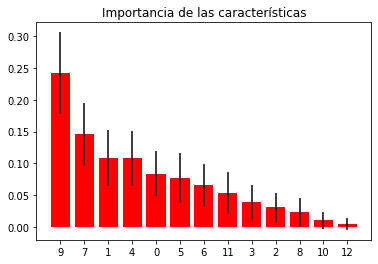

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all0, Y_train_0)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all0.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all0.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all0.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all0.shape[1]])
plt.show()


# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]


In [ ]:


X_train_1 = X_train_1.to_numpy()
X_test_1= X_test_1.to_numpy()

X_train_numerical1=X_train_1[:,[0,1,2,3,5,6,8,9,10,11]]
X_train_categorical1=X_train_1[:,[4,7,12]]
X_test_numerical1=X_test_1[:,[0,1,2,3,5,6,8,9,10,11]]
X_test_categorical1=X_test_1[:,[4,7,12]]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 9 (0.199512)
2. Característica 7 (0.125961)
3. Característica 1 (0.110069)
4. Característica 4 (0.108272)
5. Característica 0 (0.091547)
6. Característica 5 (0.080397)
7. Característica 11 (0.068327)
8. Característica 6 (0.067880)
9. Característica 3 (0.061462)
10. Característica 2 (0.031655)
11. Característica 8 (0.028647)
12. Característica 10 (0.020068)
13. Característica 12 (0.006202)


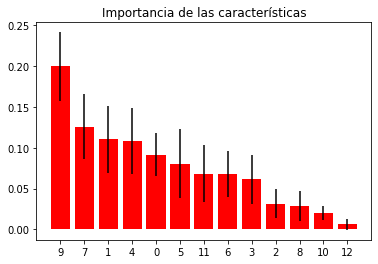

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all1, Y_train_1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all1.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all1.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all1.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=1), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all1, Y_train_1)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('MoCACompDaysFromEnroll', 0.08662833864119333)
('MoCAVisEx', 0.10690356488220382)
('MoCANaming', 0.029633353286183606)
('MoCAAtt1', 0.0507191192494216)
('MoCAAtt2', 0.11299924751143761)
('MoCAAtt3', 0.07311197683383379)
('MoCALang1', 0.06759502800985602)
('MoCALang2', 0.1438252440429194)
('MoCAAbs', 0.02231792502556693)
('MoCADelRec', 0.22698523760904457)
('MoCAOrient', 0.017534503630742444)
('MoCATotal', 0.05586063298625814)
('MoCAPtEff', 0.0058858282913385965)
Ranking de Características:
1. Característica 9 (0.226985)
2. Característica 7 (0.143825)
3. Característica 4 (0.112999)
4. Característica 1 (0.106904)
5. Característica 0 (0.086628)
6. Característica 5 (0.073112)
7. Característica 6 (0.067595)
8. Característica 11 (0.055861)
9. Característica 3 (0.050719)
10. Característica 2 (0.029633)
11. Característica 8 (0.022318)
12. Característica 10 (0.017535)
13. Característica 12 (0.005886)


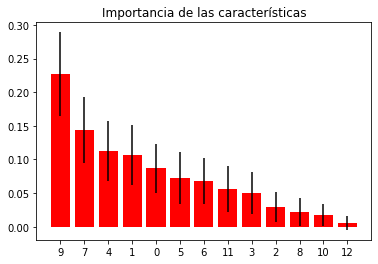

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all1, Y_train_1)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all1.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all1.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all1.shape[1]])
plt.show()


# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:


X_train_2 = X_train_2.to_numpy()
X_test_2= X_test_2.to_numpy()

X_train_numerical2=X_train_2[:,[0,1,2,3,5,6,8,9,10,11]]
X_train_categorical2=X_train_2[:,[4,7,12]]
X_test_numerical2=X_test_2[:,[0,1,2,3,5,6,8,9,10,11]]
X_test_categorical2=X_test_2[:,[4,7,12]]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 9 (0.202265)
2. Característica 7 (0.135816)
3. Característica 1 (0.113144)
4. Característica 4 (0.101492)
5. Característica 0 (0.093633)
6. Característica 5 (0.084593)
7. Característica 6 (0.068390)
8. Característica 11 (0.054240)
9. Característica 3 (0.045828)
10. Característica 2 (0.040923)
11. Característica 8 (0.035057)
12. Característica 10 (0.017359)
13. Característica 12 (0.007260)


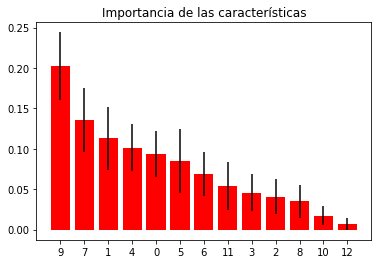

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all2, Y_train_2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all2.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all2.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all2.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=2), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all2, Y_train_2)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('MoCACompDaysFromEnroll', 0.08640290297370404)
('MoCAVisEx', 0.10960839903309018)
('MoCANaming', 0.03731005448474312)
('MoCAAtt1', 0.0457890564964727)
('MoCAAtt2', 0.10351664444837869)
('MoCAAtt3', 0.08162739213377486)
('MoCALang1', 0.064501754082814)
('MoCALang2', 0.14289259388313427)
('MoCAAbs', 0.02900566488639836)
('MoCADelRec', 0.22691752305685237)
('MoCAOrient', 0.01582318147459852)
('MoCATotal', 0.05087111979837436)
('MoCAPtEff', 0.005733713247664597)
Ranking de Características:
1. Característica 9 (0.226918)
2. Característica 7 (0.142893)
3. Característica 1 (0.109608)
4. Característica 4 (0.103517)
5. Característica 0 (0.086403)
6. Característica 5 (0.081627)
7. Característica 6 (0.064502)
8. Característica 11 (0.050871)
9. Característica 3 (0.045789)
10. Característica 2 (0.037310)
11. Característica 8 (0.029006)
12. Característica 10 (0.015823)
13. Característica 12 (0.005734)


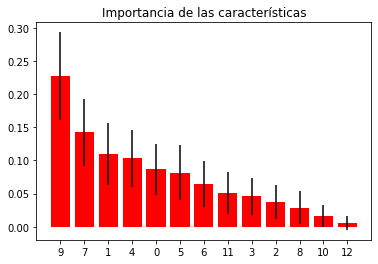

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all2, Y_train_2)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all2.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all2.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all2.shape[1]])
plt.show()


# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:

X_train_3 = X_train_3.to_numpy()
X_test_3= X_test_3.to_numpy()

X_train_numerical3=X_train_3[:,[0,1,2,3,5,6,8,9,10,11]]
X_train_categorical3=X_train_3[:,[4,7,12]]
X_test_numerical3=X_test_3[:,[0,1,2,3,5,6,8,9,10,11]]
X_test_categorical3=X_test_3[:,[4,7,12]]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 9 (0.205955)
2. Característica 7 (0.152498)
3. Característica 0 (0.107625)
4. Característica 1 (0.097047)
5. Característica 4 (0.090106)
6. Característica 5 (0.080265)
7. Característica 6 (0.068357)
8. Característica 3 (0.060998)
9. Característica 11 (0.058880)
10. Característica 2 (0.033348)
11. Característica 8 (0.020668)
12. Característica 10 (0.015991)
13. Característica 12 (0.008264)


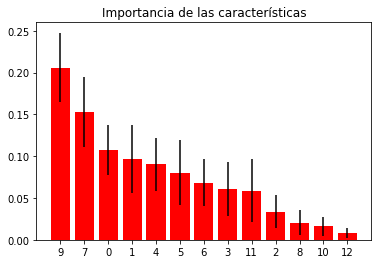

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all3, Y_train_3)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all3.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all3.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all3.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all3.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=3), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all3, Y_train_3)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('MoCACompDaysFromEnroll', 0.09383411945133426)
('MoCAVisEx', 0.10007829663512757)
('MoCANaming', 0.033847987172372376)
('MoCAAtt1', 0.05626925964267433)
('MoCAAtt2', 0.09356973403722203)
('MoCAAtt3', 0.07918703501028343)
('MoCALang1', 0.06414946420260172)
('MoCALang2', 0.15174459835326143)
('MoCAAbs', 0.018646326731848427)
('MoCADelRec', 0.2345837895927166)
('MoCAOrient', 0.016086205068230254)
('MoCATotal', 0.054141261075365266)
('MoCAPtEff', 0.0038619230269622998)
Ranking de Características:
1. Característica 9 (0.234584)
2. Característica 7 (0.151745)
3. Característica 1 (0.100078)
4. Característica 0 (0.093834)
5. Característica 4 (0.093570)
6. Característica 5 (0.079187)
7. Característica 6 (0.064149)
8. Característica 3 (0.056269)
9. Característica 11 (0.054141)
10. Característica 2 (0.033848)
11. Característica 8 (0.018646)
12. Característica 10 (0.016086)
13. Característica 12 (0.003862)


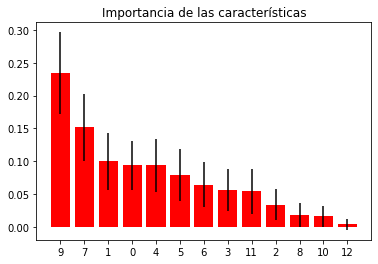

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all3, Y_train_3)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all3.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all3.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all3.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all3.shape[1]])
plt.show()


# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

X_train_4 = X_train_4.to_numpy()
X_test_4= X_test_4.to_numpy()

X_train_numerical4=X_train_4[:,[0,1,2,3,5,6,8,9,10,11]]
X_train_categorical4=X_train_4[:,[4,7,12]]
X_test_numerical4=X_test_4[:,[0,1,2,3,5,6,8,9,10,11]]
X_test_categorical4=X_test_4[:,[4,7,12]]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 9 (0.203766)
2. Característica 7 (0.138233)
3. Característica 1 (0.100194)
4. Característica 0 (0.097256)
5. Característica 5 (0.093565)
6. Característica 4 (0.092622)
7. Característica 11 (0.068186)
8. Característica 6 (0.065444)
9. Característica 3 (0.054529)
10. Característica 2 (0.041613)
11. Característica 8 (0.024536)
12. Característica 10 (0.016092)
13. Característica 12 (0.003963)


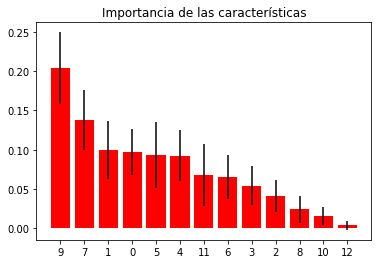

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all4, Y_train_4)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all4.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all4.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all4.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all4.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=4), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all4, Y_train_4)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

In [ ]:
lista_chi

[[0.008258112189141631,
  0.1059136164071457,
  0.05982031734509685,
  0.0,
  0.0194623567803347],
 [0.045302708218112775, 0.0, 0.0, 0.013855604974134295, 0.0],
 [0.0, 0.0, 0.0, 0.006415874565653734, 0.005371042661447278],
 [0.0378438833420085,
  0.08477100901453838,
  0.0,
  0.11019624095171876,
  0.037047014259293354],
 [0.04534449802552731, 0.0, 0.0, 0.0, 0.0],
 [0.03486687668853117,
  0.0647333358013138,
  0.00639844407947332,
  0.07370393372871287,
  0.0],
 [0.04709221211699166, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0007782483030276399, 0.0, 0.03659671802774733, 0.0],
 [0.01446910734508644,
  0.022364593432571356,
  0.08457741788344708,
  0.007661157060936619,
  0.0],
 [0.0, 0.0, 0.04472945334798273, 0.02131644274747213, 0.0035181472929266544],
 [0.0, 0.0, 0.016980761068040362, 0.03703832503185445, 0.0],
 [0.0, 0.0, 0.0, 0.05966516064678973, 0.03118478620956533]]

In [ ]:
for i in range(len(lista_chi)):
  lista_chi[i]=np.mean(lista_chi[i])

In [ ]:
lista_chi

[0.038690880544343775,
 0.011831662638449415,
 0.0023573834454202027,
 0.053971629513511796,
 0.009068899605105462,
 0.03594051805960623,
 0.009418442423398333,
 0.007474993266154995,
 0.025814455144408298,
 0.013912808677676303,
 0.010803817219978962,
 0.01816998937127101]

Dibujo la media de las 5 particiones para información utua:

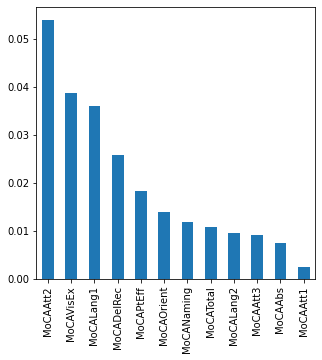

In [ ]:
fit_Chi2 = pd.Series(lista_chi, index=X.columns)
# fit_Chi2.sort_values(ascending=False)

fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))
# gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")
# indices = np.argsort(fit_Chi2)[::-1]

# plt.figure()
# # plt.title("Importancia de las características")
# plt.bar(X.columns, fit_Chi2.scores_),
#         color="r", align="center")
# plt.xticks(rotation='vertical')
# plt.xlim([-1, X_train_scaler_all0.shape[1]])
# plt.rcParams["figure.figsize"] = (5, 5)
# plt.tight_layout()
# plt.savefig("{}.pdf".format("IMutuaAttitudeScale"))
# plt.close()
# plt.show()

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('MoCACompDaysFromEnroll', 0.08771635550379074)
('MoCAVisEx', 0.10806934592568955)
('MoCANaming', 0.03585156626289046)
('MoCAAtt1', 0.045868885928890386)
('MoCAAtt2', 0.08735748555753985)
('MoCAAtt3', 0.08808148643913224)
('MoCALang1', 0.06617012683352728)
('MoCALang2', 0.14248907645791037)
('MoCAAbs', 0.02275853195097314)
('MoCADelRec', 0.23116252960952402)
('MoCAOrient', 0.01605391975449052)
('MoCATotal', 0.06481244418711046)
('MoCAPtEff', 0.0036082455885309873)
Ranking de Características:
1. Característica 9 (0.231163)
2. Característica 7 (0.142489)
3. Característica 1 (0.108069)
4. Característica 5 (0.088081)
5. Característica 0 (0.087716)
6. Característica 4 (0.087357)
7. Característica 6 (0.066170)
8. Característica 11 (0.064812)
9. Característica 3 (0.045869)
10. Característica 2 (0.035852)
11. Característica 8 (0.022759)
12. Característica 10 (0.016054)
13. Característica 12 (0.003608)


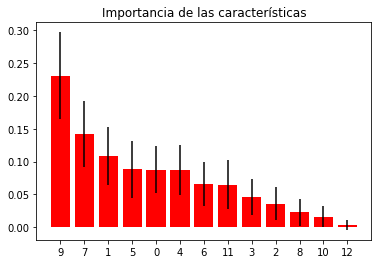

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all4, Y_train_4)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all4.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all4.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all4.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all4.shape[1]])
plt.show()


# ***RESULTADOS CON FS***

In [ ]:
recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[0,3,6,8]]
X_test_ec = X_test_scaler_all0[:,[0,3,6,8]]


Valor correspondiente para el hiperparámetro: {'C': 30, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.3902439024390244
[[10 10]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.3902439024390244 0.5 0.3243243243243243


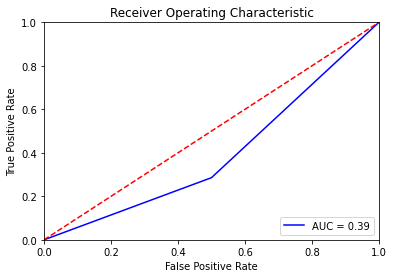

{'max_depth': 1, 'min_samples_leaf': 48}
Mejor ROC-AUC en validación cruzada: 0.594
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 48}
0.43902439024390244
[[10 10]
 [13  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.38095238095238093 0.43902439024390244 0.5 0.41025641025641024


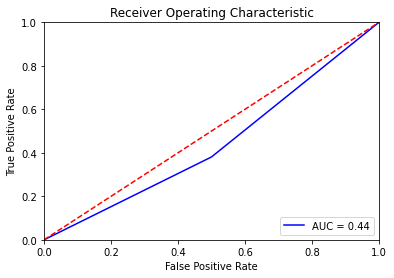

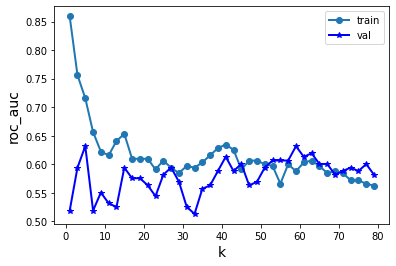

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.632
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.4878048780487805
[[ 9 11]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.4878048780487805 0.45 0.5116279069767442


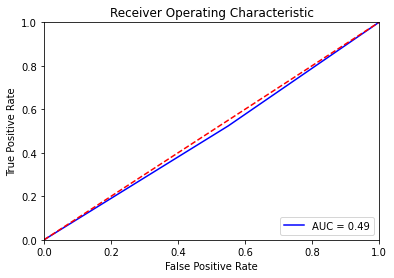

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.5121951219512195
[[17  3]
 [17  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.19047619047619047 0.5121951219512195 0.85 0.2857142857142857


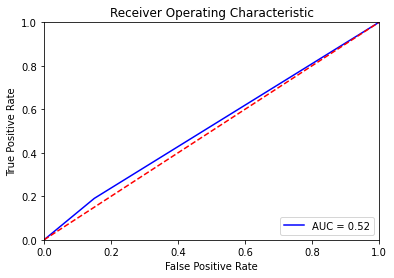

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.625
0.3902439024390244
[[10 10]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.3902439024390244 0.5 0.3243243243243243


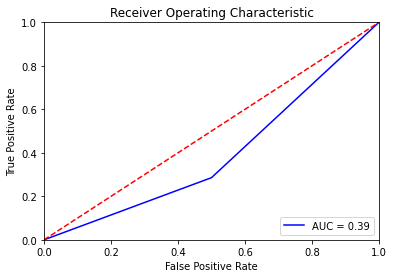

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[0,3,6,8]]
X_test_ec = X_test_scaler_all1[:,[0,3,6,8]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5609756097560976 0.7 0.5


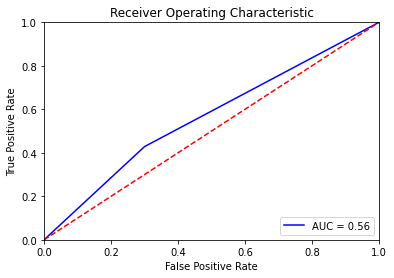

{'max_depth': 1, 'min_samples_leaf': 49}
Mejor ROC-AUC en validación cruzada: 0.563
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 49}
0.5609756097560976
[[10 10]
 [ 8 13]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6190476190476191 0.5609756097560976 0.5 0.5909090909090909


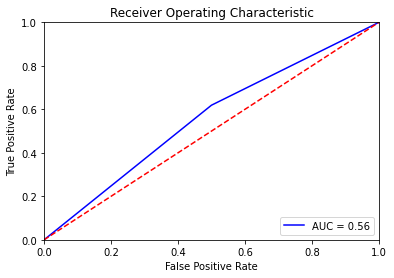

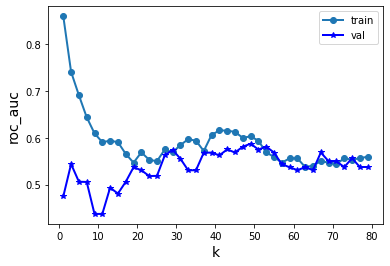

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.587
Valor correspondiente para el hiperparámetro: {'n_neighbors': 49}
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5609756097560976 0.7 0.5


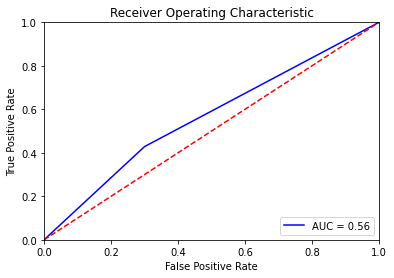

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.5121951219512195
[[14  6]
 [14  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3333333333333333 0.5121951219512195 0.7 0.41176470588235287


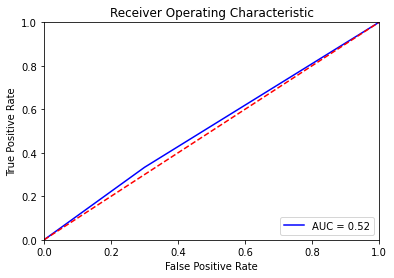

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.5121951219512195
[[16  4]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.5121951219512195 0.8 0.33333333333333326


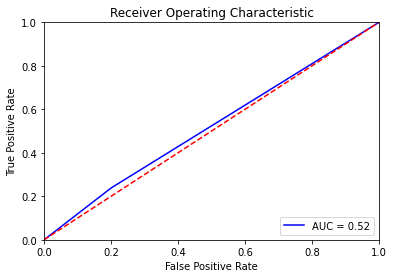

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[0,3,6,8]]
X_test_ec = X_test_scaler_all2[:,[0,3,6,8]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.4634146341463415
[[13  7]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.4634146341463415 0.65 0.35294117647058826


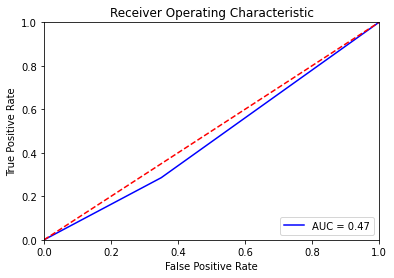

{'max_depth': 1, 'min_samples_leaf': 47}
Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 47}
0.3902439024390244
[[10 10]
 [15  6]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.2857142857142857 0.3902439024390244 0.5 0.3243243243243243


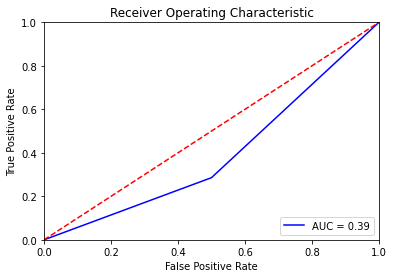

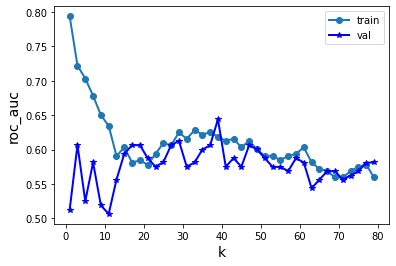

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.644
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}
0.3170731707317073
[[ 9 11]
 [17  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.19047619047619047 0.3170731707317073 0.45 0.2222222222222222


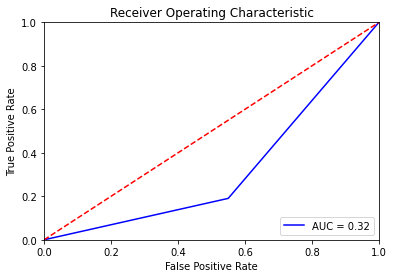

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.4634146341463415
[[14  6]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.4634146341463415 0.7 0.31249999999999994


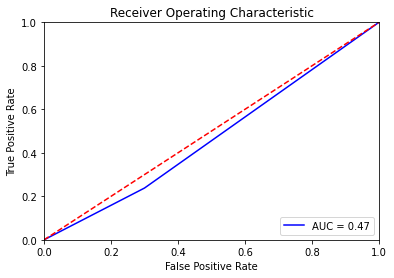

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
0.4634146341463415
[[14  6]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.4634146341463415 0.7 0.31249999999999994


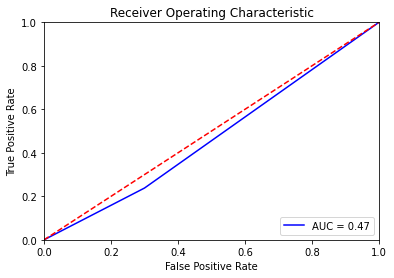

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[0,3,6,8]]
X_test_ec = X_test_scaler_all3[:,[0,3,6,8]]


Valor correspondiente para el hiperparámetro: {'C': 20, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.6341463414634146
[[12  8]
 [ 7 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6666666666666666 0.6341463414634146 0.6 0.6511627906976744


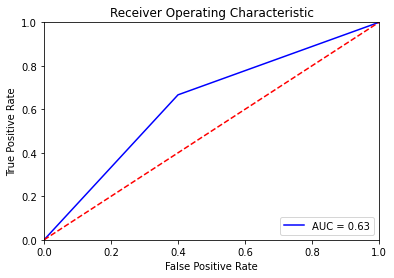

{'max_depth': 1, 'min_samples_leaf': 47}
Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 47}
0.6097560975609756
[[ 7 13]
 [ 3 18]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.8571428571428571 0.6097560975609756 0.35 0.6923076923076923


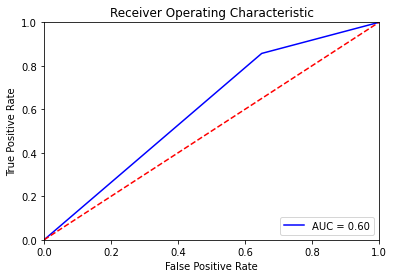

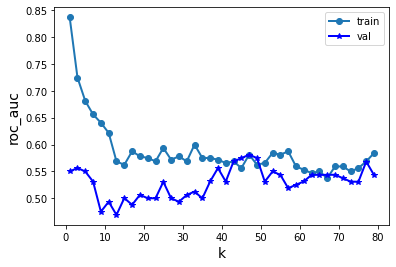

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
Valor correspondiente para el hiperparámetro: {'n_neighbors': 47}
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5609756097560976 0.7 0.5


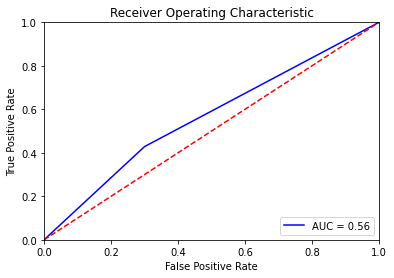

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.5853658536585366
[[16  4]
 [13  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.38095238095238093 0.5853658536585366 0.8 0.4848484848484849


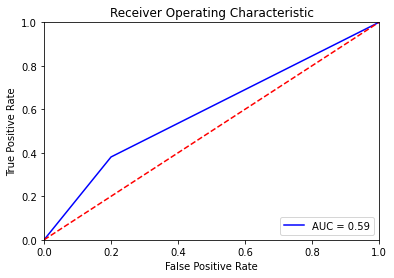

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.6097560975609756
[[15  5]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.6097560975609756 0.75 0.5555555555555556


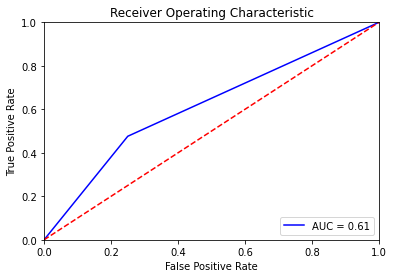

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])



In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[0,3,6,8]]
X_test_ec = X_test_scaler_all4[:,[0,3,6,8]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.5121951219512195 0.55 0.5


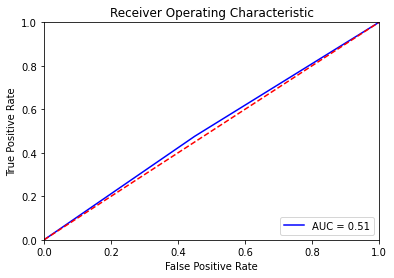

{'max_depth': 1, 'min_samples_leaf': 48}
Mejor ROC-AUC en validación cruzada: 0.556
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 48}
0.4146341463414634
[[ 9 11]
 [13  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.38095238095238093 0.4146341463414634 0.45 0.4


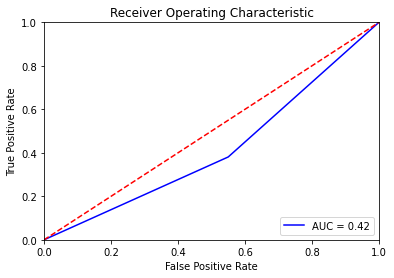

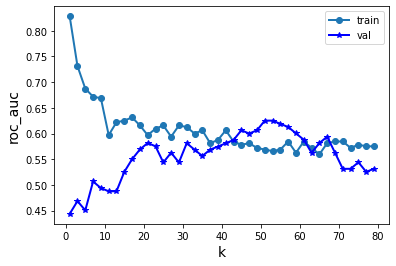

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.625
Valor correspondiente para el hiperparámetro: {'n_neighbors': 51}
0.5121951219512195
[[ 9 11]
 [ 9 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5714285714285714 0.5121951219512195 0.45 0.5454545454545454


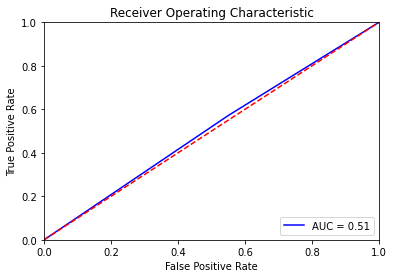

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.5121951219512195 0.55 0.5


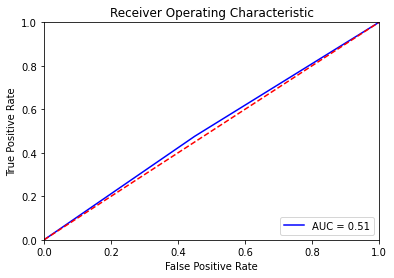

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.6097560975609756
[[14  6]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.6097560975609756 0.7 0.5789473684210527


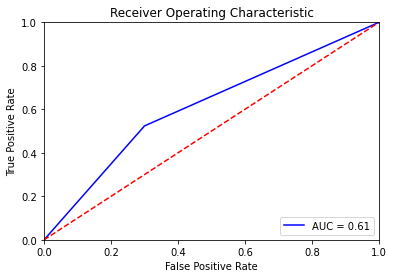

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.512195  0.083070
1          DT  0.482927  0.086439
2         KNN  0.487805  0.089947
3  Radial SVM  0.546341  0.052538
4  Linear SVM  0.517073  0.085052

In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

model      mean       std
0       LASSO  0.514286  0.081944
1          DT  0.482381  0.083528
2         KNN  0.489286  0.089769
3  Radial SVM  0.546905  0.049628
4  Linear SVM  0.521190  0.084698

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("Moca_FS_acc"))
plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

model      mean       std
0       LASSO  0.428571  0.141261
1          DT  0.504762  0.207785
2         KNN  0.428571  0.131277
3  Radial SVM  0.523810  0.208656
4  Linear SVM  0.352381  0.122706

In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


model  mean       std
0       LASSO  0.60  0.070711
1          DT  0.46  0.058310
2         KNN  0.55  0.122474
3  Radial SVM  0.57  0.143527
4  Linear SVM  0.69  0.101980

# ***A PARTIR DE AQUÍ PRUEBAS VARIAS***

# ***PARA BOOTSTRAP ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

recall_mlp_lin_scaler = []
accuracy_mlp_lin_scaler = []
precision_mlp_lin_scaler=[]
f1_mlp_lin_scaler=[]
roc_mlp_lin_scaler= []

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[0,3,4,8,10,11]]
X_test_ec = X_test_scaler_all0[:,[0,3,4,8,10,11]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.3902439024390244
[[ 9 11]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.3902439024390244 0.3888888888888889 0.358974358974359


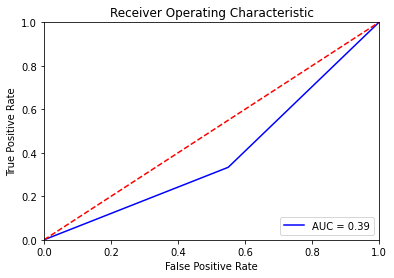

{'max_depth': 6, 'min_samples_leaf': 6}
Mejor ROC-AUC en validación cruzada: 0.581
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 6}
0.43902439024390244
[[11  9]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.43902439024390244 0.4375 0.37837837837837834


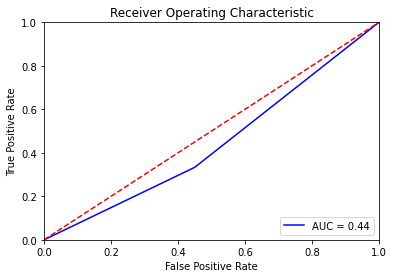

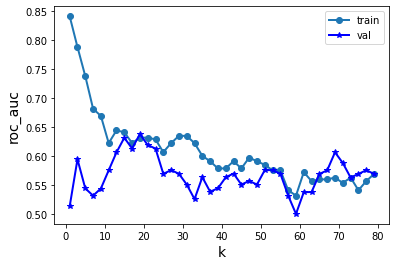

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.638
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.34146341463414637
[[ 9 11]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.34146341463414637 0.3125 0.27027027027027023


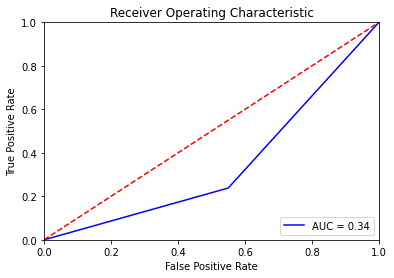

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.4146341463414634
[[11  9]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.4146341463414634 0.4 0.3333333333333333


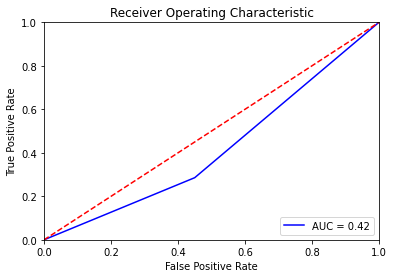

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.3902439024390244
[[ 9 11]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.3902439024390244 0.3888888888888889 0.358974358974359


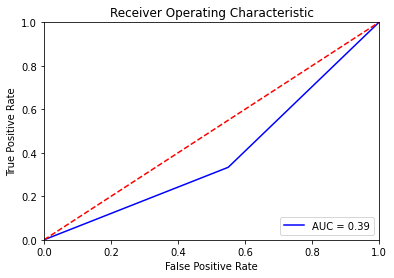

Valor correspondiente para el hiperparámetro: {'hidden_layer_sizes': 62}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.4146341463414634
[[10 10]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.4146341463414634 0.4117647058823529 0.36842105263157887


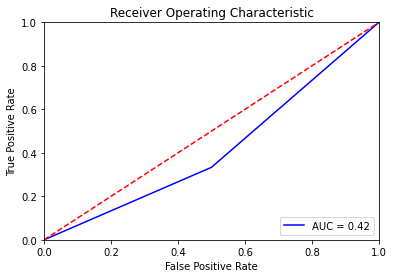

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

mlp=MLP(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_mlp_lin_scaler.append(sl[0])
accuracy_mlp_lin_scaler.append(sl[1])
precision_mlp_lin_scaler.append(sl[2])
f1_mlp_lin_scaler.append(sl[3])
roc_mlp_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[0,3,4,8,10,11]]
X_test_ec = X_test_scaler_all1[:,[0,3,4,8,10,11]]


Valor correspondiente para el hiperparámetro: {'C': 30, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.5365853658536586
[[15  5]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.5365853658536586 0.5833333333333334 0.4242424242424242


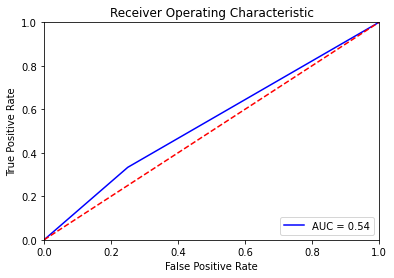

{'max_depth': 6, 'min_samples_leaf': 6}
Mejor ROC-AUC en validación cruzada: 0.582
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 6}
0.4878048780487805
[[13  7]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.4878048780487805 0.5 0.4


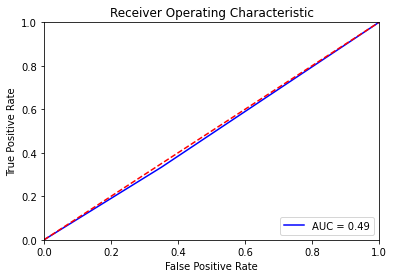

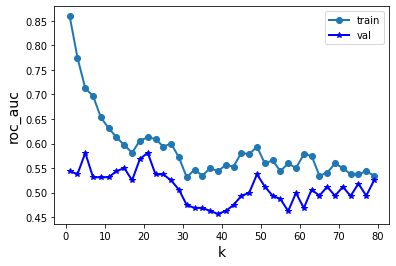

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
Valor correspondiente para el hiperparámetro: {'n_neighbors': 21}
0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5365853658536586 0.5625 0.4864864864864864


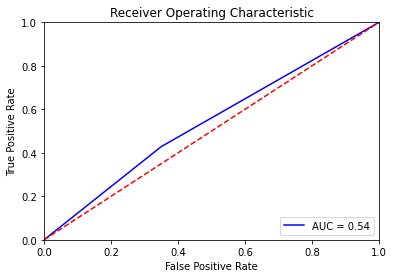

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5609756097560976 0.6 0.5


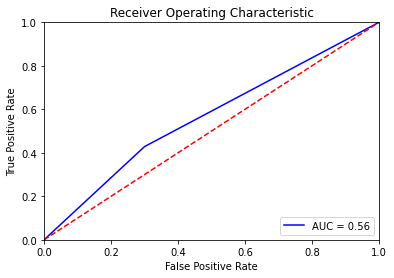

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5121951219512195
[[16  4]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.5121951219512195 0.5555555555555556 0.33333333333333326


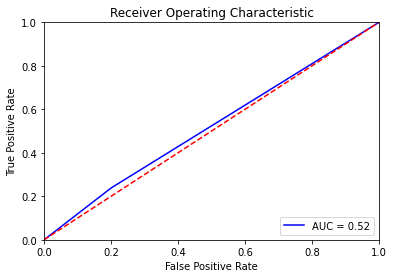

Valor correspondiente para el hiperparámetro: {'hidden_layer_sizes': 92}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.5609756097560976
[[20  0]
 [18  3]]
Sensibilidad, Accuracy, precision, f1-score 0.14285714285714285 0.5609756097560976 1.0 0.25


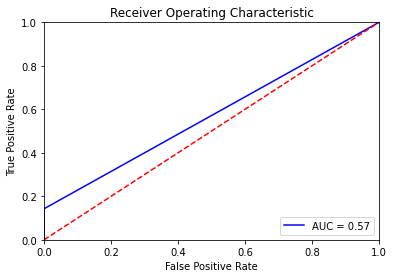

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

mlp=MLP(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_mlp_lin_scaler.append(sl[0])
accuracy_mlp_lin_scaler.append(sl[1])
precision_mlp_lin_scaler.append(sl[2])
f1_mlp_lin_scaler.append(sl[3])
roc_mlp_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[0,3,4,8,10,11]]
X_test_ec = X_test_scaler_all2[:,[0,3,4,8,10,11]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.43902439024390244
[[13  7]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.43902439024390244 0.4166666666666667 0.30303030303030304


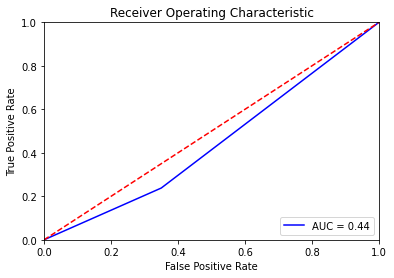

{'max_depth': 6, 'min_samples_leaf': 2}
Mejor ROC-AUC en validación cruzada: 0.606
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 2}
0.43902439024390244
[[12  8]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.43902439024390244 0.42857142857142855 0.34285714285714286


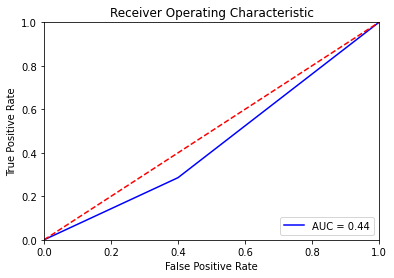

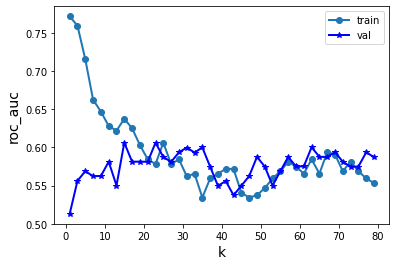

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
Valor correspondiente para el hiperparámetro: {'n_neighbors': 15}
0.3902439024390244
[[ 8 12]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.3902439024390244 0.4 0.3902439024390244


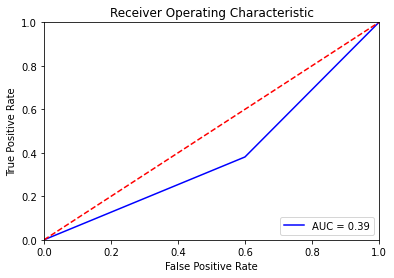

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.3902439024390244
[[14  6]
 [19  2]]
Sensibilidad, Accuracy, precision, f1-score 0.09523809523809523 0.3902439024390244 0.25 0.13793103448275862


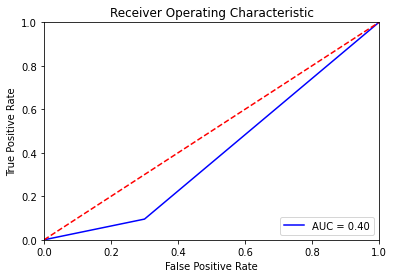

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.4634146341463415
[[14  6]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.4634146341463415 0.45454545454545453 0.31249999999999994


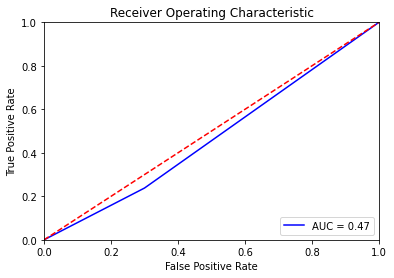

Valor correspondiente para el hiperparámetro: {'hidden_layer_sizes': 32}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.4878048780487805
[[13  7]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.4878048780487805 0.5 0.4


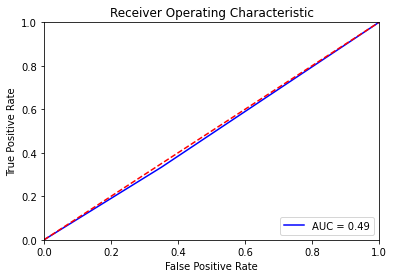

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

mlp=MLP(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_mlp_lin_scaler.append(sl[0])
accuracy_mlp_lin_scaler.append(sl[1])
precision_mlp_lin_scaler.append(sl[2])
f1_mlp_lin_scaler.append(sl[3])
roc_mlp_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[0,3,4,8,10,11]]
X_test_ec = X_test_scaler_all3[:,[0,3,4,8,10,11]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.6097560975609756
[[12  8]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.6097560975609756 0.6190476190476191 0.6190476190476191


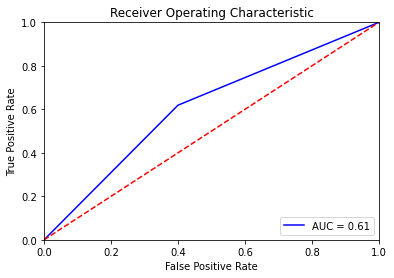

{'max_depth': 5, 'min_samples_leaf': 6}
Mejor ROC-AUC en validación cruzada: 0.575
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 6}
0.6097560975609756
[[ 8 12]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6097560975609756 0.5862068965517241 0.68


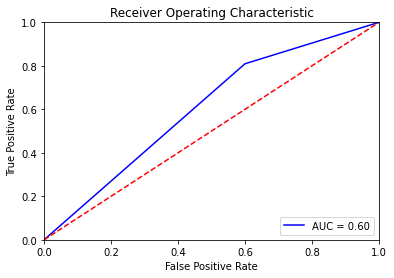

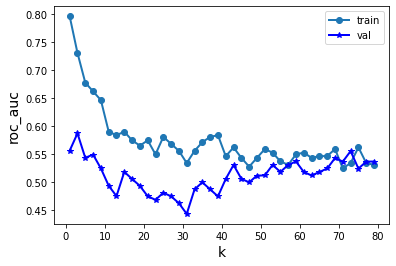

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.587
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.5853658536585366
[[12  8]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.5853658536585366 0.6 0.5853658536585366


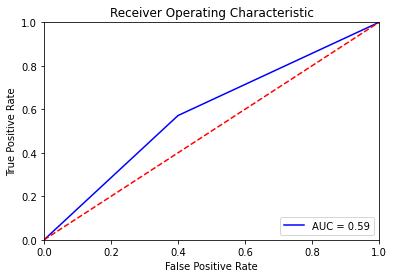

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4878048780487805
[[10 10]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.4878048780487805 0.5 0.4878048780487805


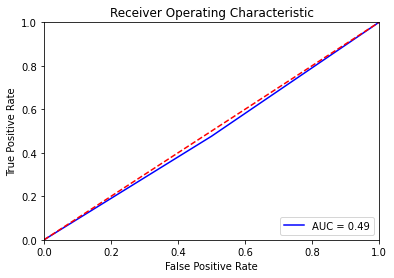

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.6097560975609756
[[15  5]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.6097560975609756 0.6666666666666666 0.5555555555555556


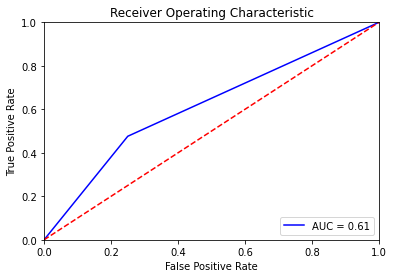

Valor correspondiente para el hiperparámetro: {'hidden_layer_sizes': 12}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.6341463414634146
[[13  7]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.6341463414634146 0.65 0.6341463414634146


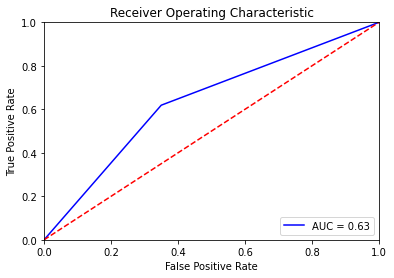

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

mlp=MLP(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_mlp_lin_scaler.append(sl[0])
accuracy_mlp_lin_scaler.append(sl[1])
precision_mlp_lin_scaler.append(sl[2])
f1_mlp_lin_scaler.append(sl[3])
roc_mlp_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[0,3,4,8,10,11]]
X_test_ec = X_test_scaler_all4[:,[0,3,4,8,10,11]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
0.43902439024390244
[[ 9 11]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.43902439024390244 0.45 0.4390243902439024


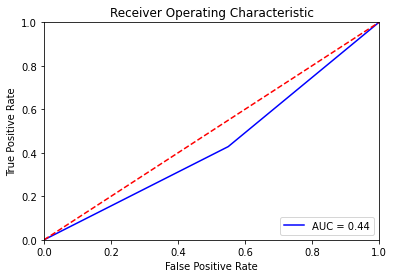

{'max_depth': 3, 'min_samples_leaf': 9}
Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 3, 'min_samples_leaf': 9}
0.5853658536585366
[[17  3]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.5853658536585366 0.7 0.45161290322580644


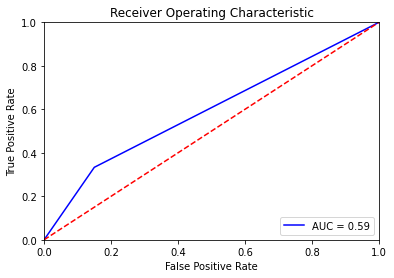

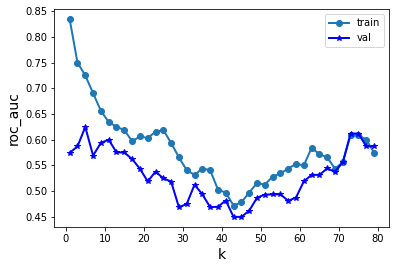

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.625
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.4634146341463415
[[ 8 12]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.4634146341463415 0.4782608695652174 0.5


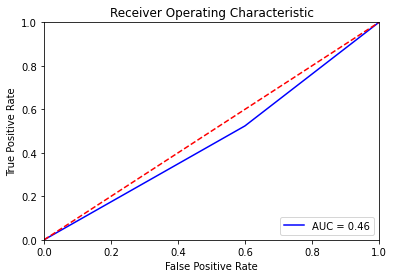

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.4878048780487805
[[13  7]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.4878048780487805 0.5 0.4


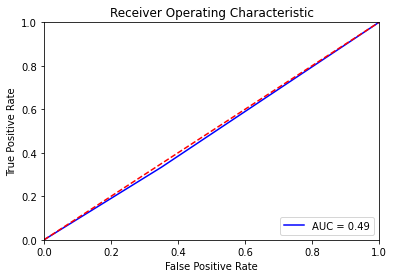

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5121951219512195 0.5263157894736842 0.5


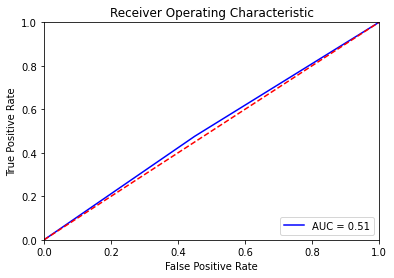

Valor correspondiente para el hiperparámetro: {'hidden_layer_sizes': 72}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.631
0.4878048780487805
[[10 10]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.4878048780487805 0.5 0.4878048780487805


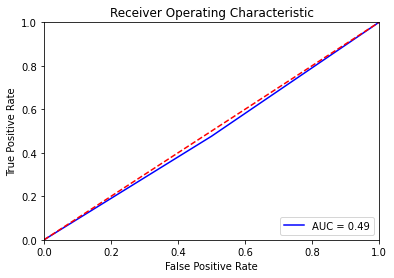

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

mlp=MLP(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_mlp_lin_scaler.append(sl[0])
accuracy_mlp_lin_scaler.append(sl[1])
precision_mlp_lin_scaler.append(sl[2])
f1_mlp_lin_scaler.append(sl[3])
roc_mlp_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:
#PARA MIN MAX

In [ ]:

model_scaler=['LASSO', 'DT','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.482927  0.079259
1          DT  0.512195  0.072353
2  Radial SVM  0.468293  0.060535
3  Linear SVM  0.497561  0.071692

In [ ]:
model2_scaler=['LASSO', 'DT','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


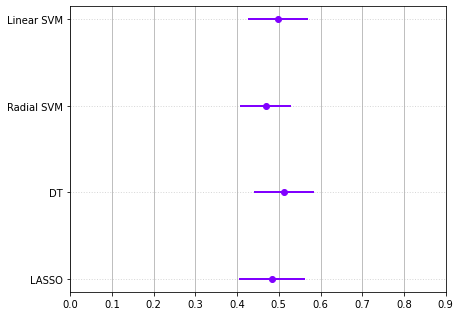

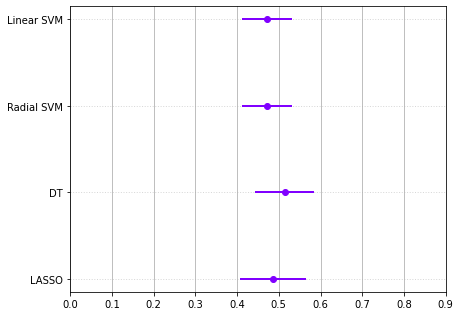

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)


In [ ]:

model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal','mlp']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler),np.mean(accuracy_mlp_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler),np.std(accuracy_mlp_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0  regresión_logistica  0.482927  0.087805
1                árbol  0.448780  0.050223
2                  knn  0.453659  0.088075
3                  svc  0.458537  0.096827
4           svc_lineal  0.478049  0.078049
5                  mlp  0.478049  0.078049

In [ ]:
model2_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal','mlp']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler),np.mean(roc_mlp_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler),np.std(roc_mlp_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
model3_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal','mlp']
mean3_scaler=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler),np.mean(recall_mlp_lin_scaler)]
std3_scaler=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler),np.std(recall_mlp_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model3_scaler
df_recall_scaler['mean'] = mean3_scaler
df_recall_scaler['std'] = std3_scaler

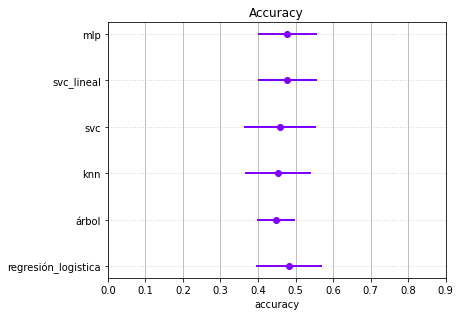

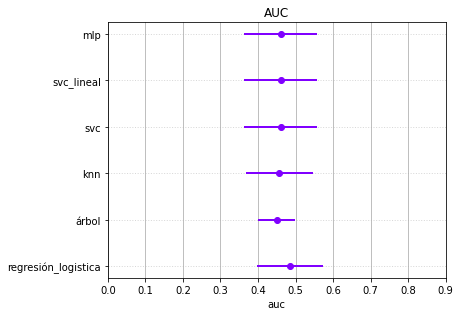

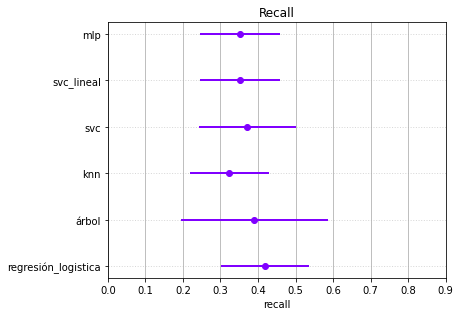

In [ ]:

#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)

plot_mean_std_metric(df_recall_scaler, lims=(0, 0.9), metric_name='recall',title_figure='Recall', flag_save_figure=True)


In [ ]:
model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler

In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.487805  0.380952  0.427255  0.490476   0.493360
árbol                0.517073  0.504762  0.482308  0.517381   0.610819
Knn                  0.487805  0.428571  0.455861  0.489286   0.497681
SVC                  0.546341  0.523810  0.517313  0.546905   0.556632
SVC-lineal           0.517073  0.352381  0.420932  0.546905   0.539765

# ***PARA CHI-SQUARE ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[4,9]]
X_test_ec = X_test_scaler_all0[:,[4,9]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.4634146341463415
[[14  6]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.4634146341463415 0.45454545454545453 0.31249999999999994


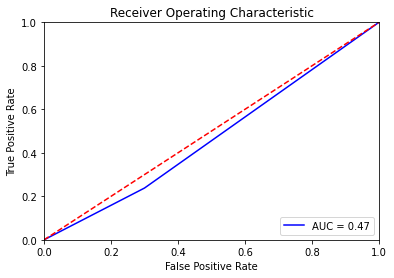

{'max_depth': 7}


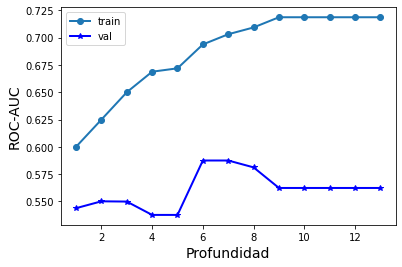

Mejor ROC-AUC en validación cruzada: 0.587
Mejor valor del hiperparámetro: {'max_depth': 7}
0.5121951219512195
[[12  8]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5121951219512195 0.5294117647058824 0.4736842105263158


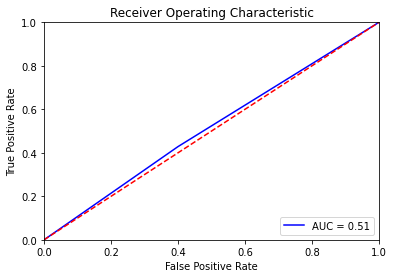

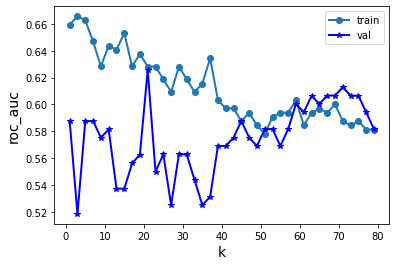

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.626
Valor correspondiente para el hiperparámetro: {'n_neighbors': 21}
0.4878048780487805
[[11  9]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.4878048780487805 0.5 0.4615384615384615


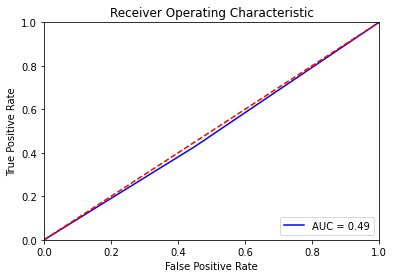

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
0.3902439024390244
[[11  9]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.3902439024390244 0.35714285714285715 0.2857142857142857


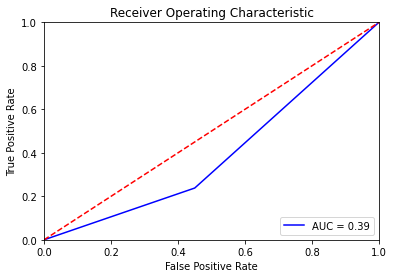

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.4878048780487805
[[15  5]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.4878048780487805 0.5 0.3225806451612903


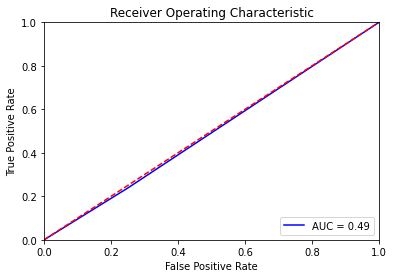

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[4,9]]
X_test_ec = X_test_scaler_all1[:,[4,9]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.5121951219512195
[[16  4]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.5121951219512195 0.5555555555555556 0.33333333333333326


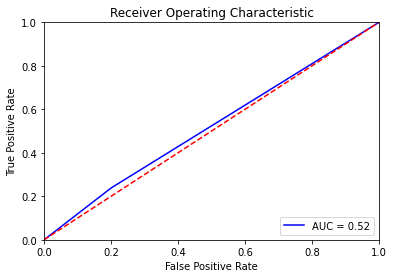

{'max_depth': 7}


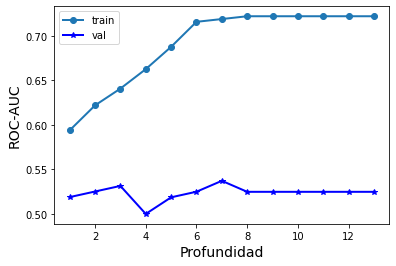

Mejor ROC-AUC en validación cruzada: 0.537
Mejor valor del hiperparámetro: {'max_depth': 7}
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5121951219512195 0.5263157894736842 0.5


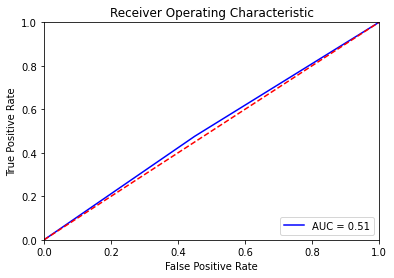

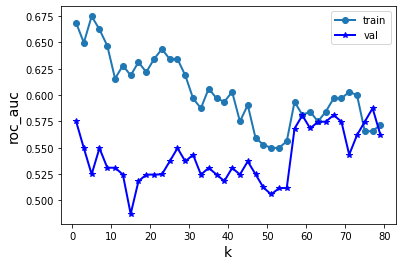

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.587
Valor correspondiente para el hiperparámetro: {'n_neighbors': 77}
0.5121951219512195
[[17  3]
 [17  4]]
Sensibilidad, Accuracy, precision, f1-score 0.19047619047619047 0.5121951219512195 0.5714285714285714 0.2857142857142857


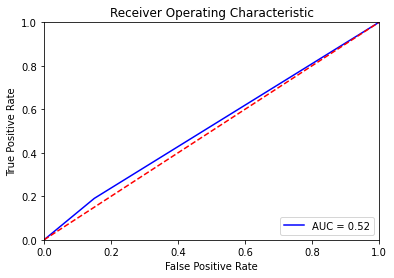

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.4878048780487805
[[12  8]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.4878048780487805 0.5 0.4324324324324324


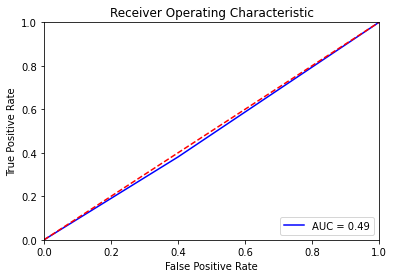

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
0.5365853658536586
[[19  1]
 [18  3]]
Sensibilidad, Accuracy, precision, f1-score 0.14285714285714285 0.5365853658536586 0.75 0.24


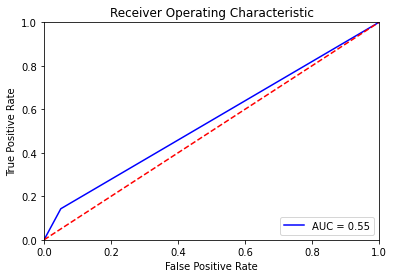

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[4,9]]
X_test_ec = X_test_scaler_all2[:,[4,9]]


Valor correspondiente para el hiperparámetro: {'C': 30, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.43902439024390244
[[12  8]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.43902439024390244 0.42857142857142855 0.34285714285714286


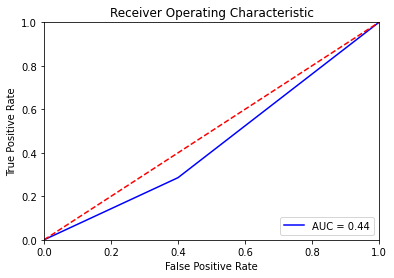

{'max_depth': 2}


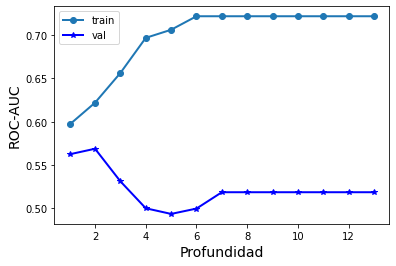

Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 2}
0.5365853658536586
[[ 7 13]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.5365853658536586 0.5357142857142857 0.6122448979591837


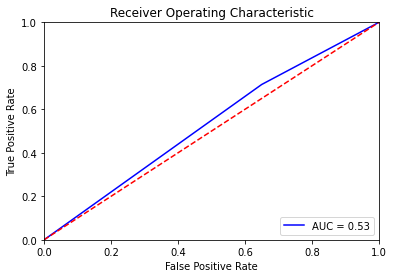

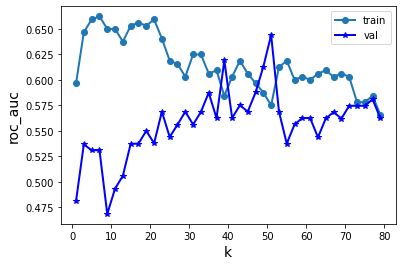

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.644
Valor correspondiente para el hiperparámetro: {'n_neighbors': 51}
0.4878048780487805
[[12  8]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.4878048780487805 0.5 0.4324324324324324


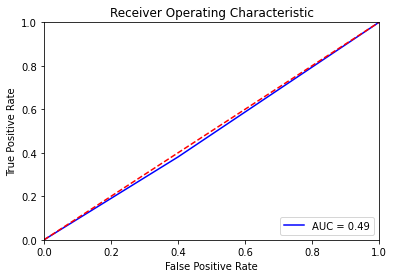

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.4634146341463415
[[13  7]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.4634146341463415 0.46153846153846156 0.35294117647058826


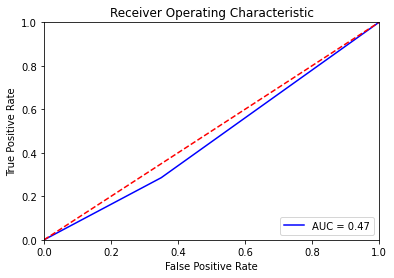

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
0.4146341463414634
[[13  7]
 [17  4]]
Sensibilidad, Accuracy, precision, f1-score 0.19047619047619047 0.4146341463414634 0.36363636363636365 0.25


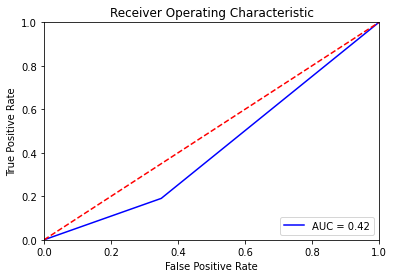

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[4,9]]
X_test_ec = X_test_scaler_all3[:,[4,9]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.6097560975609756
[[14  6]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.6097560975609756 0.6470588235294118 0.5789473684210527


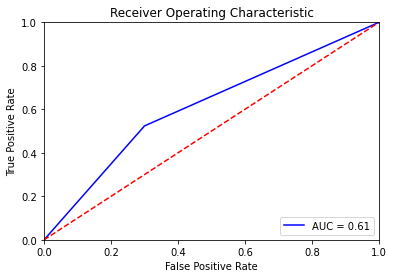

{'max_depth': 9}


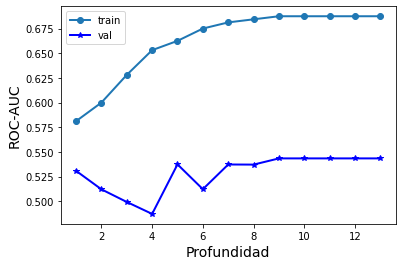

Mejor ROC-AUC en validación cruzada: 0.543
Mejor valor del hiperparámetro: {'max_depth': 9}
0.6341463414634146
[[12  8]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.6341463414634146 0.6363636363636364 0.6511627906976744


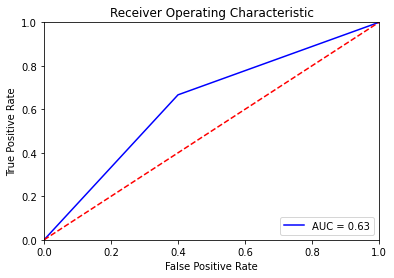

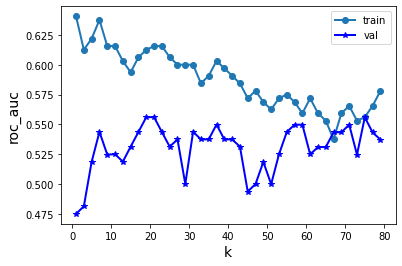

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.6585365853658537
[[17  3]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.6585365853658537 0.7692307692307693 0.588235294117647


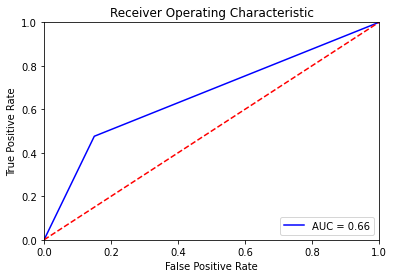

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.5853658536585366
[[18  2]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.5853658536585366 0.75 0.4137931034482759


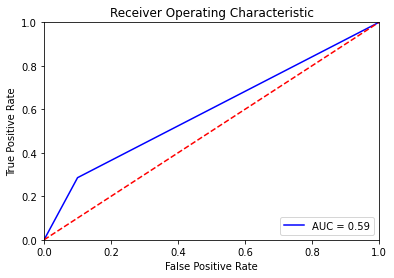

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.5853658536585366
[[18  2]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.5853658536585366 0.75 0.4137931034482759


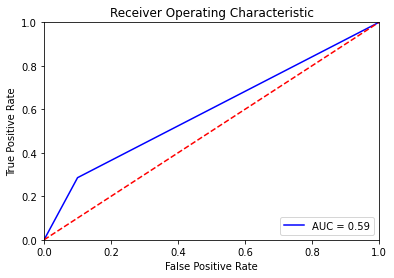

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])



In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[4,9]]
X_test_ec = X_test_scaler_all4[:,[4,9]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5609756097560976 0.6 0.5


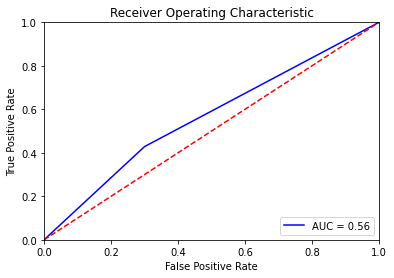

{'max_depth': 2}


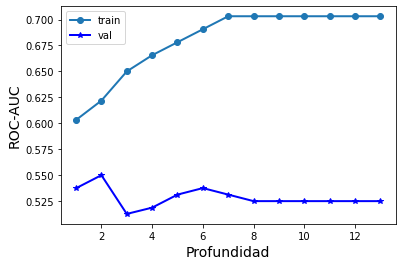

Mejor ROC-AUC en validación cruzada: 0.550
Mejor valor del hiperparámetro: {'max_depth': 2}
0.5365853658536586
[[ 3 17]
 [ 2 19]]
Sensibilidad, Accuracy, precision, f1-score 0.9047619047619048 0.5365853658536586 0.5277777777777778 0.6666666666666666


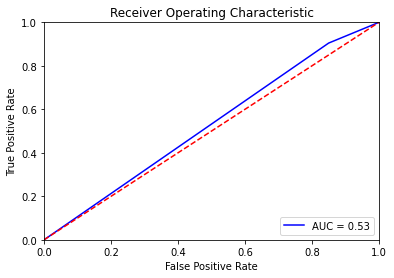

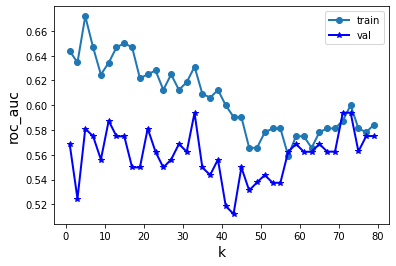

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
Valor correspondiente para el hiperparámetro: {'n_neighbors': 71}
0.5365853658536586
[[11  9]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5365853658536586 0.55 0.5365853658536585


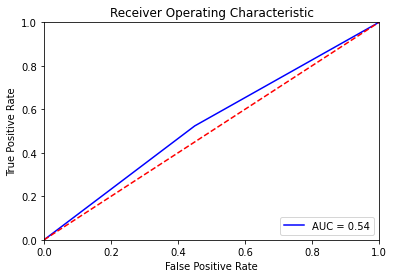

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5609756097560976 0.6 0.5


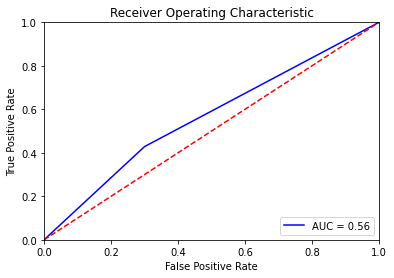

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5121951219512195
[[12  8]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5121951219512195 0.5294117647058824 0.4736842105263158


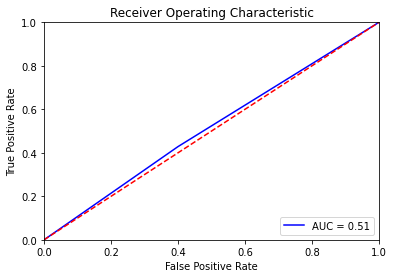

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0  regresión_logistica  0.489756  0.081310
1                árbol  0.496585  0.057668
2                  knn  0.500488  0.085920
3                  svc  0.491707  0.086900
4           svc_lineal  0.487805  0.073979

In [ ]:
model2_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


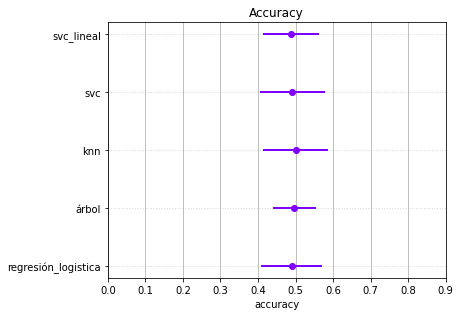

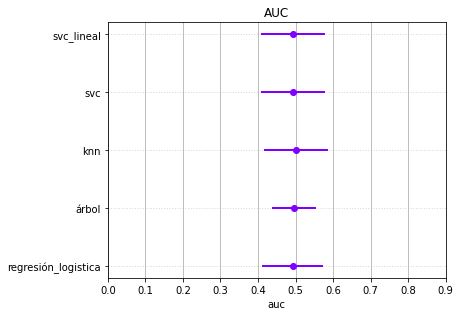

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)


In [ ]:
model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler

In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.489756  0.396190  0.434972  0.492095   0.495960
árbol                0.496585  0.514286  0.486616  0.496143   0.521774
Knn                  0.500488  0.449524  0.469590  0.501762   0.513242
SVC                  0.491707  0.417143  0.431903  0.493571   0.514647
SVC-lineal           0.487805  0.335238  0.390370  0.493571   0.502835

# ***PARA BOOSTRAP ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[1,4,5,9,11,12]]
X_test_ec = X_test_scaler_all0[:,[1,4,5,9,11,12]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.3902439024390244
[[ 9 11]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.3902439024390244 0.3888888888888889 0.358974358974359


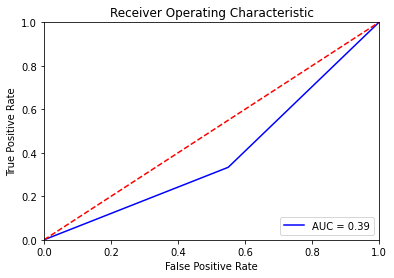

{'max_depth': 8}


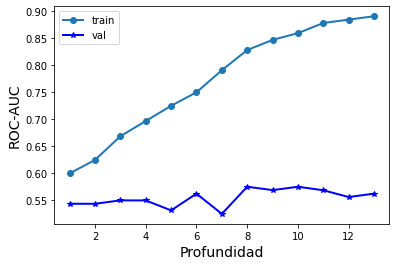

Mejor ROC-AUC en validación cruzada: 0.575
Mejor valor del hiperparámetro: {'max_depth': 8}
0.4146341463414634
[[12  8]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.4146341463414634 0.38461538461538464 0.2941176470588235


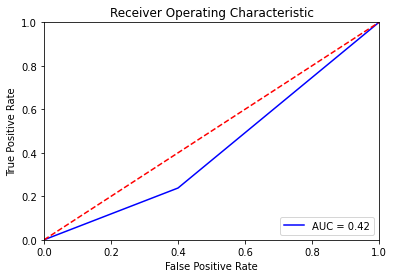

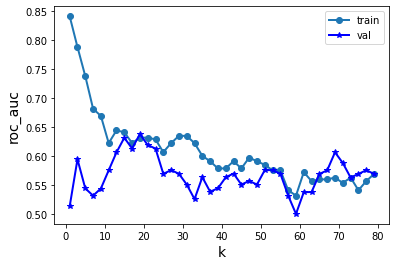

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.638
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.34146341463414637
[[ 9 11]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.34146341463414637 0.3125 0.27027027027027023


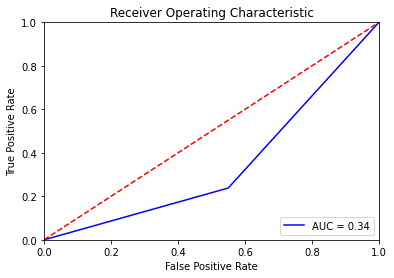

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.4146341463414634
[[11  9]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.4146341463414634 0.4 0.3333333333333333


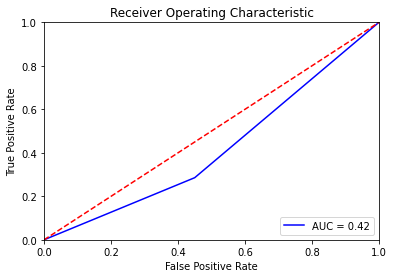

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.3902439024390244
[[ 9 11]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.3902439024390244 0.3888888888888889 0.358974358974359


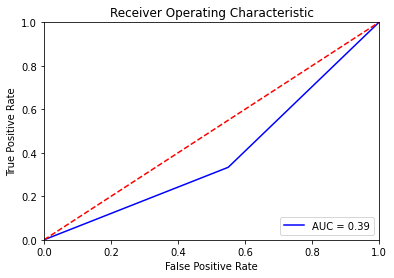

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[1,4,5,9,11,12]]
X_test_ec = X_test_scaler_all1[:,[1,4,5,9,11,12]]


Valor correspondiente para el hiperparámetro: {'C': 30, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.5365853658536586
[[15  5]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.5365853658536586 0.5833333333333334 0.4242424242424242


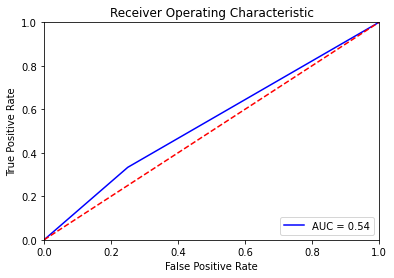

{'max_depth': 10}


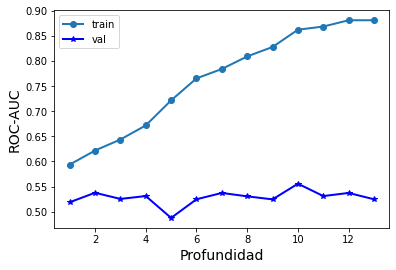

Mejor ROC-AUC en validación cruzada: 0.556
Mejor valor del hiperparámetro: {'max_depth': 10}
0.4634146341463415
[[11  9]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.4634146341463415 0.47058823529411764 0.42105263157894735


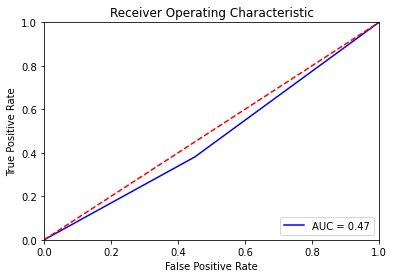

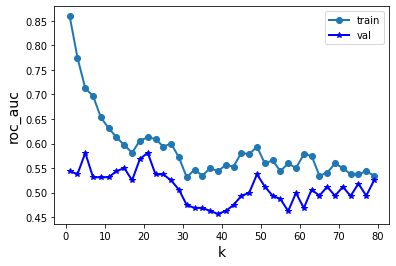

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
Valor correspondiente para el hiperparámetro: {'n_neighbors': 21}
0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5365853658536586 0.5625 0.4864864864864864


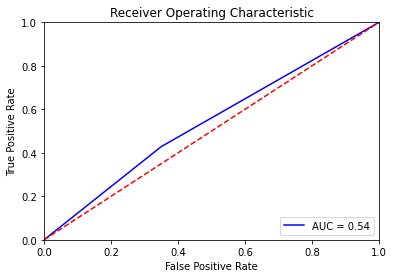

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5609756097560976 0.6 0.5


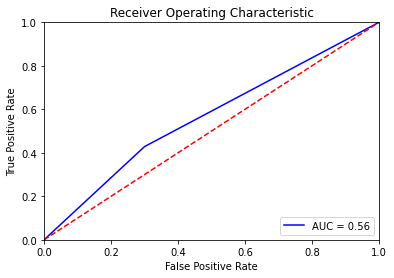

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5121951219512195
[[16  4]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.5121951219512195 0.5555555555555556 0.33333333333333326


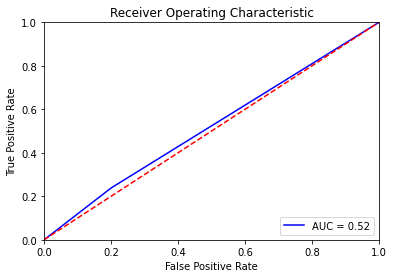

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[1,4,5,9,11,12]]
X_test_ec = X_test_scaler_all2[:,[1,4,5,9,11,12]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.43902439024390244
[[13  7]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.43902439024390244 0.4166666666666667 0.30303030303030304


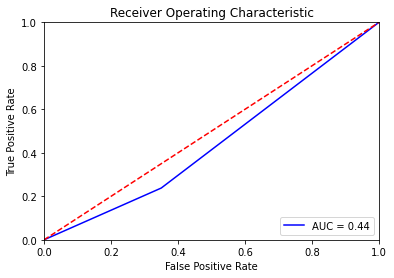

{'max_depth': 3}


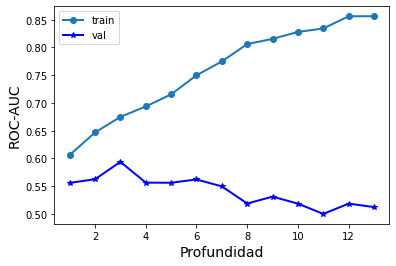

Mejor ROC-AUC en validación cruzada: 0.594
Mejor valor del hiperparámetro: {'max_depth': 3}
0.4146341463414634
[[11  9]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.4146341463414634 0.4 0.3333333333333333


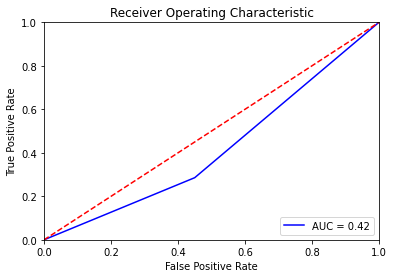

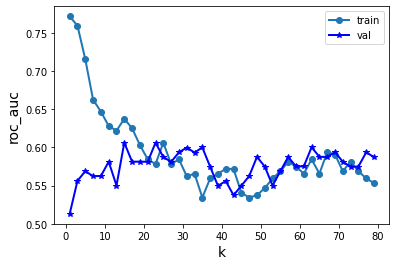

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
Valor correspondiente para el hiperparámetro: {'n_neighbors': 15}
0.3902439024390244
[[ 8 12]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.3902439024390244 0.4 0.3902439024390244


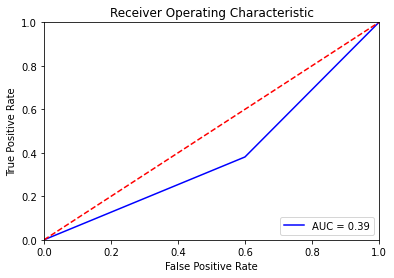

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.3902439024390244
[[14  6]
 [19  2]]
Sensibilidad, Accuracy, precision, f1-score 0.09523809523809523 0.3902439024390244 0.25 0.13793103448275862


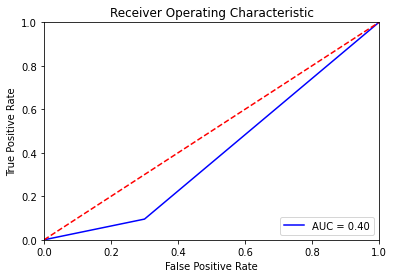

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.4634146341463415
[[14  6]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.4634146341463415 0.45454545454545453 0.31249999999999994


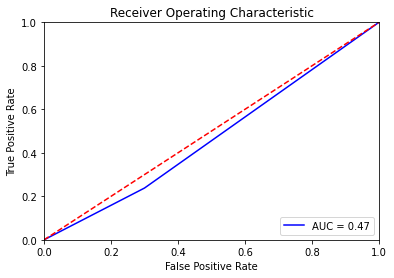

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[1,4,5,9,11,12]]
X_test_ec = X_test_scaler_all3[:,[1,4,5,9,11,12]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.6097560975609756
[[12  8]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.6097560975609756 0.6190476190476191 0.6190476190476191


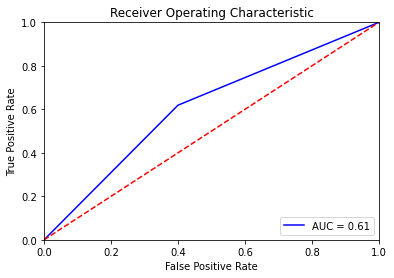

{'max_depth': 13}


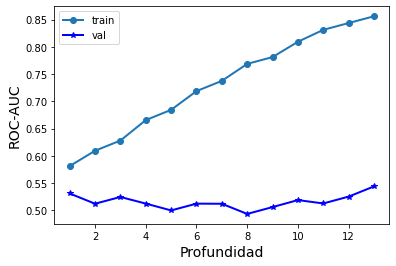

Mejor ROC-AUC en validación cruzada: 0.544
Mejor valor del hiperparámetro: {'max_depth': 13}
0.5365853658536586
[[14  6]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.5365853658536586 0.5714285714285714 0.4571428571428571


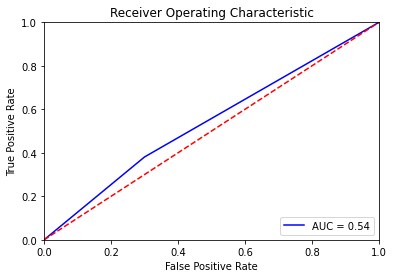

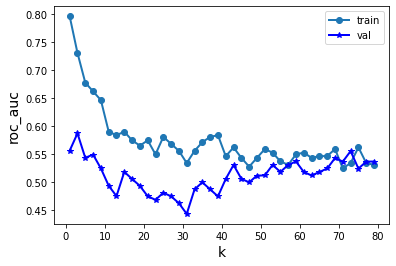

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.587
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.5853658536585366
[[12  8]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.5853658536585366 0.6 0.5853658536585366


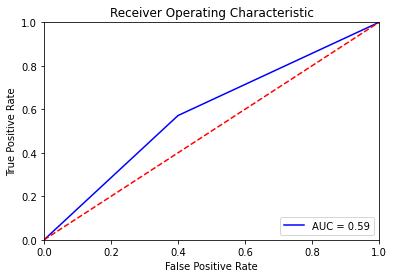

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4878048780487805
[[10 10]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.4878048780487805 0.5 0.4878048780487805


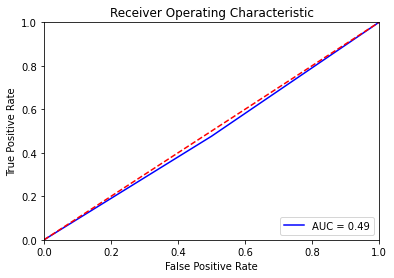

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.6097560975609756
[[15  5]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.6097560975609756 0.6666666666666666 0.5555555555555556


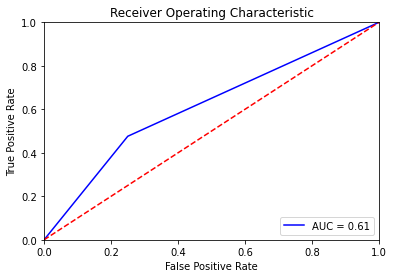

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])



In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[1,4,5,9,11,12]]
X_test_ec = X_test_scaler_all4[:,[1,4,5,9,11,12]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
0.43902439024390244
[[ 9 11]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.43902439024390244 0.45 0.4390243902439024


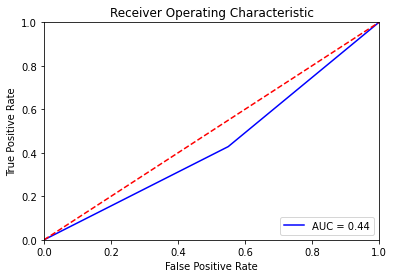

{'max_depth': 10}


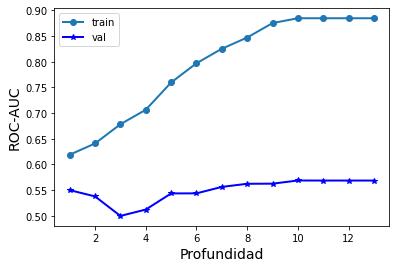

Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 10}
0.3902439024390244
[[ 5 15]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.3902439024390244 0.4230769230769231 0.4680851063829788


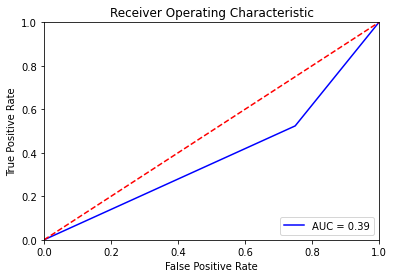

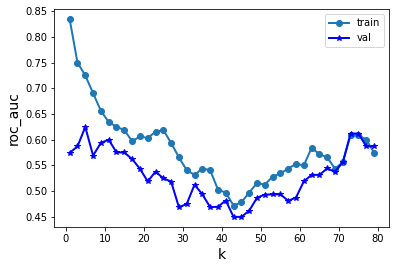

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.625
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.4634146341463415
[[ 8 12]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.4634146341463415 0.4782608695652174 0.5


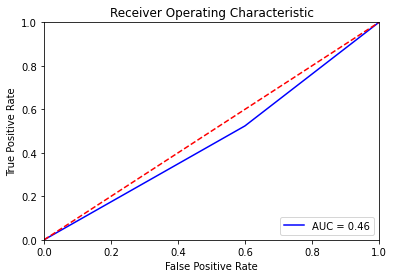

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.4878048780487805
[[13  7]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.4878048780487805 0.5 0.4


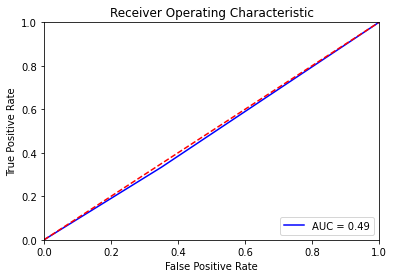

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5121951219512195 0.5263157894736842 0.5


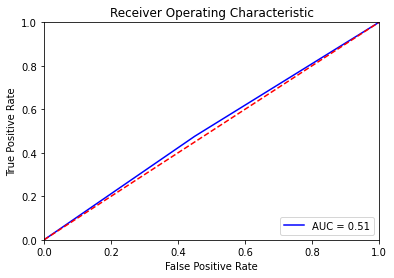

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0  regresión_logistica  0.489240  0.079792
1                árbol  0.485653  0.059851
2                  knn  0.492826  0.084237
3                  svc  0.485653  0.090367
4           svc_lineal  0.489957  0.075840

In [ ]:
model2_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


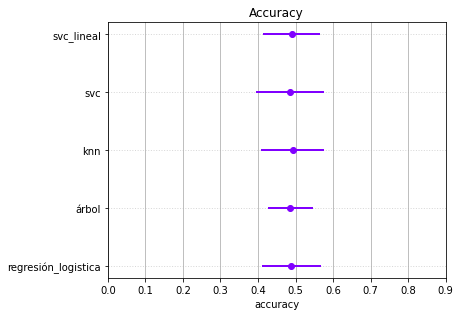

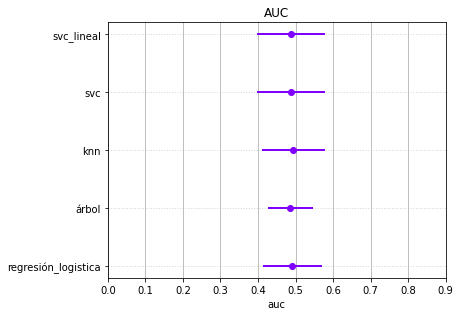

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)


In [ ]:
model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler

In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.489756  0.396190  0.434972  0.492095   0.495960
árbol                0.496585  0.514286  0.486616  0.496143   0.521774
Knn                  0.500488  0.449524  0.469590  0.501762   0.513242
SVC                  0.491707  0.417143  0.431903  0.493571   0.514647
SVC-lineal           0.487805  0.335238  0.390370  0.493571   0.502835

# ***FEATURE SELECTION***

In [ ]:
# Creamos x (input) e y (output)
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y = data["BCaseControlStatus"]

X.shape, Y.shape

((201, 13), (201,))

In [ ]:
X

MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  \
0                       7.0        5.0         3.0       2.0       1.0   
1                      18.0        4.0         2.0       1.0       1.0   
2                       7.0        5.0         3.0       2.0       1.0   
3                      24.0        4.0         3.0       1.0       1.0   
4                       0.0        2.0         2.0       1.0       0.0   
..                      ...        ...         ...       ...       ...   
196                     0.0        2.0         2.0       2.0       0.0   
197                     0.0        3.0         2.0       2.0       1.0   
198                     0.0        4.0         3.0       2.0       1.0   
199                     0.0        5.0         3.0       2.0       1.0   
200                     0.0        5.0         3.0       2.0       1.0   

     MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  \
0         3.0        2.0        0.0      2.0         2.0         6.0   
1         3.0        1.0        1.0      2.0         1.0         4.0   
2         3.0        1.0        1.0      2.0         3.0         6.0   
3         2.0        0.0        0.0      1.0         2.0         5.0   
4         0.0        1.0        0.0      0.0         0.0         6.0   
..        ...        ...        ...      ...         ...         ...   
196       3.0        1.0        0.0      2.0         3.0         6.0   
197       2.0        1.0        1.0      0.0         4.0         6.0   
198       3.0        1.0        1.0      2.0         2.0         6.0   
199       3.0        2.0        1.0      2.0         3.0         6.0   
200       2.0        2.0        0.0      2.0         4.0         6.0   

     MoCATotal  MoCAPtEff  
0         26.0        1.0  
1         21.0        1.0  
2         27.0        1.0  
3         20.0        1.0  
4         13.0        1.0  
..         ...        ...  
196       22.0        1.0  
197       23.0        1.0  
198       25.0        1.0  
199       28.0        1.0  
200       27.0        1.0  

[201 rows x 13 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y,test_size=0.2, random_state=3)

A continuación, imputaremos los valores NaN de las variables categóricas calculando la moda  del conjunto de 
train y aplicacándolos tanto al conjunto de train como al conjunto de test:

In [ ]:
X_train.isna().sum()

MoCACompDaysFromEnroll    0
MoCAVisEx                 0
MoCANaming                0
MoCAAtt1                  0
MoCAAtt2                  0
MoCAAtt3                  0
MoCALang1                 0
MoCALang2                 0
MoCAAbs                   0
MoCADelRec                0
MoCAOrient                0
MoCATotal                 0
MoCAPtEff                 0
dtype: int64

In [ ]:

X_train = X_train.to_numpy()
X_test= X_test.to_numpy()

X_train_numerical=X_train[:,[0,1,2,3,5,6,8,9,10,11]]
X_train_categorical=X_train[:,[4,7,12]]
X_test_numerical=X_test[:,[0,1,2,3,5,6,8,9,10,11]]
X_test_categorical=X_test[:,[4,7,12]]

In [ ]:
#CON MIN-MAX

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical)
X_scaler_train_numerical = scaler.transform(X_train_numerical) 
X_scaler_test_numerical=scaler.transform(X_test_numerical)

In [ ]:
X_train_scaler_all=np.c_[X_scaler_train_numerical,X_train_categorical]
X_test_scaler_all=np.c_[X_scaler_test_numerical,X_test_categorical]


In [ ]:
X_train_scaler_all.shape

(160, 13)

# ***Métodos *embedded****

Ranking de Características:
1. Característica 9 (0.205955)
2. Característica 7 (0.152498)
3. Característica 0 (0.107625)
4. Característica 1 (0.097047)
5. Característica 4 (0.090106)
6. Característica 5 (0.080265)
7. Característica 6 (0.068357)
8. Característica 3 (0.060998)
9. Característica 11 (0.058880)
10. Característica 2 (0.033348)
11. Característica 8 (0.020668)
12. Característica 10 (0.015991)
13. Característica 12 (0.008264)


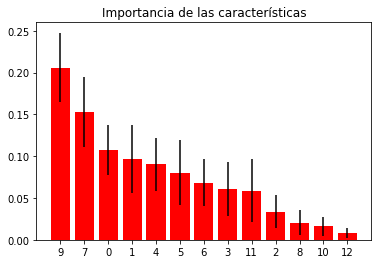

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- MOCADELREC
- MOCALANG2
- MoCACompDaysFromEnroll	
- MoCAVisEx
- MoCAAtt2

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[9,7,0,1,4]]
X_test_ec = X_test_scaler_all[:,[9,7,0,1,4]]


In [ ]:
X_train.isna().sum()

AttributeError: ignored

A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.5365853658536586
[[12  8]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5365853658536586 0.5555555555555556 0.5128205128205129


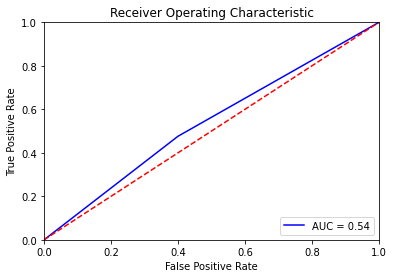

{'max_depth': 9}


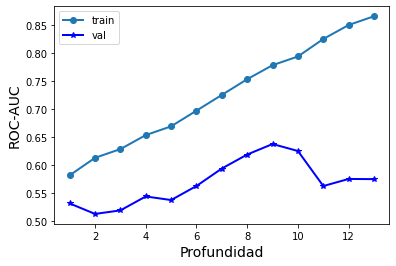

Mejor ROC-AUC en validación cruzada: 0.637
Mejor valor del hiperparámetro: {'max_depth': 9}
0.5365853658536586
[[12  8]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5365853658536586 0.5555555555555556 0.5128205128205129


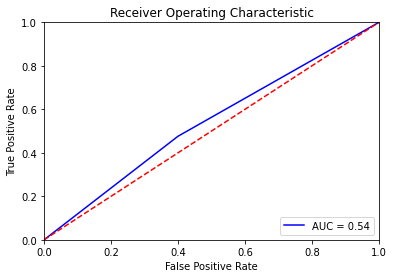

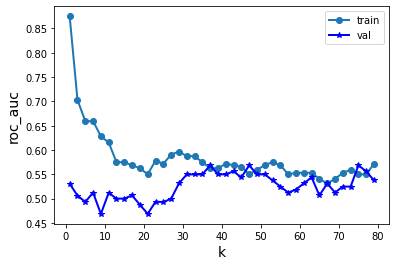

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.568
Valor correspondiente para el hiperparámetro: {'n_neighbors': 37}
0.5365853658536586
[[12  8]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5365853658536586 0.5555555555555556 0.5128205128205129


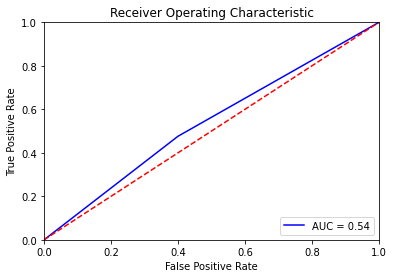

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.6097560975609756
[[ 9 11]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.6097560975609756 0.5925925925925926 0.6666666666666666


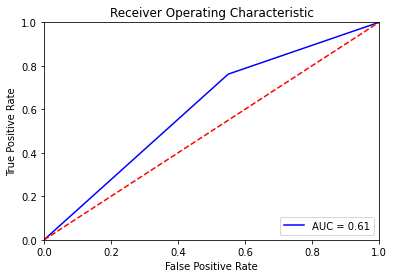

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.5365853658536586
[[12  8]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5365853658536586 0.5555555555555556 0.5128205128205129


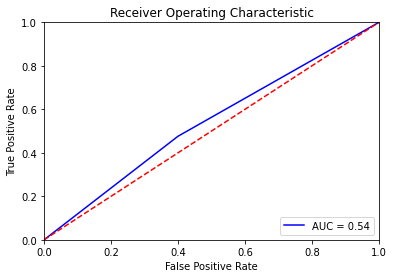

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.536585  0.476190  0.512821  0.538095   0.555556
árbol                0.536585  0.476190  0.512821  0.538095   0.555556
Knn                  0.536585  0.476190  0.512821  0.538095   0.555556
SVC                  0.609756  0.761905  0.666667  0.605952   0.592593
SVC-lineal           0.536585  0.476190  0.512821  0.605952   0.555556

# ***Método filter***

A continuación, a partir de validación cruzada con 3 folds, obtenemos el fold1, fold2 y fold3:

In [ ]:
# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
# # array = data.values
X_train_scaler_all=np.array(X_train_scaler_all)
X_test_scaler_all=np.array(X_test_scaler_all)
Y_train=(np.array(Y_train))
Y_test=np.array(Y_test)
# # Separamos en variables de entrada al modelo (8 primeras) y de salida (1 variable) 
# X = array[:,1:59]
# Y = array[:,0]

names=[]
for i in range(19):
  names.append(str(i))
# names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11','f12','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13']
# names = data.columns[1:]
names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18']

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  # In this case, k=3, 

for train, val in kf.split(X_train_scaler_all):
  # print("%s %s" % (train, val))
  # print(len(val))
  # print(val)
  if (len(val)==53) and (val[0]==107):
    fold3=list(val)
    print(len(fold3))
    print(fold3)
  if (len(val)==54):
    fold1=list(val)
    print(len(fold1))
    print(fold1)
  if (len(val)==53) and (val[0]==54):
    fold2=list(val)
    print(len(fold2))
    print(fold2)

54
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
53
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]
53
[107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


# ***COMBINACIÓN PRIMERA***


En esta primera combinación utilizaremos fold1 y fold2 para entrenar, y fold3 para validar:

In [ ]:
X_entrenamiento=np.concatenate((X_train_scaler_all[fold1], X_train_scaler_all[fold2]))
Y_entrenamiento=np.concatenate((Y_train[fold1], Y_train[fold2]))
X_val=X_train_scaler_all[fold3]
Y_val=Y_train[fold3]

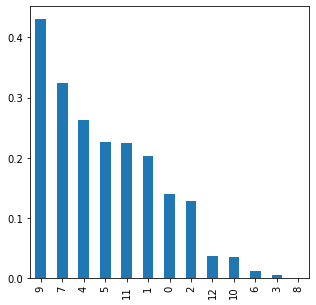

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=chi2, k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_entrenamiento, Y_entrenamiento)
fit_Chi2 = pd.Series(fit_Chi2.scores_)
fit_Chi2.sort_values(ascending=False)

fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

# ***COMBINACIÓN 2***

En esta combinación usaremos fold1 y fold3 para entrenar y usaremos fold 2 para validar:

In [ ]:
X_entrenamiento2=np.concatenate((X_train_scaler_all[fold1], X_train_scaler_all[fold3]))
Y_entrenamiento2=np.concatenate((Y_train[fold1], Y_train[fold3]))
X_val2=X_train_scaler_all[fold2]
Y_val2=Y_train[fold2]

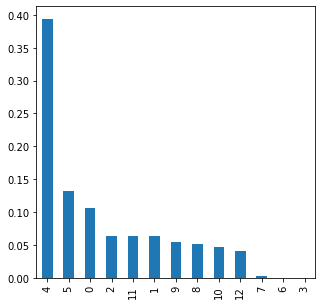

In [ ]:
bestfeatures_Chi2_2 = SelectKBest(score_func=chi2, k='all')
fit_Chi2_2 = bestfeatures_Chi2_2.fit(X_entrenamiento2, Y_entrenamiento2)
fit_Chi2_2 = pd.Series(fit_Chi2_2.scores_)
fit_Chi2_2.sort_values(ascending=False)

fit_Chi2_2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_2.scores_.sort_values})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0,figsize=(50,8))
# plt.title("Estadístico chi cuadrado considerando subconjunto X train")

# ***COMBINACIÓN 3***

En este último caso, utilizaremos el fold 2 y fold3 para entrenar y el fold 1 para validar:

In [ ]:
X_entrenamiento3=np.concatenate((X_train_scaler_all[fold2], X_train_scaler_all[fold3]))
Y_entrenamiento3=np.concatenate((Y_train[fold2], Y_train[fold3]))
X_val3=X_train_scaler_all[fold1]
Y_val3=Y_train[fold1]

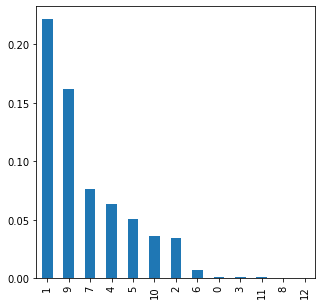

In [ ]:
bestfeatures_Chi2_3 = SelectKBest(score_func=chi2, k='all')
fit_Chi2_3 = bestfeatures_Chi2_3.fit(X_entrenamiento3, Y_entrenamiento3)
fit_Chi2_3 = pd.Series(fit_Chi2_3.scores_)
fit_Chi2_3.sort_values(ascending=False)

fit_Chi2_3.sort_values(ascending=False).plot.bar(figsize=(5, 5))
# gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_3.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
# plt.title("Estadístico chi cuadrado considerando subconjunto X train")

In [ ]:
X

MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  \
0                       7.0        5.0         3.0       2.0       1.0   
1                      18.0        4.0         2.0       1.0       1.0   
2                       7.0        5.0         3.0       2.0       1.0   
3                      24.0        4.0         3.0       1.0       1.0   
4                       0.0        2.0         2.0       1.0       0.0   
..                      ...        ...         ...       ...       ...   
196                     0.0        2.0         2.0       2.0       0.0   
197                     0.0        3.0         2.0       2.0       1.0   
198                     0.0        4.0         3.0       2.0       1.0   
199                     0.0        5.0         3.0       2.0       1.0   
200                     0.0        5.0         3.0       2.0       1.0   

     MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  \
0         3.0        2.0        0.0      2.0         2.0         6.0   
1         3.0        1.0        1.0      2.0         1.0         4.0   
2         3.0        1.0        1.0      2.0         3.0         6.0   
3         2.0        0.0        0.0      1.0         2.0         5.0   
4         0.0        1.0        0.0      0.0         0.0         6.0   
..        ...        ...        ...      ...         ...         ...   
196       3.0        1.0        0.0      2.0         3.0         6.0   
197       2.0        1.0        1.0      0.0         4.0         6.0   
198       3.0        1.0        1.0      2.0         2.0         6.0   
199       3.0        2.0        1.0      2.0         3.0         6.0   
200       2.0        2.0        0.0      2.0         4.0         6.0   

     MoCATotal  MoCAPtEff  
0         26.0        1.0  
1         21.0        1.0  
2         27.0        1.0  
3         20.0        1.0  
4         13.0        1.0  
..         ...        ...  
196       22.0        1.0  
197       23.0        1.0  
198       25.0        1.0  
199       28.0        1.0  
200       27.0        1.0  

[201 rows x 13 columns]

* MoCADelRec
* MoCAAtt2
* MoCAVisEx

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[9,4,1]]
X_test_ec = X_test_scaler_all[:,[9,4,1]]


A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.5609756097560976
[[12  8]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5609756097560976 0.5789473684210527 0.5500000000000002


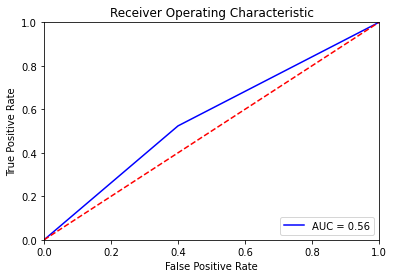

{'max_depth': 11}


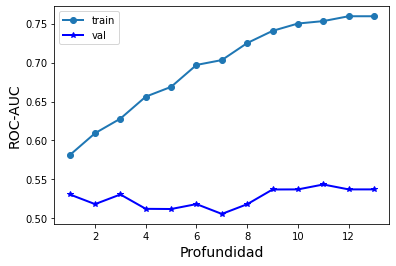

Mejor ROC-AUC en validación cruzada: 0.544
Mejor valor del hiperparámetro: {'max_depth': 11}
0.6097560975609756
[[13  7]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.6097560975609756 0.631578947368421 0.6


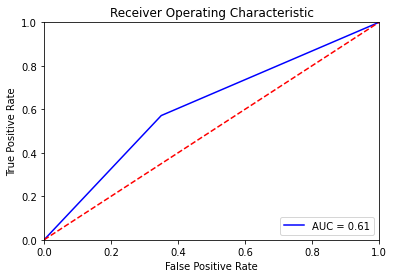

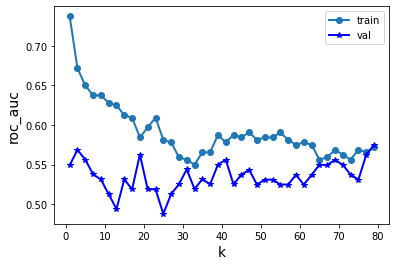

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
Valor correspondiente para el hiperparámetro: {'n_neighbors': 79}
0.6097560975609756
[[13  7]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.6097560975609756 0.631578947368421 0.6


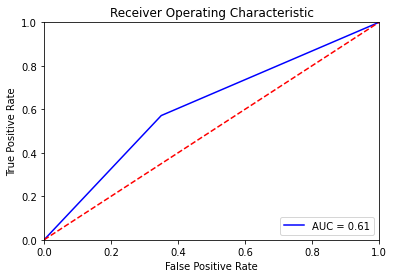

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.6097560975609756
[[12  8]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.6097560975609756 0.6190476190476191 0.6190476190476191


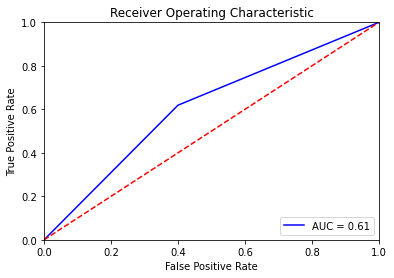

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.6097560975609756
[[15  5]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.6097560975609756 0.6666666666666666 0.5555555555555556


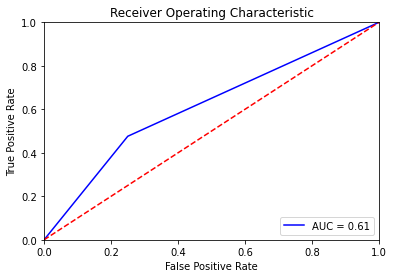

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.560976  0.523810  0.550000  0.561905   0.578947
árbol                0.609756  0.571429  0.600000  0.610714   0.631579
Knn                  0.609756  0.571429  0.600000  0.610714   0.631579
SVC                  0.609756  0.619048  0.619048  0.609524   0.619048
SVC-lineal           0.609756  0.476190  0.555556  0.609524   0.666667

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('MoCACompDaysFromEnroll', 0.09383411945133426)
('MoCAVisEx', 0.10007829663512757)
('MoCANaming', 0.033847987172372376)
('MoCAAtt1', 0.05626925964267433)
('MoCAAtt2', 0.09356973403722203)
('MoCAAtt3', 0.07918703501028343)
('MoCALang1', 0.06414946420260172)
('MoCALang2', 0.15174459835326143)
('MoCAAbs', 0.018646326731848427)
('MoCADelRec', 0.2345837895927166)
('MoCAOrient', 0.016086205068230254)
('MoCATotal', 0.054141261075365266)
('MoCAPtEff', 0.0038619230269622998)
Ranking de Características:
1. Característica 9 (0.234584)
2. Característica 7 (0.151745)
3. Característica 1 (0.100078)
4. Característica 0 (0.093834)
5. Característica 4 (0.093570)
6. Característica 5 (0.079187)
7. Característica 6 (0.064149)
8. Característica 3 (0.056269)
9. Característica 11 (0.054141)
10. Característica 2 (0.033848)
11. Característica 8 (0.018646)
12. Característica 10 (0.016086)
13. Característica 12 (0.003862)


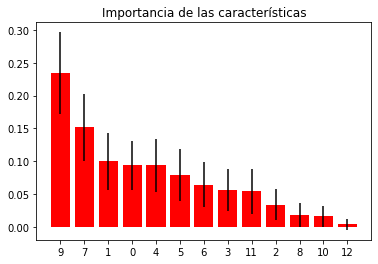

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all, Y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all.shape[1]])
plt.show()


In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train_scaler_all, Y_train)

In [ ]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

HighBGLevTakeAction
PtCurrA1cGoal


In [ ]:
X

MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  MoCAAtt1  MoCAAtt2  \
0                       7.0        5.0         3.0       2.0       1.0   
1                      18.0        4.0         2.0       1.0       1.0   
2                       7.0        5.0         3.0       2.0       1.0   
3                      24.0        4.0         3.0       1.0       1.0   
4                       0.0        2.0         2.0       1.0       0.0   
..                      ...        ...         ...       ...       ...   
196                     0.0        2.0         2.0       2.0       0.0   
197                     0.0        3.0         2.0       2.0       1.0   
198                     0.0        4.0         3.0       2.0       1.0   
199                     0.0        5.0         3.0       2.0       1.0   
200                     0.0        5.0         3.0       2.0       1.0   

     MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  \
0         3.0        2.0        0.0      2.0         2.0         6.0   
1         3.0        1.0        1.0      2.0         1.0         4.0   
2         3.0        1.0        1.0      2.0         3.0         6.0   
3         2.0        0.0        0.0      1.0         2.0         5.0   
4         0.0        1.0        0.0      0.0         0.0         6.0   
..        ...        ...        ...      ...         ...         ...   
196       3.0        1.0        0.0      2.0         3.0         6.0   
197       2.0        1.0        1.0      0.0         4.0         6.0   
198       3.0        1.0        1.0      2.0         2.0         6.0   
199       3.0        2.0        1.0      2.0         3.0         6.0   
200       2.0        2.0        0.0      2.0         4.0         6.0   

     MoCATotal  MoCAPtEff  
0         26.0        1.0  
1         21.0        1.0  
2         27.0        1.0  
3         20.0        1.0  
4         13.0        1.0  
..         ...        ...  
196       22.0        1.0  
197       23.0        1.0  
198       25.0        1.0  
199       28.0        1.0  
200       27.0        1.0  

[201 rows x 13 columns]



* MoCADelRec
* MoCALang2






* MoCADelRec
* MoCALang2
* MoCAVixEX


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[9,7]]
X_test_ec = X_test_scaler_all[:,[9,7]]


A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5365853658536586 0.5625 0.4864864864864864


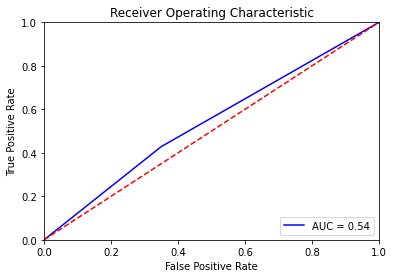

{'max_depth': 6}


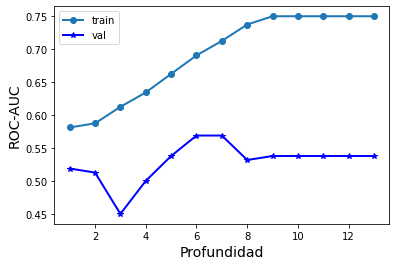

Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 6}
0.5121951219512195
[[ 9 11]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.5121951219512195 0.5217391304347826 0.5454545454545454


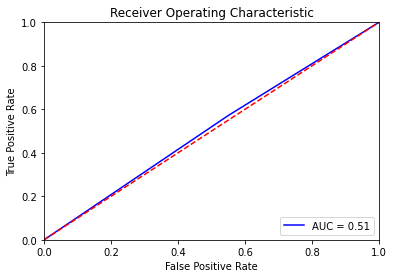

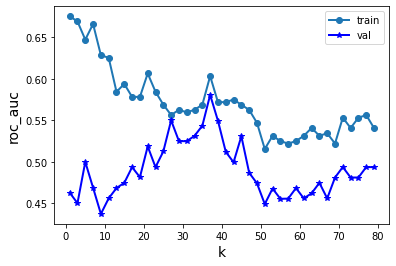

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.580
Valor correspondiente para el hiperparámetro: {'n_neighbors': 37}
0.4878048780487805
[[10 10]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.4878048780487805 0.5 0.4878048780487805


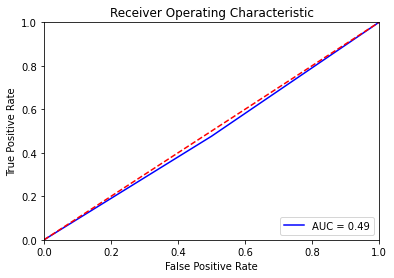

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.6341463414634146
[[ 8 12]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6341463414634146 0.6 0.7058823529411764


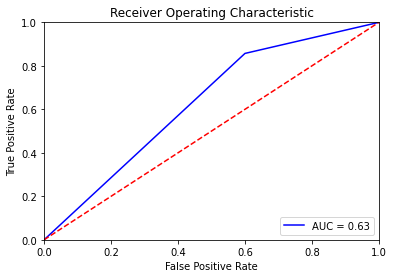

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5365853658536586 0.5625 0.4864864864864864


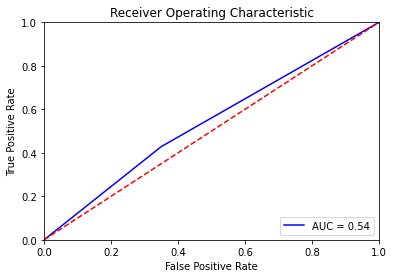

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.536585  0.428571  0.486486  0.539286   0.562500
árbol                0.512195  0.571429  0.545455  0.510714   0.521739
Knn                  0.487805  0.476190  0.487805  0.488095   0.500000
SVC                  0.634146  0.857143  0.705882  0.628571   0.600000
SVC-lineal           0.536585  0.428571  0.486486  0.628571   0.562500

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[9,7,1]]
X_test_ec = X_test_scaler_all[:,[9,7,1]]


A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5609756097560976
[[12  8]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5609756097560976 0.5789473684210527 0.5500000000000002


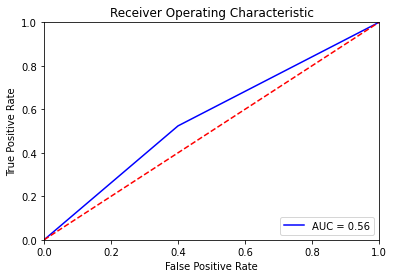

{'max_depth': 6}


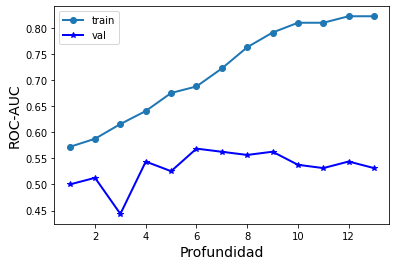

Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 6}
0.5365853658536586
[[12  8]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5365853658536586 0.5555555555555556 0.5128205128205129


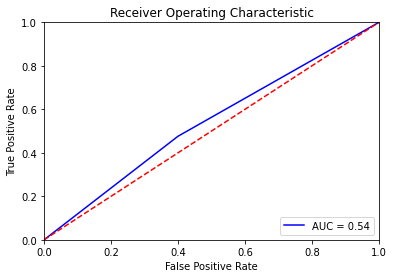

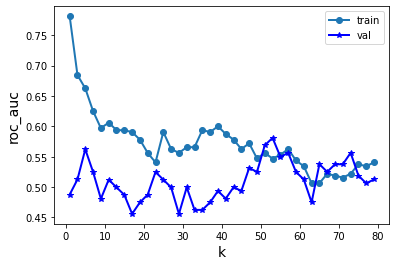

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
Valor correspondiente para el hiperparámetro: {'n_neighbors': 53}
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5121951219512195 0.5263157894736842 0.5


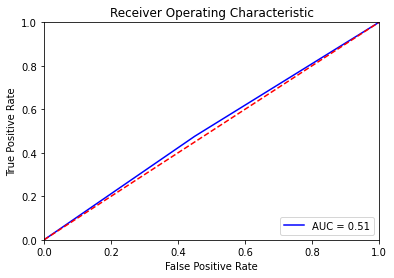

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.5853658536585366
[[ 9 11]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.5853658536585366 0.5769230769230769 0.6382978723404256


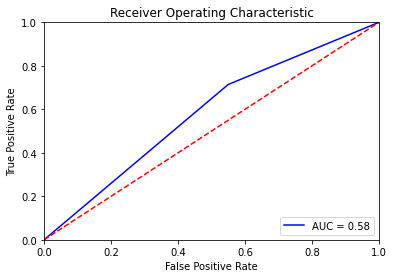

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5121951219512195
[[13  7]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.5121951219512195 0.5333333333333333 0.4444444444444444


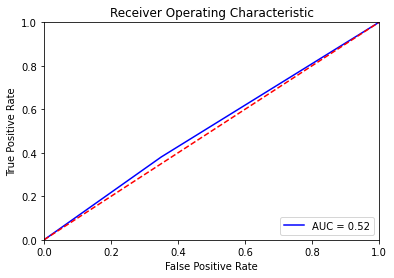

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.560976  0.523810  0.550000  0.561905   0.578947
árbol                0.536585  0.476190  0.512821  0.538095   0.555556
Knn                  0.512195  0.476190  0.500000  0.513095   0.526316
SVC                  0.585366  0.714286  0.638298  0.582143   0.576923
SVC-lineal           0.512195  0.380952  0.444444  0.582143   0.533333

# ***División en train y test***

# ***CLASIFICACIÓN***

# ***REGRESIÓN LOGÍSTICA CON REGULARIZACIÓN***

In [ ]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 14), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape)

(160, 14) (41, 14)


In [ ]:
X_train.isna().sum()

MoCANotDone               0
MoCACompDaysFromEnroll    1
MoCAVisEx                 1
MoCANaming                1
MoCAAtt1                  1
MoCAAtt2                  1
MoCAAtt3                  1
MoCALang1                 1
MoCALang2                 1
MoCAAbs                   1
MoCADelRec                1
MoCAOrient                1
MoCATotal                 1
MoCAPtEff                 4
dtype: int64

In [ ]:
X_test.isna().sum()

MoCANotDone               0
MoCACompDaysFromEnroll    0
MoCAVisEx                 0
MoCANaming                0
MoCAAtt1                  0
MoCAAtt2                  0
MoCAAtt3                  0
MoCALang1                 0
MoCALang2                 0
MoCAAbs                   0
MoCADelRec                0
MoCAOrient                0
MoCATotal                 0
MoCAPtEff                 1
dtype: int64

In [ ]:
X_train.dtypes

MoCANotDone               float64
MoCACompDaysFromEnroll    float64
MoCAVisEx                 float64
MoCANaming                float64
MoCAAtt1                  float64
MoCAAtt2                  float64
MoCAAtt3                  float64
MoCALang1                 float64
MoCALang2                 float64
MoCAAbs                   float64
MoCADelRec                float64
MoCAOrient                float64
MoCATotal                 float64
MoCAPtEff                 float64
dtype: object

>1 0.495 (0.134)
>3 0.510 (0.139)
>5 0.514 (0.144)
>7 0.506 (0.144)
>9 0.505 (0.121)
>15 0.497 (0.144)
>18 0.511 (0.138)
>21 0.512 (0.145)


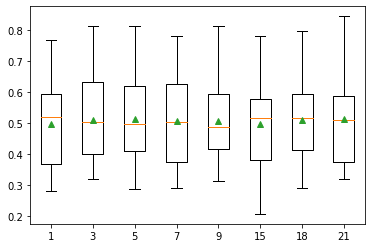

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(pipeline, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train)

# transform the dataset
X_train = imputer.transform(X_train)

# print total missing
print('Missing: %d' % sum(isnan(X_train).flatten()))


Missing: 0


In [ ]:
X_test=imputer.transform(X_test)


In [ ]:
print('Missing: %d' % sum(isnan(X_test).flatten()))


Missing: 0


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


std_all2 = preprocessing.StandardScaler().fit(X_train)
X_std_train2 = std_all2.transform(X_train) #Tendriamos todas las características estandarizadas
X_std_test2 = std_all2.transform(X_test)

# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_std_train2, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))






Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.592


A continuación, ya construimos nuestro modelo con los parámetros obtenidos a partir de validación cruzada y es con un valor de alpha de 0.0001 y un modelo ridge. Así obtenemos los resultados obtenidos en el conjunto de test:

In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_std_train2, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_std_test2)




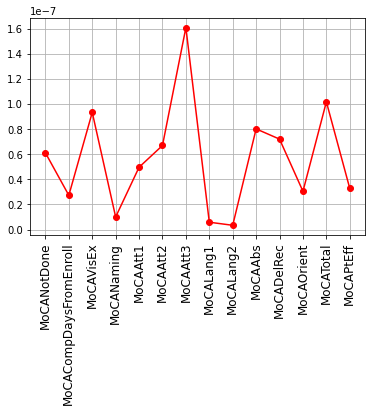

In [ ]:
import matplotlib.pyplot as plt  
plt.plot( np.arange(modelo_rid_log.coef_.shape[1]), abs(modelo_rid_log.coef_[0]), color='r', marker="o")
plt.xticks(np.arange(modelo_rid_log.coef_.shape[1]), X.columns, rotation=90,  fontsize=12)  # Set text labels and properties.
plt.grid()

A continuación, vamos a calcular diferentes figuras de mérito para ver que resultados obtenemos en test. Comenzamos con la matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[11 12]
 [ 9  9]]
tn: 11, fp:12, fn:9, tp:9
Accuracy: 0.4878048780487805
                  precision    recall  f1-score   support

Paciente control       0.55      0.48      0.51        23
   Paciente caso       0.43      0.50      0.46        18

        accuracy                           0.49        41
       macro avg       0.49      0.49      0.49        41
    weighted avg       0.50      0.49      0.49        41

Sensibilidad: 0.5


Calculamos la ROC y la AUC:

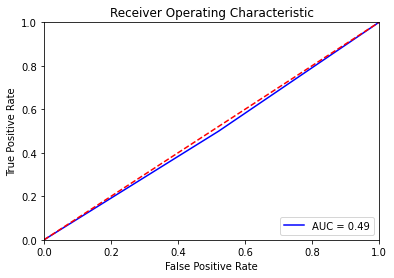

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy=[]
res_recall=[]
res_f1=[]
res_roc=[]

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[11 12]
 [ 9  9]]
El valor de f1_score obtenido: 0.4615384615384615
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,41,2)}
  k_grid = np.array(range(1,41,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_std_train2, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

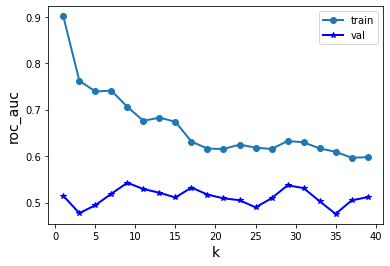

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.543
Valor correspondiente para el hiperparámetro: {'n_neighbors': 9}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 9)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_std_train2, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_std_test2)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
MSE1_score = mean_squared_error(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)
# print("El error cuadrático medio", MSE1_score) 

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 7 16]
 [ 7 11]]
El valor de f1_score obtenido: 0.4888888888888889
El valor de recall es 0.6111111111111112


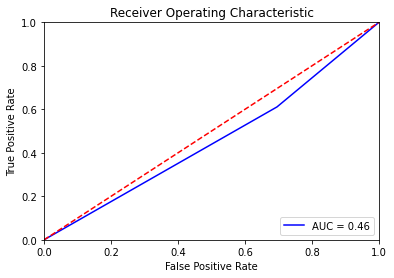

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 7 16]
 [ 7 11]]
El valor de f1_score obtenido: 0.4888888888888889
El valor de recall es 0.6111111111111112


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

Para los árboles no hace falta la normalización

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,15)}
  profundidad_grid = np.array(range(1,15))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 3}


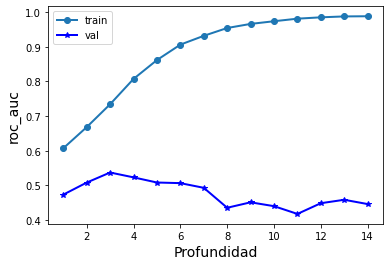

Mejor valor de la figura de mérito en validación cruzada: 0.537
Mejor valor del hiperparámetro: {'max_depth': 3}


In [ ]:
arbol('roc_auc')

{'max_depth': 3}


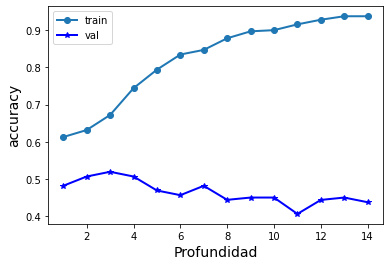

Mejor valor de la figura de mérito en validación cruzada: 0.519
Mejor valor del hiperparámetro: {'max_depth': 3}


In [ ]:
arbol('accuracy')

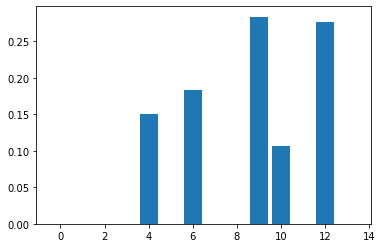

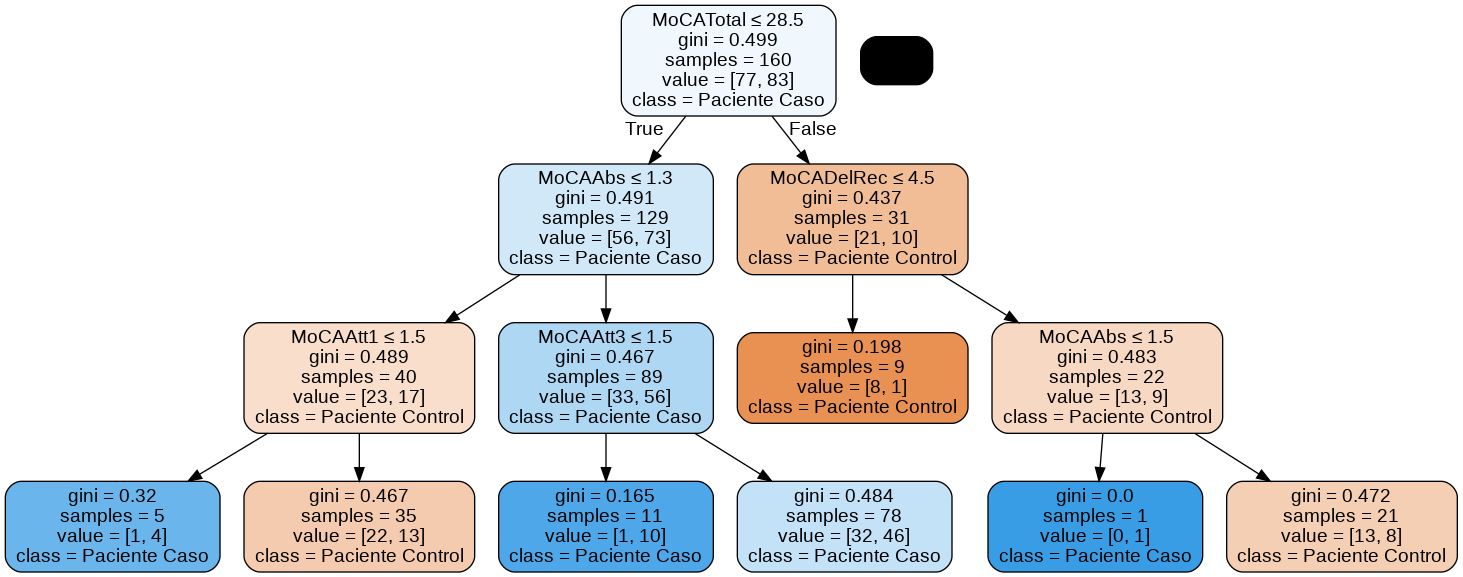

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=3)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[1:],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:

A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 5 18]
 [ 6 12]]
El valor de f1_score obtenido: 0.5
El valor de recall es 0.6666666666666666


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
from sklearn.svm import SVC


In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_std_train2, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594


In [ ]:


svc=SVC(C=1000,kernel='rbf',gamma=0.001,decision_function_shape='ovo')
svc.fit(X_std_train2,Y_train)
y_test_pred=svc.predict(X_std_test2)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[10 13]
 [10  8]]
El valor de f1_score obtenido: 0.41025641025641024
El valor de recall es 0.4444444444444444


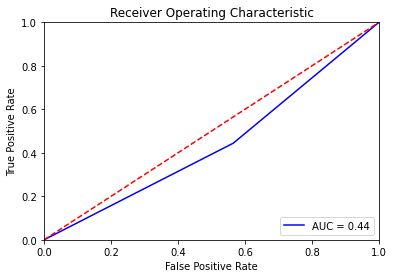

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística", "Knn","Árbol","SVC"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                    
Regresión logística  0.487805  0.500000  0.461538  0.489130
Knn                  0.439024  0.611111  0.488889  0.457729
Árbol                0.414634  0.666667  0.500000  0.442029
SVC                  0.439024  0.444444  0.410256  0.439614

# **MÉTODO ENSEMBLE** (En este caso no lo he añadido)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(figura):
  # 1. Extracción de las dos características de interés para realizar el diseño

  param_grid = {'n_estimators': [10, 20, 30, 40, 50, 100]}
  arboles_grid=[10, 20, 30, 40, 50, 100]

  CV_rfc = GridSearchCV(RandomForestClassifier(max_features= 'sqrt'), param_grid=param_grid, cv= 5, n_jobs=-1, scoring=figura, return_train_score=True)
  CV_rfc.fit(X_std_train2, Y_train)
  print(CV_rfc.best_params_)

  perf_train_rfc = np.array(CV_rfc.cv_results_['mean_train_score'])
  perf_val_rfc = np.array(CV_rfc.cv_results_['mean_test_score'])

  plt.plot(arboles_grid,perf_train_rfc,'-o',label="train", linewidth=2)
  plt.plot(arboles_grid,perf_val_rfc,'-*b',label="val", linewidth=2)
  plt.xlabel('Arboles',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()


  print("Mejor MSE en validación cruzada: {:.3f}".format(CV_rfc.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(CV_rfc.best_params_))


{'n_estimators': 100}


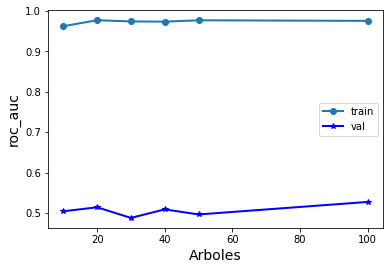

Mejor MSE en validación cruzada: 0.527
Mejor valor del hiperparámetro: {'n_estimators': 100}


In [ ]:
RandomForest('roc_auc')

{'n_estimators': 10}


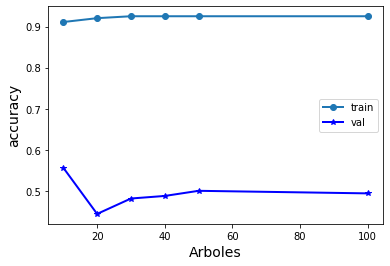

Mejor MSE en validación cruzada: 0.556
Mejor valor del hiperparámetro: {'n_estimators': 10}


In [ ]:
RandomForest('accuracy')

In [ ]:
RF_clasif_all = RandomForestClassifier(n_estimators=100)
modelo_RF_clasif2 = RF_clasif_all.fit(X_std_train2, Y_train) 
y_output_RF = modelo_RF_clasif2.predict(X_std_test2)
print(accuracy_score(Y_test, y_output_RF))
print(confusion_matrix(Y_test, y_output_RF))
print(f1_score(Y_test, y_output_RF))
print(recall_score(Y_test, y_output_RF))

# A_results.append(accuracy_score(Y_test2, y_output_RF))
# f1_results.append(f1_score(Y_test2, y_output_RF))
# S_results.append(recall_score(Y_test2, y_output_RF))
# MSE_results.append(mean_squared_error(Y_test2, y_output_RF))

0.5121951219512195
[[ 8 15]
 [ 5 13]]
0.5652173913043479
0.7222222222222222


A la vista de los coeficientes obtenidos, vamos a eliminar ciertas variables, ya que no están teniendo referencia a la hora de clasificar para ver si así nuestro modelo mejora como son las variables MoCANaming, MoCALang1, MoCALang2

In [ ]:
X = data['MoCAAtt3']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201,), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape)

(160,) (41,)


In [ ]:
X_train.isna().sum()

1

In [ ]:
X_test.isna().sum()

0

In [ ]:
X_train.dtypes

MoCANotDone               float64
MoCACompDaysFromEnroll    float64
MoCAVisEx                 float64
MoCAAtt1                  float64
MoCAAtt2                  float64
MoCAAtt3                  float64
MoCAAbs                   float64
MoCADelRec                float64
MoCAOrient                float64
MoCATotal                 float64
MoCAPtEff                 float64
dtype: object

>1 0.524 (0.161)
>3 0.531 (0.158)
>5 0.540 (0.138)
>7 0.540 (0.157)
>9 0.537 (0.147)
>15 0.534 (0.140)
>18 0.520 (0.153)
>21 0.540 (0.147)


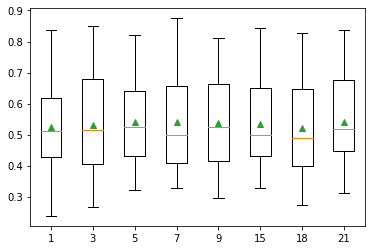

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(pipeline, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train)

# transform the dataset
X_train = imputer.transform(X_train)

# print total missing
print('Missing: %d' % sum(isnan(X_train).flatten()))


ValueError: ignored

In [ ]:
X_test=imputer.transform(X_test)


In [ ]:
print('Missing: %d' % sum(isnan(X_test).flatten()))


Missing: 0


In [ ]:
for i in X_std_train2:
  print(i)

[-0.07930516 -0.31942825 -0.23704669  0.33576421  0.3378349   0.21389632
 -2.30669937 -0.89421338 -1.28761152 -1.12853276 -2.19426565 -3.20716816
 -2.63337476  0.1382327 ]
[-0.07930516 -0.31942825 -0.23704669  0.33576421  0.3378349   0.21389632
  0.56049708  0.72142936 -1.28761152  0.54681484 -0.1429288   0.27048406
  0.11151098  0.1382327 ]
[-0.07930516 -0.31942825 -0.23704669  0.33576421  0.3378349   0.21389632
  0.56049708 -0.89421338  0.78176414  0.54681484  1.22462911  0.27048406
  0.79773242  0.1382327 ]
[-0.07930516 -0.31942825  0.82634035  0.33576421  0.3378349   0.21389632
  0.56049708  0.72142936  0.78176414 -1.12853276  1.22462911  0.27048406
  1.14084314  0.1382327 ]
[-0.07930516 -0.31942825 -1.30043373  0.33576421  0.3378349   0.21389632
 -0.87310114  0.72142936  0.78176414 -1.12853276 -0.1429288   0.27048406
 -0.23159973  0.1382327 ]
[-0.07930516 -0.31942825 -0.23704669  0.33576421  0.3378349   0.21389632
  0.56049708  0.72142936  0.78176414 -2.80388035  1.22462911  0.270

In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


std_all2 = preprocessing.StandardScaler().fit(X_train)
X_std_train2 = std_all2.transform(X_train) #Tendriamos todas las características estandarizadas
X_std_test2 = std_all2.transform(X_test)

ValueError: ignored

# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_std_train2, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))






Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.616


A continuación, ya construimos nuestro modelo con los parámetros obtenidos a partir de validación cruzada y es con un valor de alpha de 0.0001 y un modelo ridge. Así obtenemos los resultados obtenidos en el conjunto de test:

In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_std_train2, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_std_test2)




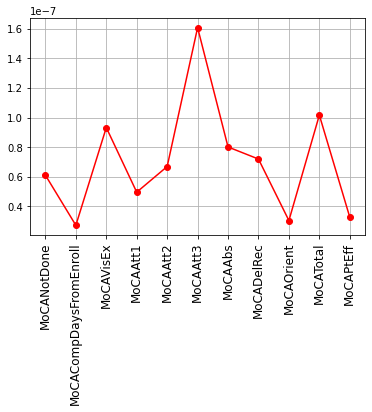

In [ ]:
import matplotlib.pyplot as plt  
plt.plot( np.arange(modelo_rid_log.coef_.shape[1]), abs(modelo_rid_log.coef_[0]), color='r', marker="o")
plt.xticks(np.arange(modelo_rid_log.coef_.shape[1]), X.columns, rotation=90,  fontsize=12)  # Set text labels and properties.
plt.grid()

A continuación, vamos a calcular diferentes figuras de mérito para ver que resultados obtenemos en test. Comenzamos con la matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[10 13]
 [ 9  9]]
tn: 10, fp:13, fn:9, tp:9
Accuracy: 0.4634146341463415
                  precision    recall  f1-score   support

Paciente control       0.53      0.43      0.48        23
   Paciente caso       0.41      0.50      0.45        18

        accuracy                           0.46        41
       macro avg       0.47      0.47      0.46        41
    weighted avg       0.47      0.46      0.46        41

Sensibilidad: 0.5


Calculamos la ROC y la AUC:

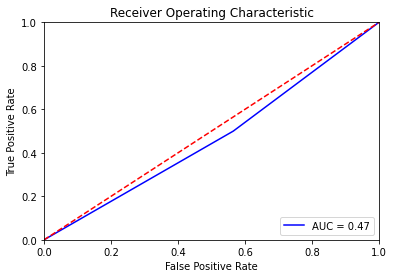

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_std_train2, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

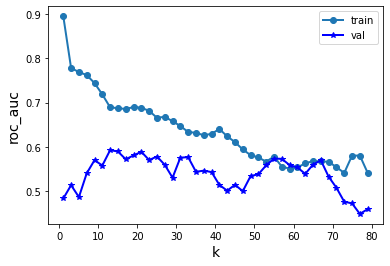

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.593
Valor correspondiente para el hiperparámetro: {'n_neighbors': 13}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 13)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_std_train2, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_std_test2)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
MSE1_score = mean_squared_error(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)
# print("El error cuadrático medio", MSE1_score) 

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 7 16]
 [ 8 10]]
El valor de f1_score obtenido: 0.4545454545454546
El valor de recall es 0.5555555555555556


# ***ÁRBOLES***

Para los árboles no hace falta la normalización

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,12)}
  profundidad_grid = np.array(range(1,12))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 5}


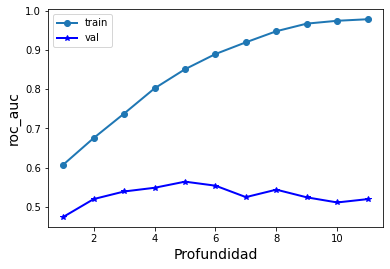

Mejor valor de la figura de mérito en validación cruzada: 0.564
Mejor valor del hiperparámetro: {'max_depth': 5}


In [ ]:
arbol('roc_auc')

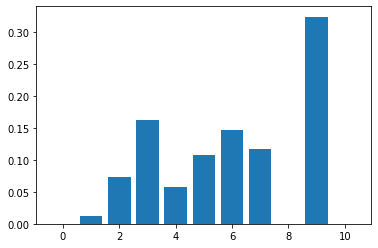

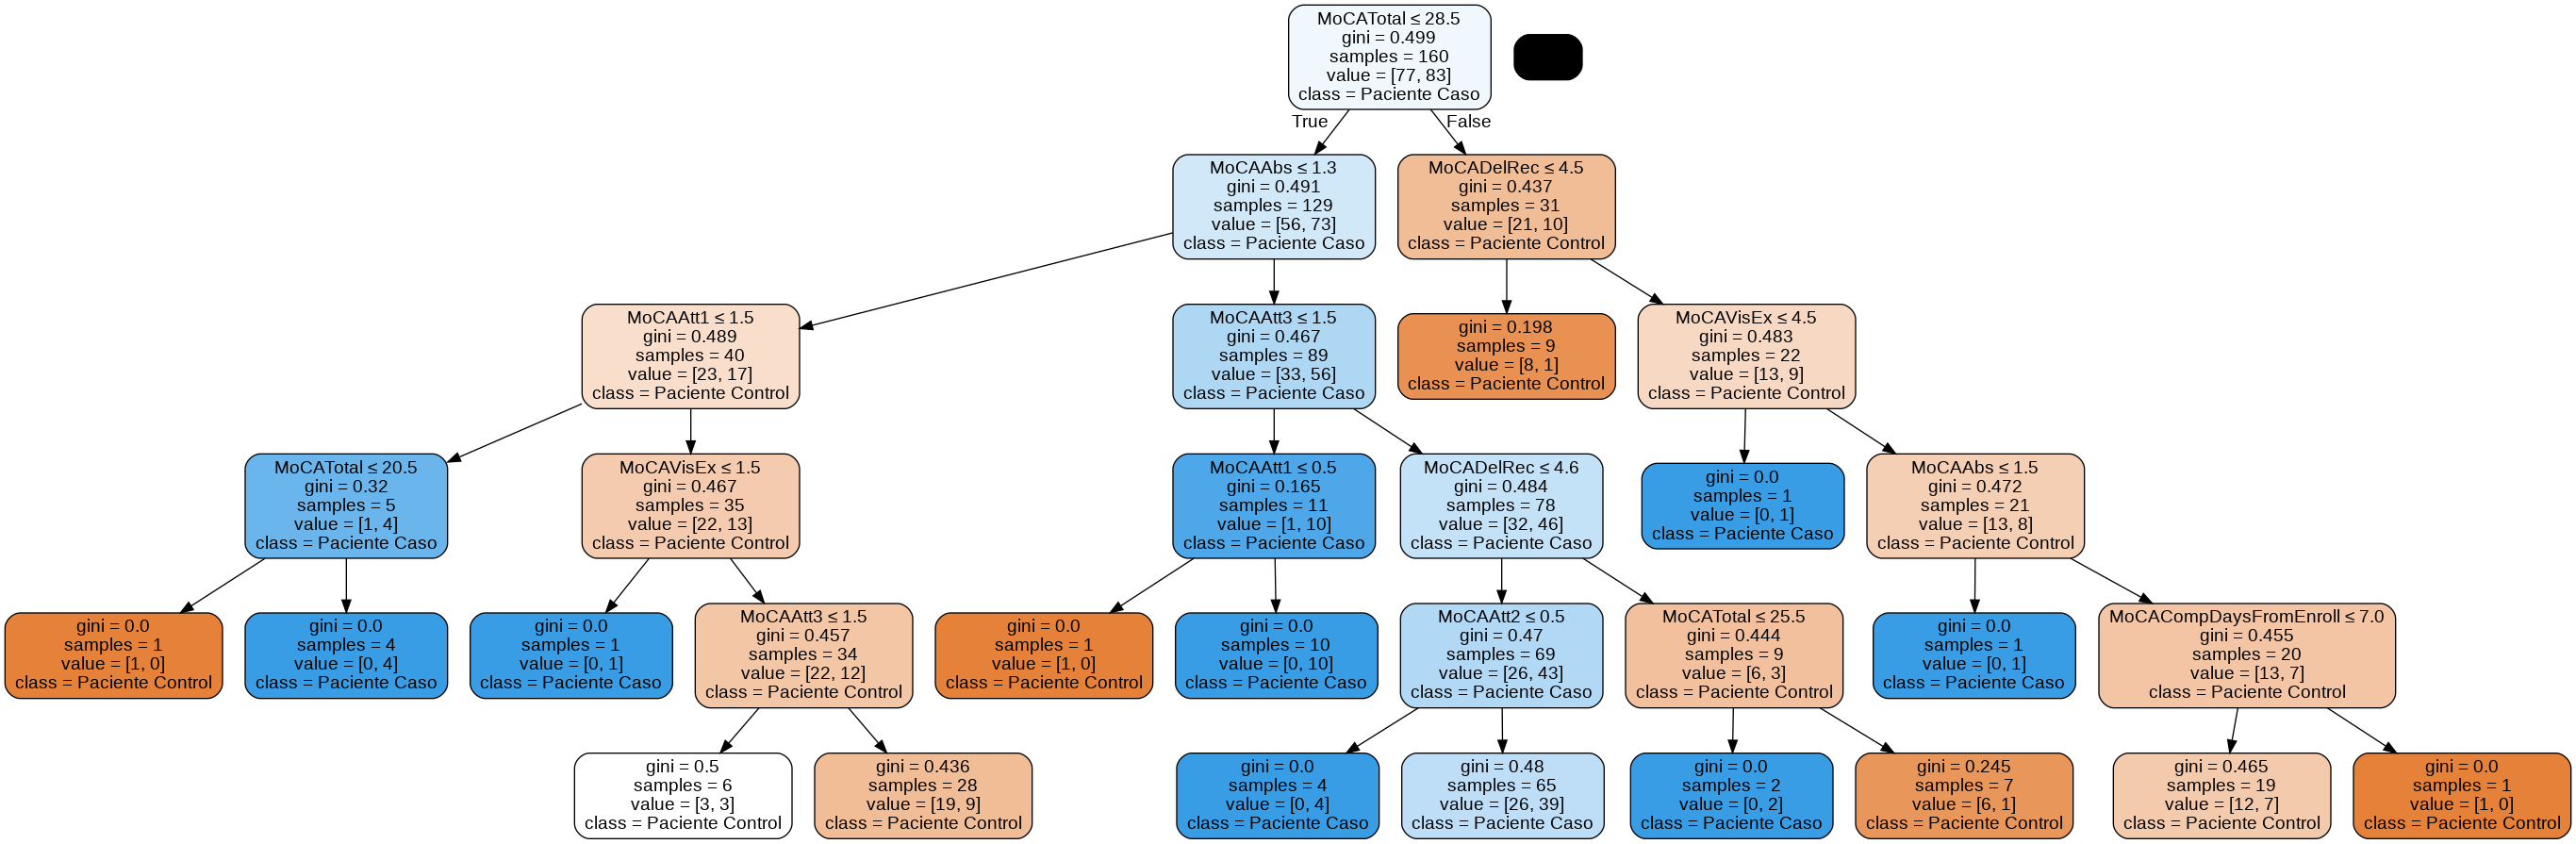

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=5)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de accuracy obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de recall es", recall_score(Y_test, y_output_arbol))
# print("El error cuadrático medio", mean_squared_error(Y_test, y_output_arbol)) 

# A_results.append(accuracy_score(Y_test2, y_output_arbol))
# f1_results.append(f1_score(Y_test2, y_output_arbol))
# S_results.append(recall_score(Y_test2, y_output_arbol))
# MSE_results.append(mean_squared_error(Y_test2, y_output_arbol))

El valor de accuracy obtenido: 0.36585365853658536
La matriz de confusión obtenida: [[ 5 18]
 [ 8 10]]
El valor de f1_score obtenido: 0.43478260869565216
El valor de recall es 0.5555555555555556


# **MÉTODO ENSEMBLE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(figura):
  # 1. Extracción de las dos características de interés para realizar el diseño

  param_grid = {'n_estimators': [10, 20, 30, 40, 50, 100]}
  arboles_grid=[10, 20, 30, 40, 50, 100]

  CV_rfc = GridSearchCV(RandomForestClassifier(max_features= 'sqrt'), param_grid=param_grid, cv= 5, n_jobs=-1, scoring=figura, return_train_score=True)
  CV_rfc.fit(X_std_train2, Y_train)
  print(CV_rfc.best_params_)

  perf_train_rfc = np.array(CV_rfc.cv_results_['mean_train_score'])
  perf_val_rfc = np.array(CV_rfc.cv_results_['mean_test_score'])

  plt.plot(arboles_grid,perf_train_rfc,'-o',label="train", linewidth=2)
  plt.plot(arboles_grid,perf_val_rfc,'-*b',label="val", linewidth=2)
  plt.xlabel('Arboles',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()


  print("Mejor MSE en validación cruzada: {:.3f}".format(CV_rfc.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(CV_rfc.best_params_))


{'n_estimators': 10}


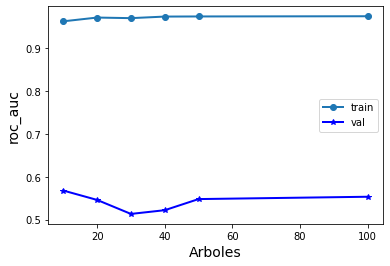

Mejor MSE en validación cruzada: 0.568
Mejor valor del hiperparámetro: {'n_estimators': 10}


In [ ]:
RandomForest('roc_auc')

In [ ]:
RF_clasif_all = RandomForestClassifier(n_estimators=10)
modelo_RF_clasif2 = RF_clasif_all.fit(X_std_train2, Y_train) 
y_output_RF = modelo_RF_clasif2.predict(X_std_test2)
print(accuracy_score(Y_test, y_output_RF))
print(confusion_matrix(Y_test, y_output_RF))
print(f1_score(Y_test, y_output_RF))
print(recall_score(Y_test, y_output_RF))

# A_results.append(accuracy_score(Y_test2, y_output_RF))
# f1_results.append(f1_score(Y_test2, y_output_RF))
# S_results.append(recall_score(Y_test2, y_output_RF))
# MSE_results.append(mean_squared_error(Y_test2, y_output_RF))

0.5609756097560976
[[11 12]
 [ 6 12]]
0.5714285714285715
0.6666666666666666


# ***Selección de características***

# ***Métodos *embedded****

Ranking de Características:
1. Característica 9 (0.218943)
2. Característica 7 (0.135543)
3. Característica 1 (0.106985)
4. Característica 4 (0.104403)
5. Característica 0 (0.096657)
6. Característica 5 (0.074469)
7. Característica 11 (0.061910)
8. Característica 6 (0.061831)
9. Característica 3 (0.052876)
10. Característica 2 (0.037181)
11. Característica 8 (0.030283)
12. Característica 10 (0.011884)
13. Característica 12 (0.007035)


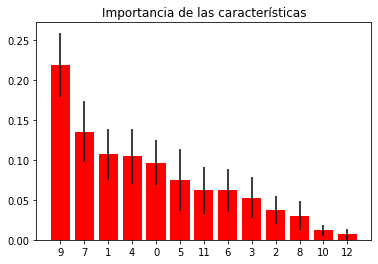

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_std_all0, Y_train_0)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_std_all0.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_std_all0.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_std_all0.shape[1]), indices)
plt.xlim([-1, X_train_std_all0.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- MoCAVisEX	
- MoCADelRec	
- MoCATotal

In [ ]:
X.head()

MoCANotDone  MoCACompDaysFromEnroll  MoCAVisEx  MoCANaming  MoCAAtt1  \
0          0.0                     7.0        5.0         3.0       2.0   
1          0.0                    18.0        4.0         2.0       1.0   
2          0.0                     7.0        5.0         3.0       2.0   
3          0.0                    24.0        4.0         3.0       1.0   
4          0.0                     0.0        2.0         2.0       1.0   

   MoCAAtt2  MoCAAtt3  MoCALang1  MoCALang2  MoCAAbs  MoCADelRec  MoCAOrient  \
0       1.0       3.0        2.0        0.0      2.0         2.0         6.0   
1       1.0       3.0        1.0        1.0      2.0         1.0         4.0   
2       1.0       3.0        1.0        1.0      2.0         3.0         6.0   
3       1.0       2.0        0.0        0.0      1.0         2.0         5.0   
4       0.0       0.0        1.0        0.0      0.0         0.0         6.0   

   MoCATotal  MoCAPtEff  
0       26.0        1.0  
1       21.0        1.0  
2       27.0        1.0  
3       20.0        1.0  
4       13.0        1.0

In [ ]:
X.shape

(201, 14)

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_emb = X_std_train2[:,[1,2,6,10,12]]
X_test_emb = X_std_test2[:,[1,2,6,10,12]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_emb, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.603


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_emb, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_emb)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[13 10]
 [ 8 10]]
tn: 13, fp:10, fn:8, tp:10
Accuracy: 0.5609756097560976
                  precision    recall  f1-score   support

Paciente control       0.62      0.57      0.59        23
   Paciente caso       0.50      0.56      0.53        18

        accuracy                           0.56        41
       macro avg       0.56      0.56      0.56        41
    weighted avg       0.57      0.56      0.56        41

Sensibilidad: 0.5555555555555556


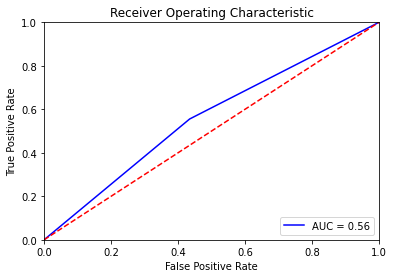

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy=[]
res_recall=[]
res_f1=[]
res_roc=[]

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5609756097560976
La matriz de confusión obtenida: [[13 10]
 [ 8 10]]
El valor de f1_score obtenido: 0.5263157894736842
El valor de recall es 0.5555555555555556


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_emb, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

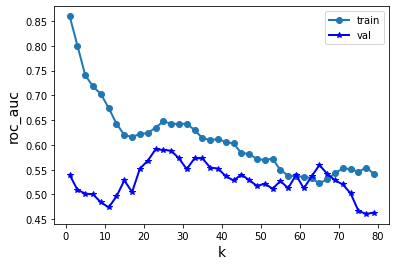

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.591
Valor correspondiente para el hiperparámetro: {'n_neighbors': 23}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 23)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_emb, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_emb)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 8 15]
 [ 9  9]]
El valor de f1_score obtenido: 0.42857142857142855
El valor de recall es 0.5


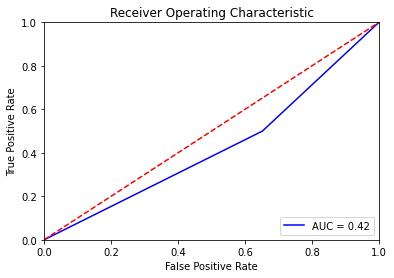

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 8 15]
 [ 9  9]]
El valor de f1_score obtenido: 0.42857142857142855
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOL***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,6)}
  profundidad_grid = np.array(range(1,6))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_emb, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 3}


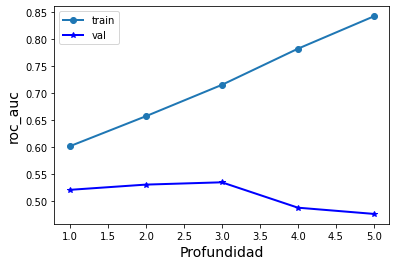

Mejor valor de la figura de mérito en validación cruzada: 0.535
Mejor valor del hiperparámetro: {'max_depth': 3}


In [ ]:
arbol('roc_auc')

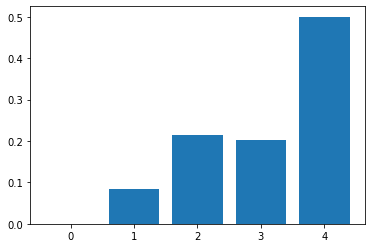

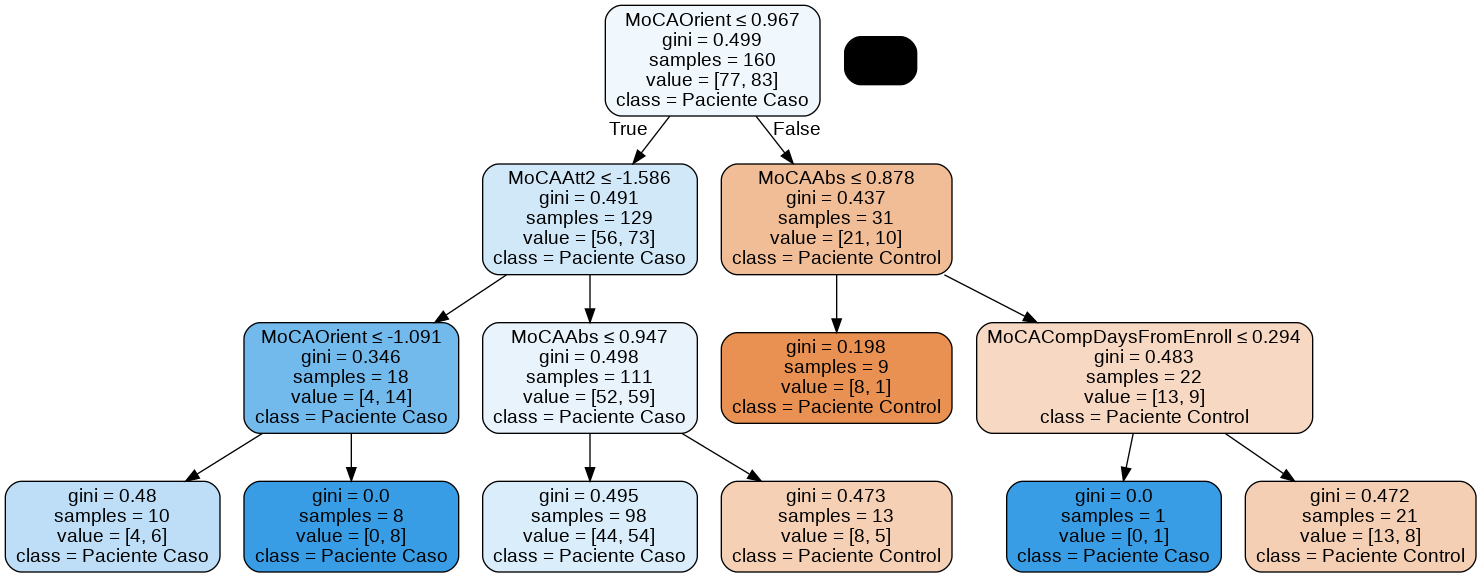

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=3)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_emb, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_emb)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[1,2,6,10,12]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 5 18]
 [ 2 16]]
El valor de f1_score obtenido: 0.6153846153846153
El valor de sensibilidad es 0.8888888888888888


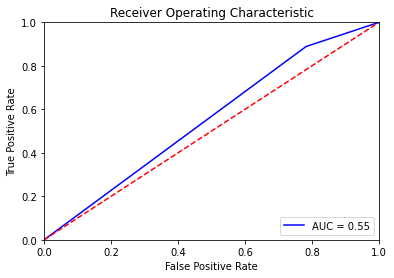

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 5 18]
 [ 2 16]]
El valor de f1_score obtenido: 0.6153846153846153
El valor de recall es 0.8888888888888888


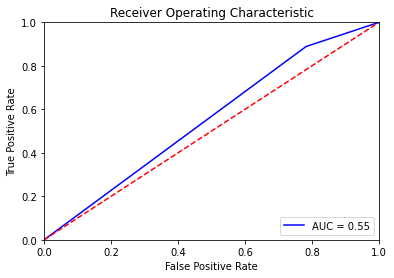

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_emb, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.633


In [ ]:


svc=SVC(C=1000,kernel='poly',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_emb,Y_train)
y_test_pred=svc.predict(X_test_emb)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.7073170731707317
La matriz de confusión obtenida: [[22  1]
 [11  7]]
El valor de f1_score obtenido: 0.5384615384615385
El valor de recall es 0.3888888888888889


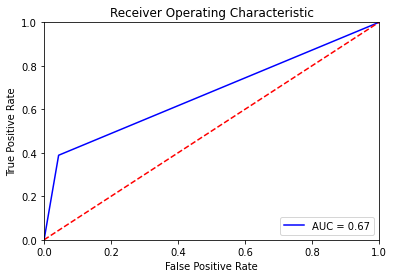

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***Método filter***

A continuación, a partir de validación cruzada con 3 folds, obtenemos el fold1, fold2 y fold3:

In [ ]:
# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
# array = data.values
X_train=np.array(X_train)
X_text=np.array(X_test)
Y_train=(np.array(Y_train))
Y_test=np.array(Y_test)
# Separamos en variables de entrada al modelo (8 primeras) y de salida (1 variable) 
# X = array[:,1:59]
# Y = array[:,0]

names=[]
for i in range(14):
  names.append(str(i))
# names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11','f12','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13']
# names = data.columns[1:]
names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  # In this case, k=3, 

for train, val in kf.split(X_train):
  # print("%s %s" % (train, val))
  print(len(val))
  print(val)
  if (len(val)==53) and (val[0]==107):
    fold3=list(val)
    print(len(fold3))
    print(fold3)
  if (len(val)==54):
    fold1=list(val)
    print(len(fold1))
    print(fold1)
  if (len(val)==53) and (val[0]==54):
    fold2=list(val)
    print(len(fold2))
    print(fold2)

54
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]
54
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
53
[ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]
53
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]
53
[107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 1

# ***COMBINACIÓN PRIMERA***


En esta primera combinación utilizaremos fold1 y fold2 para entrenar, y fold3 para validar:

In [ ]:
X_entrenamiento=np.concatenate((X_train[fold1], X_train[fold2]))
Y_entrenamiento=np.concatenate((Y_train[fold1], Y_train[fold2]))
X_val=X_train[fold3]
Y_val=Y_train[fold3]

Text(0.5, 1.0, 'Chi2 considerando subconjunto X train')

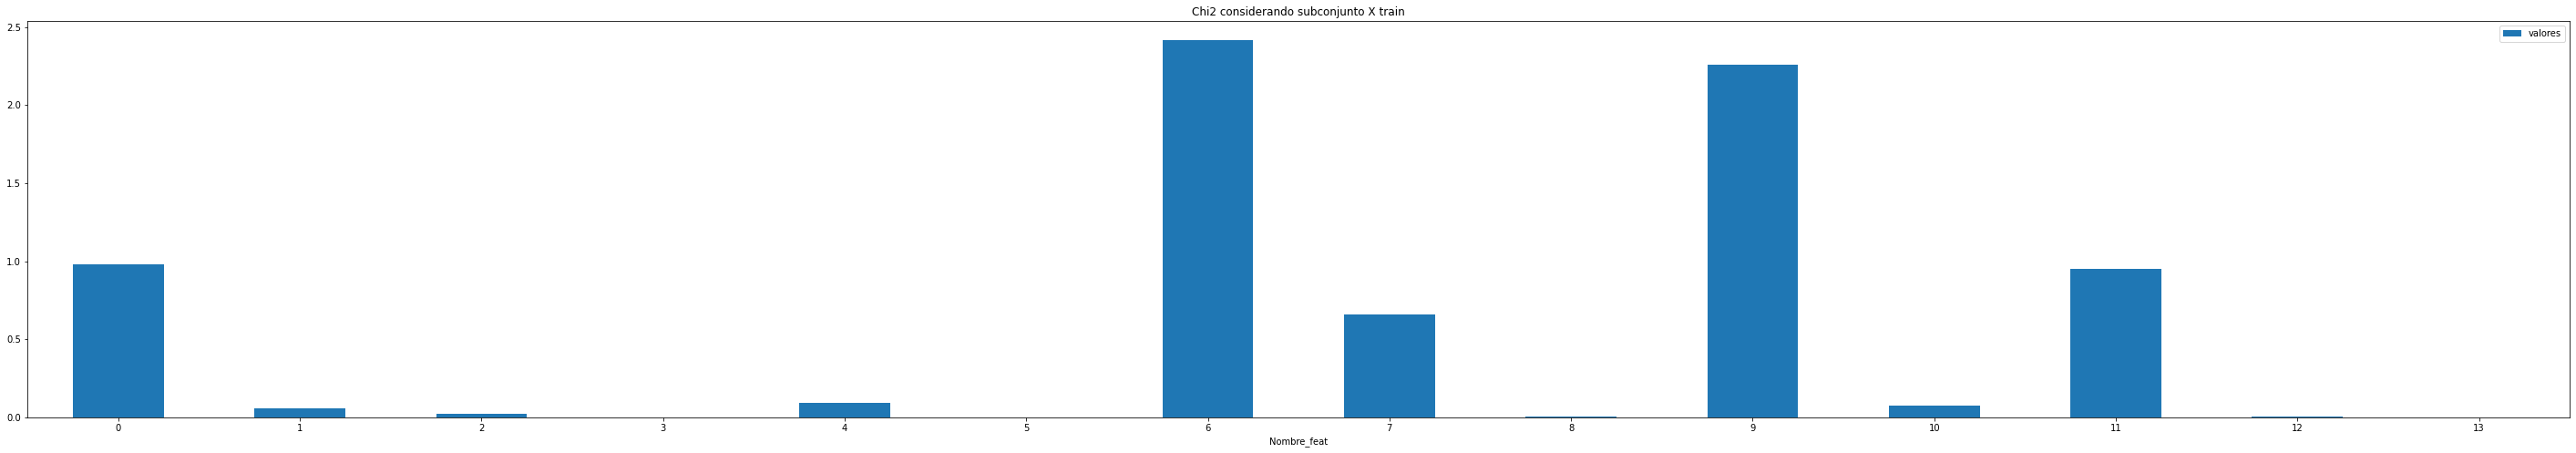

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

bestfeatures_Chi2 = SelectKBest(score_func=f_classif, k=14)
fit_Chi2 = bestfeatures_Chi2.fit(X_entrenamiento, Y_entrenamiento)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
# df, ax = plt.subplots(figsize=(50, 8))
plt.title("Chi2 considerando subconjunto X train")

In [ ]:
X_val=X_val[:, [6,9]] 
print(len(X_val), len(Y_val))

53 53


In [ ]:
X_entrenamiento=X_entrenamiento[:, [6,9]]

Ahora con esas características elegidas, entrenaremos nuestro modelo knn y además también haremos validación para así obtener el mejor valor de k a partir de una figura de mérico que en este caso será el accuracy:

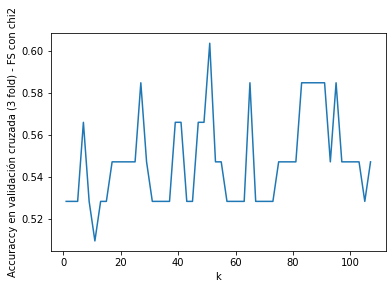

0.5471698113207547


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
k_range = range(1, 109, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entrenamiento, Y_entrenamiento)
    scores.append(knn.score(X_val, Y_val))
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val, Y_val))

El valor de k será 11, ya que es dónde mayor accuracy obtenemos, y además se empieza a estabilizar

# ***COMBINACIÓN 2***

En esta combinación usaremos fold1 y fold3 para entrenar y usaremos fold 2 para validar:

In [ ]:
X_entrenamiento2=np.concatenate((X_train[fold1], X_train[fold3]))
Y_entrenamiento2=np.concatenate((Y_train[fold1], Y_train[fold3]))
X_val2=X_train[fold2]
Y_val2=Y_train[fold2]

Text(0.5, 1.0, 'Estadístico chi cuadrado considerando subconjunto X train')

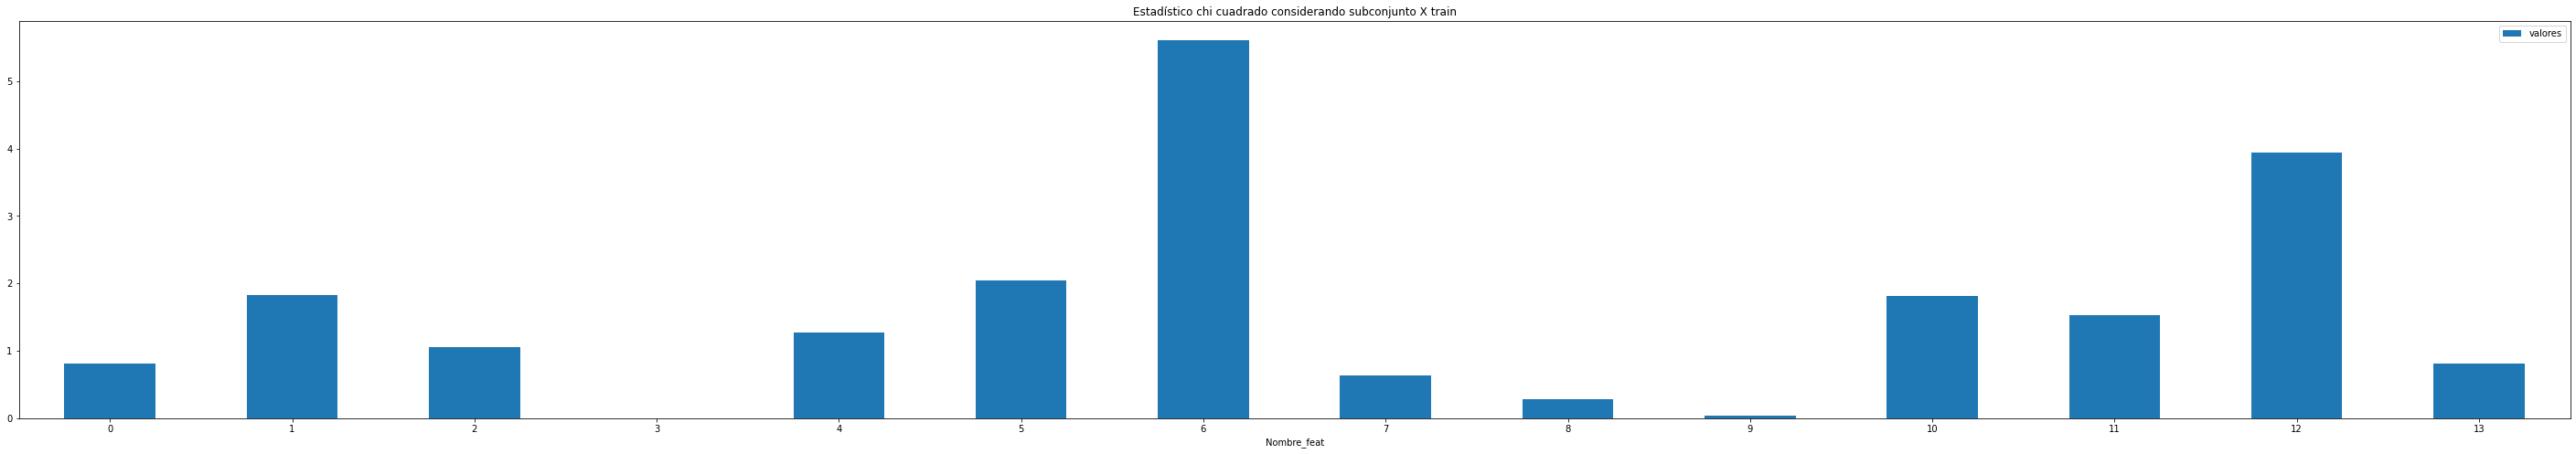

In [ ]:
bestfeatures_Chi2_2 = SelectKBest(score_func=f_classif, k=14)
fit_Chi2_2 = bestfeatures_Chi2_2.fit(X_entrenamiento2, Y_entrenamiento2)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0,figsize=(50,8))
plt.title("Estadístico chi cuadrado considerando subconjunto X train")

Escogemos de nuestra X de validación y de nuestra X de train únicamente las características:

In [ ]:
X_val2=X_val2[:, [6,12]] 
X_entrenamiento2=X_entrenamiento2[:, [6,12]]

Ahora igual que antes, entrenamos nuestro modelo knn y elegimos el valor de k a partir de validación:

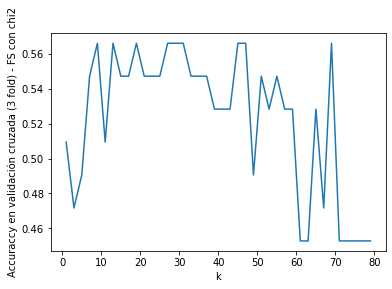

0.4528301886792453


In [ ]:
k_range = range(1, 81, 2)
scores2 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entrenamiento2, Y_entrenamiento2)
    scores2.append(knn.score(X_val2, Y_val2))
plt.plot(k_range, scores2)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val2, Y_val2))

Vemos que el mayor valor de accuracy es de 0.675 y elegiríamos un valor de k de aproximadamente 27

# ***COMBINACIÓN 3***

En este último caso, utilizaremos el fold 2 y fold3 para entrenar y el fold 1 para validar:

In [ ]:
X_entrenamiento3=np.concatenate((X_train[fold2], X_train[fold3]))
Y_entrenamiento3=np.concatenate((Y_train[fold2], Y_train[fold3]))
X_val3=X_train[fold1]
Y_val3=Y_train[fold1]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Text(0.5, 1.0, 'Estadístico chi cuadrado considerando subconjunto X train')

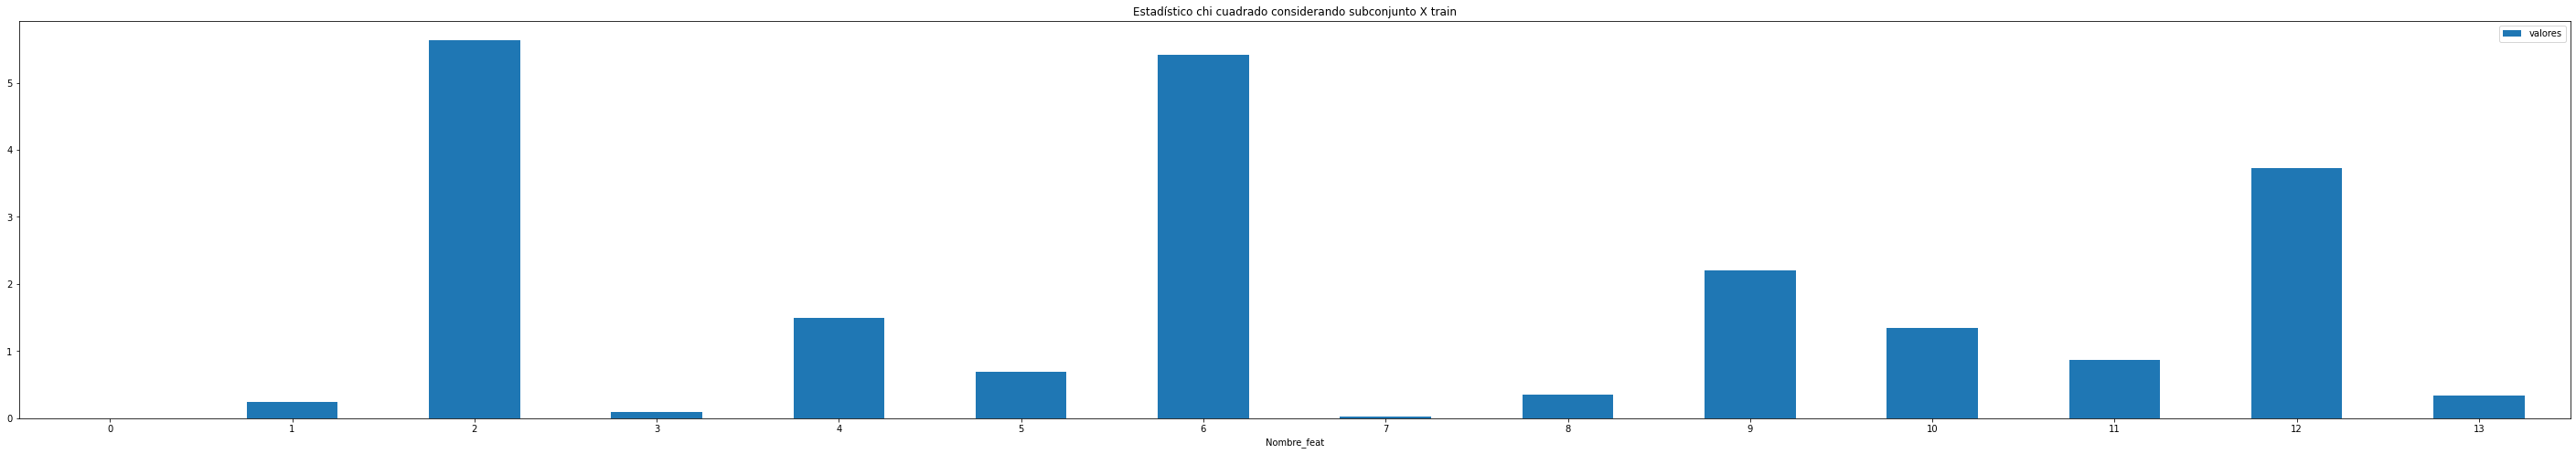

In [ ]:
bestfeatures_Chi2_3 = SelectKBest(score_func=f_classif, k=14)
fit_Chi2_3 = bestfeatures_Chi2_3.fit(X_entrenamiento3, Y_entrenamiento3)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_3.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
plt.title("Estadístico chi cuadrado considerando subconjunto X train")

En esta ocasión, elegiremos como mejores características, de nuevo f6, pero en este caso, en vez de f11 elegiremos f2.

A continuación, elegimos esas dos características en nuestros conjuntos de X de entrenamiento y la X de validación:

In [ ]:
X_val3=X_val3[:, [2,6]] 
X_entrenamiento3=X_entrenamiento3[:, [2,6]]

Ahora construimos nuestro modelo knn y lo entrenamos y elegiremos el valor de k a partir de validación cruzada:

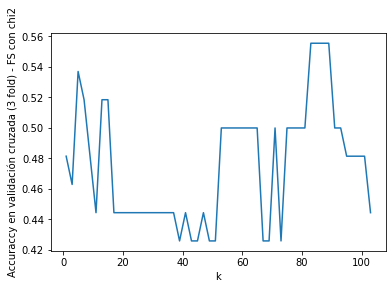

0.4444444444444444


In [ ]:
k_range = range(1, 105, 2)
scores3 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entrenamiento3, Y_entrenamiento3)
    scores3.append(knn.score(X_val3, Y_val3))
plt.plot(k_range, scores3)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val3, Y_val3))

Obtenemos un valor de accuracy en 0.65 en validación eligiendo un valor de k de aproximadamente 40.

Una vez hechas todas las combinaciones posibles, vemos que la característica f6 aparece en las 3 combinaciones, por lo que suponemos que será una característica relevante, y otra de las que aparece dos de las 3 veces es f11, por lo que también la elegiremos como caracterísitca relevante.

Una vez hecho esto, nuestra base de datos ya solo la utilizaremos con esas dos características y a continuación construiremos un modelo knn, y para elegir el valor de k realizaremos de nuevo validación cruzada, y posteriormente lo evaluaremos en nuestro conjunto independiente (test)

In [ ]:

X_train_filt = X_std_train2[:,[6,12]]
X_test_filt = X_std_test2[:,[6,12]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_filt, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.615


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_filt, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_filt)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[14  9]
 [ 9  9]]
tn: 14, fp:9, fn:9, tp:9
Accuracy: 0.5609756097560976
                  precision    recall  f1-score   support

Paciente control       0.61      0.61      0.61        23
   Paciente caso       0.50      0.50      0.50        18

        accuracy                           0.56        41
       macro avg       0.55      0.55      0.55        41
    weighted avg       0.56      0.56      0.56        41

Sensibilidad: 0.5


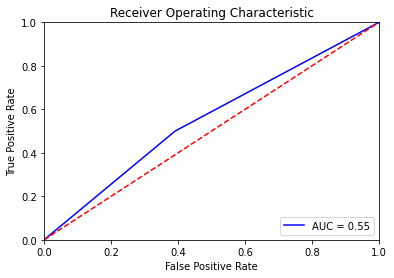

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5609756097560976
La matriz de confusión obtenida: [[14  9]
 [ 9  9]]
El valor de f1_score obtenido: 0.5
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_filt, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

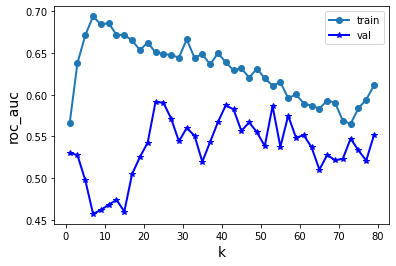

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.591
Valor correspondiente para el hiperparámetro: {'n_neighbors': 23}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 23)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_filt, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_filt)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[10 13]
 [ 7 11]]
El valor de f1_score obtenido: 0.5238095238095238
El valor de recall es 0.6111111111111112


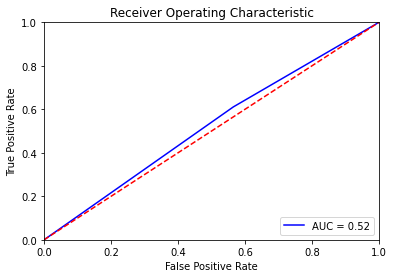

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[10 13]
 [ 7 11]]
El valor de f1_score obtenido: 0.5238095238095238
El valor de recall es 0.6111111111111112


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,3)}
  profundidad_grid = np.array(range(1,3))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_filt, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


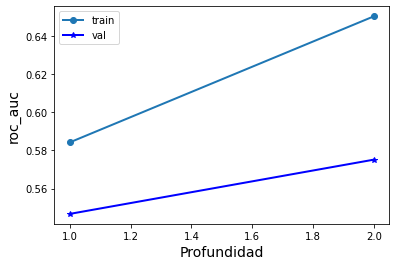

Mejor valor de la figura de mérito en validación cruzada: 0.575
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

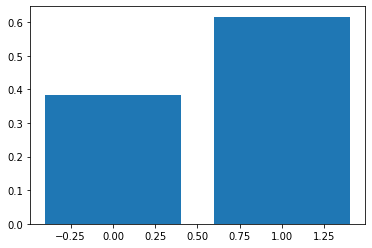

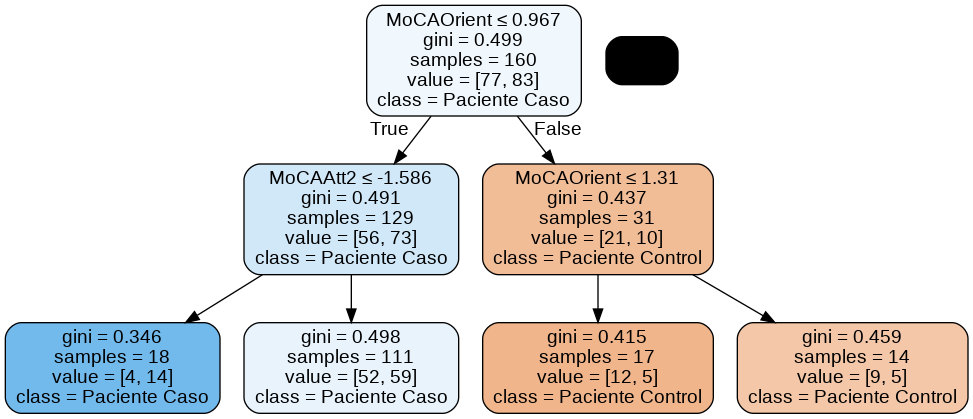

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_filt, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_filt)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[6,12]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[ 5 18]
 [ 1 17]]
El valor de f1_score obtenido: 0.6415094339622641
El valor de sensibilidad es 0.9444444444444444


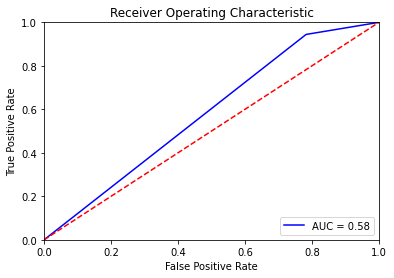

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[ 5 18]
 [ 1 17]]
El valor de f1_score obtenido: 0.6415094339622641
El valor de recall es 0.9444444444444444


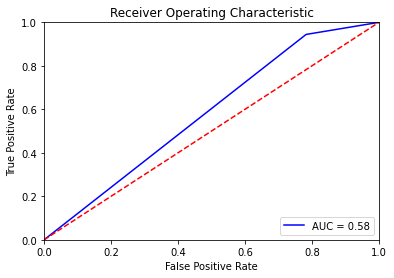

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_filt, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618


In [ ]:


svc=SVC(C=1000,kernel='rbf',gamma=0.0001,decision_function_shape='ovo')
svc.fit(X_train_filt,Y_train)
y_test_pred=svc.predict(X_test_filt)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5609756097560976
La matriz de confusión obtenida: [[16  7]
 [11  7]]
El valor de f1_score obtenido: 0.43750000000000006
El valor de recall es 0.3888888888888889


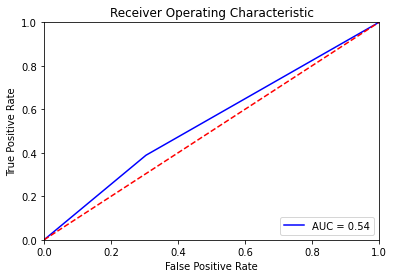

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Métodos wrapper con k-nn**

Con respecto al valor de k, elegiremos k=3, ya que es el valor obtenido al principio del proyecto con validación que nos daba mejores valores de figura de mérito.

# Sequential Forward Selection

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

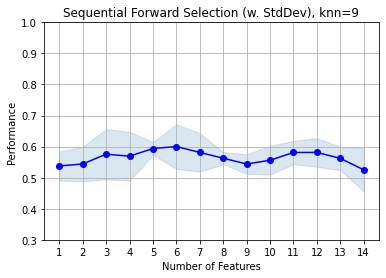

feature_idx  \
1                                             (6,)   
2                                           (6, 9)   
3                                       (6, 9, 10)   
4                                   (6, 9, 10, 13)   
5                                (4, 6, 9, 10, 13)   
6                            (4, 6, 9, 10, 11, 13)   
7                         (0, 4, 6, 9, 10, 11, 13)   
8                     (0, 4, 6, 9, 10, 11, 12, 13)   
9                  (0, 3, 4, 6, 9, 10, 11, 12, 13)   
10              (0, 3, 4, 6, 7, 9, 10, 11, 12, 13)   
11           (0, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13)   
12        (0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13)   
13     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13)   
14  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)   

                                            cv_scores avg_score  \
1       [0.5, 0.5094339622641509, 0.6037735849056604]  0.537736   
2       [0.5, 0.6226415094339622, 0.5094339622641509]  0.544025   
3   [0.48148148148148145, 0.5660377358490566, 0.67...  0.575588   
4       [0.5, 0.5283018867924528, 0.6792452830188679]  0.569182   
5   [0.5740740740740741, 0.5849056603773585, 0.622...  0.593874   
6   [0.5740740740740741, 0.5283018867924528, 0.698...  0.600163   
7   [0.5740740740740741, 0.5094339622641509, 0.660...  0.581295   
8   [0.5370370370370371, 0.5660377358490566, 0.584...   0.56266   
9       [0.5, 0.5660377358490566, 0.5660377358490566]  0.544025   
10  [0.5925925925925926, 0.5849056603773585, 0.490...  0.556021   
11  [0.6111111111111112, 0.5283018867924528, 0.603...  0.581062   
12  [0.5740740740740741, 0.5283018867924528, 0.641...  0.581295   
13  [0.5925925925925926, 0.5094339622641509, 0.584...  0.562311   
14  [0.46296296296296297, 0.49056603773584906, 0.6...   0.52539   

                                     feature_names  ci_bound   std_dev  \
1                                             (6,)  0.105438  0.046854   
2                                           (6, 9)  0.125396  0.055723   
3                                       (6, 9, 10)  0.182319  0.081019   
4                                   (6, 9, 10, 13)  0.177054  0.078679   
5                                (4, 6, 9, 10, 13)  0.046845  0.020817   
6                            (4, 6, 9, 10, 11, 13)  0.161433  0.071738   
7                         (0, 4, 6, 9, 10, 11, 13)  0.139146  0.061834   
8                     (0, 4, 6, 9, 10, 11, 12, 13)  0.044304  0.019688   
9                  (0, 3, 4, 6, 9, 10, 11, 12, 13)  0.070054   0.03113   
10              (0, 3, 4, 6, 7, 9, 10, 11, 12, 13)  0.104393   0.04639   
11           (0, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13)  0.084224  0.037427   
12        (0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13)  0.104636  0.046498   
13     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13)  0.084435  0.037521   
14  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)  0.156813  0.069684   

     std_err  
1   0.033131  
2   0.039402  
3   0.057289  
4   0.055635  
5    0.01472  
6   0.050726  
7   0.043723  
8   0.013921  
9   0.022013  
10  0.032803  
11  0.026465  
12  0.032879  
13  0.026531  
14  0.049274

In [ ]:
valor_k = 9
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=14, #Queremos llegar a 30 caracteristicas
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3)

sfs = sfs.fit(X_std_train2, Y_train)

# Representar los resultados
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 1])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T


cogemos la combinación 5

Evaluamos nuestro modelo knn=3 con las características elegidas en nuestro conjunto de test:

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Según SFS, escogería f0, f1, f5 y f7 
X_train_norm_SFS = X_std_train2[:,[4, 6, 9, 10, 13]]
X_test_norm_SFS = X_std_test2[:,[4, 6, 9, 10, 13]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_norm_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.637


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_norm_SFS, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_norm_SFS)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 7 16]
 [11  7]]
tn: 7, fp:16, fn:11, tp:7
Accuracy: 0.34146341463414637
                  precision    recall  f1-score   support

Paciente control       0.39      0.30      0.34        23
   Paciente caso       0.30      0.39      0.34        18

        accuracy                           0.34        41
       macro avg       0.35      0.35      0.34        41
    weighted avg       0.35      0.34      0.34        41

Sensibilidad: 0.3888888888888889


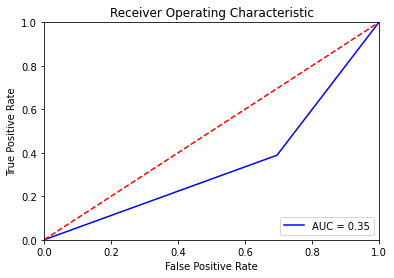

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.34146341463414637
La matriz de confusión obtenida: [[ 7 16]
 [11  7]]
El valor de f1_score obtenido: 0.34146341463414637
El valor de recall es 0.3888888888888889


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_norm_SFS, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

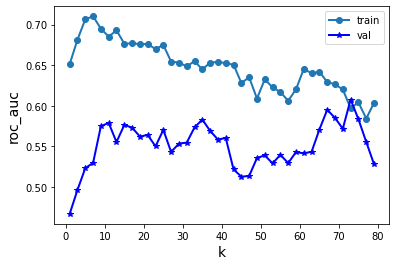

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.608
Valor correspondiente para el hiperparámetro: {'n_neighbors': 73}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 73)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_norm_SFS, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_norm_SFS)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[10 13]
 [10  8]]
El valor de f1_score obtenido: 0.41025641025641024
El valor de recall es 0.4444444444444444


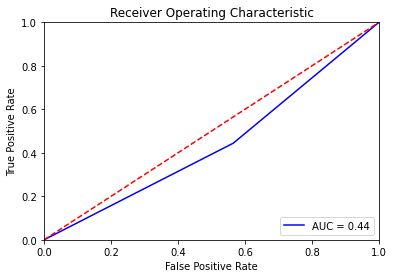

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[10 13]
 [10  8]]
El valor de f1_score obtenido: 0.41025641025641024
El valor de recall es 0.4444444444444444


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,6)}
  profundidad_grid = np.array(range(1,6))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_norm_SFS, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 3}


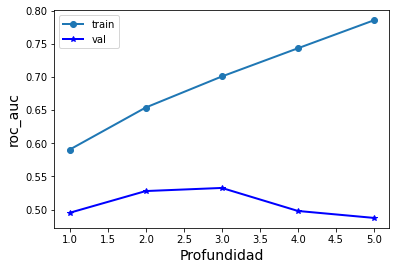

Mejor valor de la figura de mérito en validación cruzada: 0.533
Mejor valor del hiperparámetro: {'max_depth': 3}


In [ ]:
arbol('roc_auc')

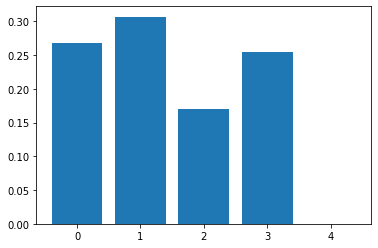

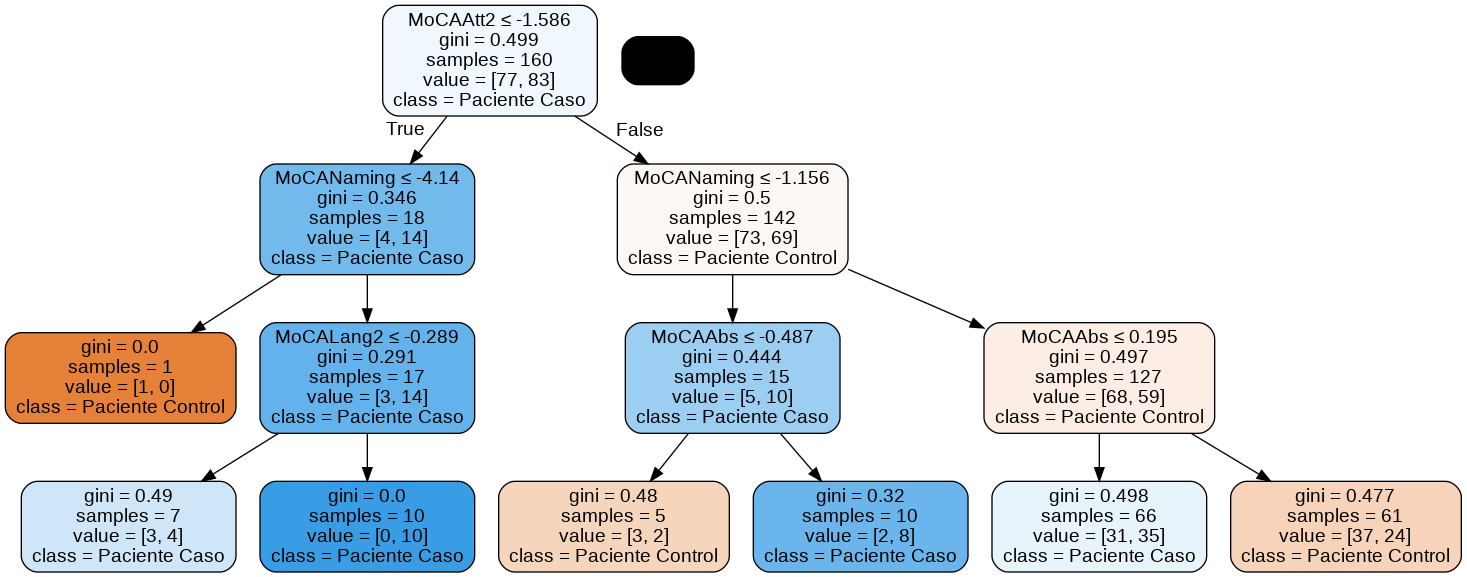

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=3)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_norm_SFS, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_norm_SFS)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[4,6,9,10,13]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[ 8 15]
 [ 7 11]]
El valor de f1_score obtenido: 0.5
El valor de sensibilidad es 0.6111111111111112


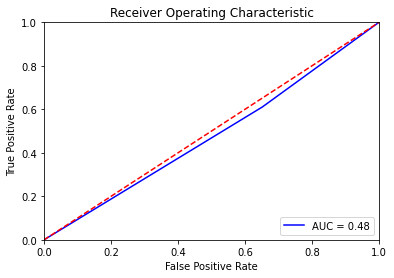

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[ 8 15]
 [ 7 11]]
El valor de f1_score obtenido: 0.5
El valor de recall es 0.6111111111111112


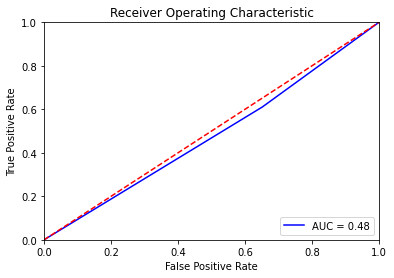

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_norm_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.648


In [ ]:


svc=SVC(C=50,kernel='rbf',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_norm_SFS,Y_train)
y_test_pred=svc.predict(X_test_norm_SFS)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.3902439024390244
La matriz de confusión obtenida: [[ 7 16]
 [ 9  9]]
El valor de f1_score obtenido: 0.41860465116279066
El valor de recall es 0.5


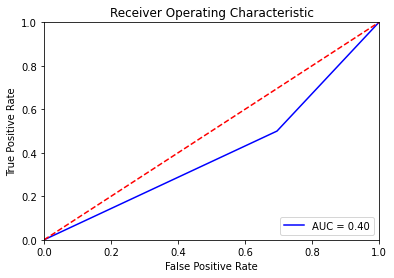

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# Sequential Backward Elimination

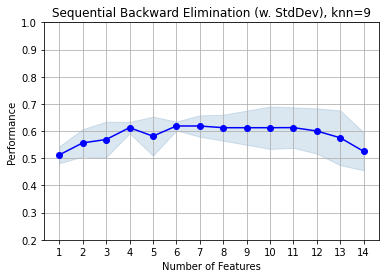

feature_idx  \
14  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)   
13     (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)   
12         (0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13)   
11             (0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12)   
10                (0, 1, 2, 4, 5, 6, 7, 9, 11, 12)   
9                     (0, 1, 2, 4, 5, 6, 7, 9, 12)   
8                        (1, 2, 4, 5, 6, 7, 9, 12)   
7                           (1, 2, 4, 6, 7, 9, 12)   
6                              (1, 2, 4, 6, 9, 12)   
5                                 (1, 4, 6, 9, 12)   
4                                    (4, 6, 9, 12)   
3                                       (4, 9, 12)   
2                                          (9, 12)   
1                                             (9,)   

                                            cv_scores avg_score  \
14  [0.46296296296296297, 0.49056603773584906, 0.6...   0.52539   
13  [0.5185185185185185, 0.49056603773584906, 0.71...  0.575355   
12  [0.5555555555555556, 0.5283018867924528, 0.716...   0.60028   
11  [0.5740740740740741, 0.5471698113207547, 0.716...  0.612742   
10  [0.6296296296296297, 0.5094339622641509, 0.698...  0.612392   
9   [0.6296296296296297, 0.5283018867924528, 0.679...  0.612392   
8   [0.6296296296296297, 0.5471698113207547, 0.660...  0.612392   
7   [0.6296296296296297, 0.5660377358490566, 0.660...  0.618682   
6   [0.6111111111111112, 0.6415094339622641, 0.603...  0.618798   
5   [0.5555555555555556, 0.5094339622641509, 0.679...  0.581412   
4   [0.5925925925925926, 0.6037735849056604, 0.641...  0.612625   
3   [0.5370370370370371, 0.5094339622641509, 0.660...  0.568949   
2       [0.5, 0.5471698113207547, 0.6226415094339622]  0.556604   
1   [0.5185185185185185, 0.5471698113207547, 0.471...  0.512462   

                                     feature_names  ci_bound   std_dev  \
14  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)  0.156813  0.069684   
13     (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)  0.226817  0.100793   
12         (0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13)  0.187379  0.083267   
11             (0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12)    0.1677  0.074522   
10                (0, 1, 2, 4, 5, 6, 7, 9, 11, 12)  0.175495  0.077986   
9                     (0, 1, 2, 4, 5, 6, 7, 9, 12)  0.141357  0.062816   
8                        (1, 2, 4, 5, 6, 7, 9, 12)  0.107559  0.047797   
7                           (1, 2, 4, 6, 7, 9, 12)  0.088403  0.039284   
6                              (1, 2, 4, 6, 9, 12)  0.036762  0.016336   
5                                 (1, 4, 6, 9, 12)  0.161339  0.071696   
4                                    (4, 6, 9, 12)  0.047095  0.020928   
3                                       (4, 9, 12)  0.147676  0.065624   
2                                          (9, 12)  0.113666  0.050511   
1                                             (9,)  0.070002  0.031107   

     std_err  
14  0.049274  
13  0.071271  
12  0.058879  
11  0.052695  
10  0.055145  
9   0.044418  
8   0.033798  
7   0.027778  
6   0.011552  
5   0.050696  
4   0.014798  
3   0.046403  
2   0.035716  
1   0.021996

In [ ]:
# Sequential Backward Selection
valor_k = 9
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=3)
sbs = sbs.fit(X_std_train2, Y_train)



# Plotting the results
fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.2, 1])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Según SFS, escogería f0, f1, f5 y f7 
X_train_SFS = X_std_train2[:,[4, 6, 9, 12]]
X_test_SFS = X_std_test2[:,[4, 6, 9, 12]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_SFS, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_SFS)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[11 12]
 [10  8]]
tn: 11, fp:12, fn:10, tp:8
Accuracy: 0.4634146341463415
                  precision    recall  f1-score   support

Paciente control       0.52      0.48      0.50        23
   Paciente caso       0.40      0.44      0.42        18

        accuracy                           0.46        41
       macro avg       0.46      0.46      0.46        41
    weighted avg       0.47      0.46      0.47        41

Sensibilidad: 0.4444444444444444


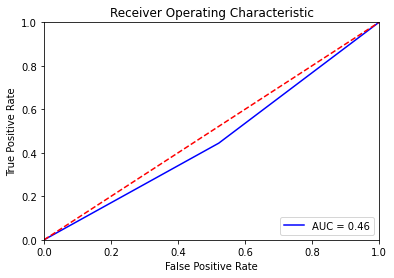

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[11 12]
 [10  8]]
El valor de f1_score obtenido: 0.4210526315789474
El valor de recall es 0.4444444444444444


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_SFS, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

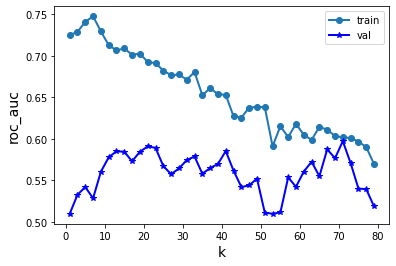

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.597
Valor correspondiente para el hiperparámetro: {'n_neighbors': 71}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 71)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_SFS, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_SFS)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[11 12]
 [ 9  9]]
El valor de f1_score obtenido: 0.4615384615384615
El valor de recall es 0.5


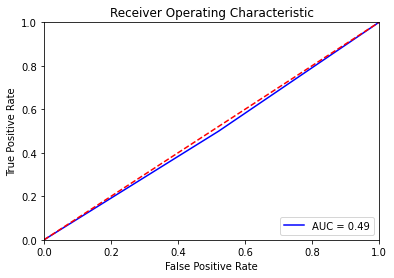

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[11 12]
 [ 9  9]]
El valor de f1_score obtenido: 0.4615384615384615
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,5)}
  profundidad_grid = np.array(range(1,5))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_SFS, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


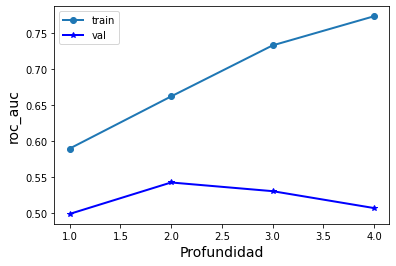

Mejor valor de la figura de mérito en validación cruzada: 0.542
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

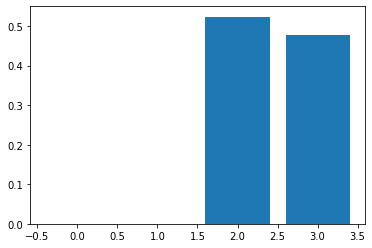

AttributeError: ignored

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_SFS, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_SFS)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_std_train2.columns[[4,6,9,12]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.3902439024390244
La matriz de confusión obtenida: [[ 6 17]
 [ 8 10]]
El valor de f1_score obtenido: 0.4444444444444445
El valor de sensibilidad es 0.5555555555555556


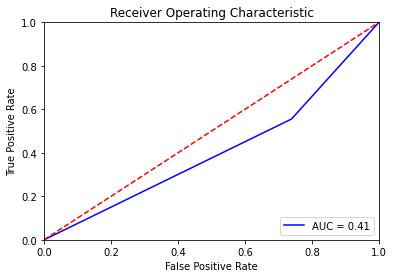

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.3902439024390244
La matriz de confusión obtenida: [[ 6 17]
 [ 8 10]]
El valor de f1_score obtenido: 0.4444444444444445
El valor de recall es 0.5555555555555556


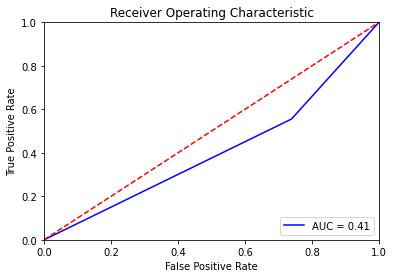

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.655


In [ ]:


svc=SVC(C=10,kernel='rbf',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_SFS,Y_train)
y_test_pred=svc.predict(X_test_SFS)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[11 12]
 [11  7]]
El valor de f1_score obtenido: 0.37837837837837834
El valor de recall es 0.3888888888888889


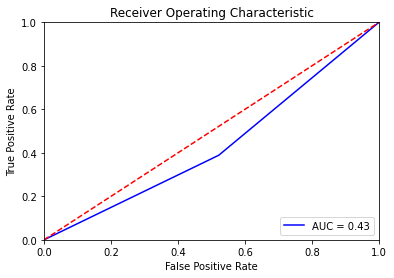

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística-árbol", "Knn-árbol","Árbol-arbol","SVC-árbol","Regresión logística-ANOVA", "Knn-ANOVA","Árbol-ANOVA","SVC-ANOVA","Regresión logística-SFS-knn", "Knn-SFS-knn","Árbol-SFS-knn","SVC-SFS-knn","Regresión logística-SBE-knn", "Knn-SBE-knn","Árbol-SBE-knn","SVC-SBE-knn"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                            
Regresión logística-árbol    0.560976  0.555556  0.526316  0.560386
Knn-árbol                    0.414634  0.500000  0.428571  0.423913
Árbol-arbol                  0.512195  0.888889  0.615385  0.553140
SVC-árbol                    0.707317  0.388889  0.538462  0.672705
Regresión logística-ANOVA    0.560976  0.500000  0.500000  0.554348
Knn-ANOVA                    0.512195  0.611111  0.523810  0.522947
Árbol-ANOVA                  0.536585  0.944444  0.641509  0.580918
SVC-ANOVA                    0.560976  0.388889  0.437500  0.542271
Regresión logística-SFS-knn  0.341463  0.388889  0.341463  0.346618
Knn-SFS-knn                  0.439024  0.444444  0.410256  0.439614
Árbol-SFS-knn                0.463415  0.611111  0.500000  0.479469
SVC-SFS-knn                  0.390244  0.500000  0.418605  0.402174
Regresión logística-SBE-knn  0.463415  0.444444  0.421053  0.461353
Knn-SBE-knn                  0.487805  0.500000  0.461538  0.489130
Árbol-SBE-knn                0.390244  0.555556  0.444444  0.408213
SVC-SBE-knn                  0.439024  0.388889  0.378378  0.433575